In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this project target is variable $\it{Price}$.
Result of data cleaning and transformations will be stored in cars_mod data frame for safety and separation from the original data.

In [4]:
cars_org=pd.read_csv('car_price.csv')
cars_org.reset_index(inplace=True)
cars_mod=pd.DataFrame()

In [5]:
cars_org.drop_duplicates(inplace=True)
print(cars_org.head(3))
cars_org.iloc[16983,:]

   index        ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0      0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1      1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2      2  45774419   8467     -        HONDA      FIT        2006  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  


index                     16983
ID                     45812886
Price                  26307500
Levy                          -
Manufacturer               OPEL
Model                     Combo
Prod. year                 1999
Category            Goods wagon
Leather interior             No
Fuel type                Diesel
Engine volume               1.7
Mileage                99999 km
Cylinders                   4.0
Gear box type            Manual
Drive wheels              Front
Doors                    02-Mar
Wheel                Left wheel
Color                      Blue
Airbags                       0
Name: 16983, dtype: object

Column ID doesn't have relevant impact on prediction accuracy, so it can be dropped

In [6]:
cars_org.drop(['ID'], axis=1, inplace=True)

Replacing outliers by the average price of same cars year older and year younger.

In [7]:
a=cars_org['Price'].loc[(cars_org['Manufacturer']=='OPEL')&(cars_org['Model']=='Combo')&(cars_org['Prod. year']==1998)]
b=cars_org['Price'].loc[(cars_org['Manufacturer']=='OPEL')&(cars_org['Model']=='Combo')&(cars_org['Prod. year']==2000)]
c=(a.iloc[0]+b.iloc[0])/2
z=cars_org.loc[(cars_org['Manufacturer']=='OPEL')&(cars_org['Model']=='Combo')&(cars_org['Prod. year']==1999)].index[0]
cars_org.iloc[z,1]=c

In [8]:
cars_org.loc[(cars_org['Manufacturer']=='OPEL')&(cars_org['Model']=='Combo')&(cars_org['Prod. year']==1999)]

index  Price Levy Manufacturer  Model  Prod. year     Category  \
16983  16983   5636    -         OPEL  Combo        1999  Goods wagon   

      Leather interior Fuel type Engine volume   Mileage  Cylinders  \
16983               No    Diesel           1.7  99999 km        4.0   

      Gear box type Drive wheels   Doors       Wheel Color  Airbags  
16983        Manual        Front  02-Mar  Left wheel  Blue        0

Due to reducing the number of outliers I've decided to reduce the age of cars to 40 yrs.
This is in line with domain - specific knowledge. Old cars are used be valued based on specialist inspection and number of sold/bought oldtimers are to small to put them together in the same mechanism of car pricing like popular younger cars.

In [9]:
cars_org.loc[cars_org['Prod. year']<1982].count()
cars_org = cars_org.loc[cars_org['Prod. year']>=1982, :]

For similar reasons luxury cars can be excluded from data frame - limit 200000$\$$

In [10]:
cars_org.loc[cars_org['Price']>200000,:]

index   Price  Levy   Manufacturer                    Model  \
1225    1225  627220     -  MERCEDES-BENZ           G 65 AMG 63AMG   
2283    2283  219527     -        BENTLEY           Continental GT   
5008    5008  308906  1694        PORSCHE                      911   
5840    5840  254024  1292  MERCEDES-BENZ            GLE 400 A M G   
7283    7283  228935     -  MERCEDES-BENZ               GLE 63 AMG   
7353    7353  216391     -  MERCEDES-BENZ         G 65 AMG G63 AMG   
7749    7749  288521  2269            BMW  M5 Машина в максимально   
8541    8541  872946  2067    LAMBORGHINI                     Urus   
9367    9367  297930     -  MERCEDES-BENZ                 AMG GT S   
10759  10759  260296     -          LEXUS                   LX 570   
14839  14839  297930     -     LAND ROVER        Range Rover Vogue   
15283  15283  250574  1481  MERCEDES-BENZ                  GLE 400   

       Prod. year   Category Leather interior Fuel type Engine volume  \
1225         2020       Jeep              Yes    Petrol     6.3 Turbo   
2283         2012      Coupe              Yes    Petrol     4.0 Turbo   
5008         2016      Coupe              Yes    Petrol             4   
5840         2016       Jeep              Yes    Petrol     3.0 Turbo   
7283         2018       Jeep              Yes    Petrol     5.5 Turbo   
7353         2013       Jeep              Yes    Petrol     5.5 Turbo   
7749         2018      Sedan              Yes    Petrol           4.4   
8541         2019  Universal              Yes    Petrol             4   
9367         2015      Coupe              Yes    Petrol     4.0 Turbo   
10759        2018       Jeep              Yes    Petrol     5.7 Turbo   
14839        2019       Jeep              Yes    Diesel     3.0 Turbo   
15283        2017       Jeep              Yes    Petrol     3.0 Turbo   

        Mileage  Cylinders Gear box type Drive wheels   Doors       Wheel  \
1225       0 km        8.0     Tiptronic          4x4  04-May  Left wheel   
2283   55500 km        8.0     Tiptronic          4x4  02-Mar  Left wheel   
5008    8690 km        6.0     Automatic         Rear  02-Mar  Left wheel   
5840   73000 km        6.0     Tiptronic          4x4  04-May  Left wheel   
7283   23000 km        8.0     Tiptronic          4x4  04-May  Left wheel   
7353   54000 km        8.0     Tiptronic          4x4  04-May  Left wheel   
7749   13500 km        8.0     Tiptronic          4x4  04-May  Left wheel   
8541    2531 km        8.0     Tiptronic          4x4  04-May  Left wheel   
9367   20000 km        8.0     Tiptronic         Rear  02-Mar  Left wheel   
10759  17700 km        8.0     Tiptronic          4x4  04-May  Left wheel   
14839   4500 km        8.0     Tiptronic          4x4  04-May  Left wheel   
15283  81600 km        6.0     Tiptronic          4x4  04-May  Left wheel   

       Color  Airbags  
1225   Black       12  
2283   Black        0  
5008   Black       12  
5840   Black       12  
7283   Black       16  
7353   Black       12  
7749   Black        0  
8541   Black        0  
9367   White       16  
10759  Black       10  
14839  Black       12  
15283  Black       12

In [11]:
cars_org=cars_org.loc[cars_org['Price']<200000,:]

In [12]:
cars_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19199 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             19199 non-null  int64  
 1   Price             19199 non-null  int64  
 2   Levy              19199 non-null  object 
 3   Manufacturer      19199 non-null  object 
 4   Model             19199 non-null  object 
 5   Prod. year        19199 non-null  int64  
 6   Category          19199 non-null  object 
 7   Leather interior  19199 non-null  object 
 8   Fuel type         19199 non-null  object 
 9   Engine volume     19199 non-null  object 
 10  Mileage           19199 non-null  object 
 11  Cylinders         19199 non-null  float64
 12  Gear box type     19199 non-null  object 
 13  Drive wheels      19199 non-null  object 
 14  Doors             19199 non-null  object 
 15  Wheel             19199 non-null  object 
 16  Color             19199 non-null  object

In data set, there are a few columns that should be numerical but they are objects.

In [13]:
yr=2022 #actual year

In [14]:
cars_org.columns

Index(['index', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [15]:
cars_org['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo', '0', '20',
       '3.6 Turbo', '0.3', '3.7 Turbo', '5.9', '5.5 Turbo', '6.3 Turbo',
       '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo', '0.6 Turbo', '6.8',
       '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3', '4.5 Turbo',
       '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4', '3.9', '0.9',
       '

In car Engine volume column there is some additional information about engine, so this column was split into two and original one type switched into numerical

In [16]:
cars_org['Engine volume']=cars_org['Engine volume'].str.replace(' ','')

In [17]:
def trb(value):
    if value[-5:]=='Turbo':
        return 1
    else:
        return 0
cars_org['turbo']=cars_org['Engine volume'].apply(trb)

In [18]:
cars_org['Engine volume']=cars_org['Engine volume'].str.replace('Turbo','')
cars_org['Engine volume']=cars_org['Engine volume'].astype('float')

Cars with engine volume = 0 was regognized as damaged and also excluded. Outfiller was also recocgnized and fixed

In [19]:
cars_org.loc[cars_org['Engine volume']==0,:]

index  Price Levy   Manufacturer     Model  Prod. year   Category  \
2010    2010  53941   87          TESLA   Model X        2018      Sedan   
3105    3105   2430   87  MERCEDES-BENZ     C 250        2013      Coupe   
3516    3516  27356   87        HYUNDAI   Elantra        2016      Sedan   
4814    4814  17663   87         TOYOTA      Aqua        2012  Hatchback   
7022    7022  17663   87         TOYOTA      Aqua        2012  Hatchback   
7685    7685  47076   87      SSANGYONG    REXTON        2016       Jeep   
10603  10603  12231   87         TOYOTA     Prius        2010  Hatchback   
12917  12917      6   87  MERCEDES-BENZ     E 350        2016      Sedan   
14642  14642      3   87        PORSCHE  Panamera        2011      Sedan   
17375  17375     78   87  MERCEDES-BENZ   CLS 550        2014      Sedan   

      Leather interior Fuel type  Engine volume    Mileage  Cylinders  \
2010               Yes    Petrol            0.0   81907 km        6.0   
3105               Yes    Petrol            0.0  121600 km        4.0   
3516               Yes       LPG            0.0   65004 km        4.0   
4814               Yes    Petrol            0.0  118000 km        4.0   
7022               Yes    Petrol            0.0  118000 km        4.0   
7685               Yes    Diesel            0.0   73968 km        4.0   
10603               No    Hybrid            0.0       0 km        4.0   
12917              Yes    Petrol            0.0   33600 km        6.0   
14642              Yes    Petrol            0.0  196800 km        6.0   
17375              Yes    Petrol            0.0   92800 km        8.0   

      Gear box type Drive wheels   Doors       Wheel   Color  Airbags  turbo  
2010      Automatic          4x4  04-May  Left wheel  Silver       12      0  
3105      Automatic         Rear  04-May  Left wheel   White       12      0  
3516      Automatic        Front  04-May  Left wheel   White        4      0  
4814      Automatic        Front  04-May  Left wheel    Grey        4      0  
7022      Automatic        Front  04-May  Left wheel    Grey        4      0  
7685      Automatic        Front  04-May  Left wheel   Black        4      0  
10603     Automatic        Front  04-May  Left wheel  Golden        0      0  
12917     Automatic         Rear  04-May  Left wheel   White       12      0  
14642     Automatic         Rear  04-May  Left wheel   Black       12      0  
17375     Automatic         Rear  04-May  Left wheel   Black       12      0

In [20]:
cars_org=cars_org.loc[cars_org['Engine volume']>0,:]
cars_org.loc[cars_org['Engine volume']==0,:]

Empty DataFrame
Columns: [index, Price, Levy, Manufacturer, Model, Prod. year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Drive wheels, Doors, Wheel, Color, Airbags, turbo]
Index: []

In [21]:
def fix(no):
    if no==20:
        return 2
    else:
        return no
cars_org['Engine volume']=cars_org['Engine volume'].apply(fix)
cars_org['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19189, dtype: float64

In [22]:
cars_mod['Price']=cars_org['Price']
cars_mod['Mileage']=cars_org['Mileage'].str.replace('km','').astype('float')
cars_mod['car_age']=yr-cars_org['Prod. year']
cars_mod['Engine volume']=cars_org['Engine volume']
cars_mod['Turbo']=cars_org['turbo']
cars_mod['Cylinders']=cars_org['Cylinders']
cars_mod['Airbags']=cars_org['Airbags']
cars_mod

Price   Mileage  car_age  Engine volume  Turbo  Cylinders  Airbags
0      13328  186005.0       12            3.5      0        6.0       12
1      16621  192000.0       11            3.0      0        6.0        8
2       8467  200000.0       16            1.3      0        4.0        2
3       3607  168966.0       11            2.5      0        4.0        0
4      11726   91901.0        8            1.3      0        4.0        4
...      ...       ...      ...            ...    ...        ...      ...
19232   8467  300000.0       23            2.0      1        4.0        5
19233  15681  161600.0       11            2.4      0        4.0        8
19234  26108  116365.0       12            2.0      0        4.0        4
19235   5331   51258.0       15            2.0      0        4.0        4
19236    470  186923.0       10            2.4      0        4.0       12

[19189 rows x 7 columns]

Variable $\it{Levy}$ in original data set means kind of tax, so value "-" means tax-free, so missing values means 0. This column will be also transformed as float type.

In [23]:
cars_mod['tax']=cars_org['Levy'].str.replace('-','0').astype('float')

At this level of preprocessing dataframe car_mod contains only numerical data.

In [24]:
num_features=[ 'Mileage', 'car_age', 'Engine volume', 'Turbo', 'Cylinders',
       'Airbags', 'tax']
target='Price'

In [25]:
value=[target]+num_features
corr_matrix=cars_mod[value].corr()
corr_matrix['Price']

Price            1.000000
Mileage         -0.015465
car_age         -0.311171
Engine volume    0.125265
Turbo            0.196394
Cylinders        0.090968
Airbags         -0.025556
tax              0.040584
Name: Price, dtype: float64

In [26]:
cars_mod['cylvol']=cars_mod['Engine volume']/cars_mod['Cylinders']

In [27]:
value=[target]+num_features+['cylvol']
corr_matrix=cars_mod[value].corr()
corr_matrix['Price']

Price            1.000000
Mileage         -0.015465
car_age         -0.311171
Engine volume    0.125265
Turbo            0.196394
Cylinders        0.090968
Airbags         -0.025556
tax              0.040584
cylvol           0.102336
Name: Price, dtype: float64

No need to include $\it{cylvol}$ variable. No increase of correlation with target observed.

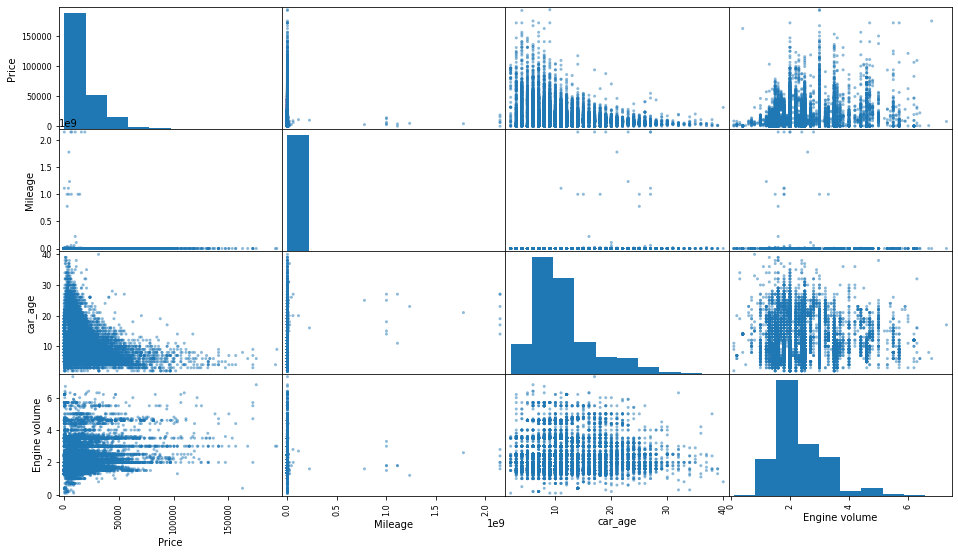

In [28]:
from pandas.plotting import scatter_matrix
scatter_matrix(cars_mod.iloc[:,0:4], figsize=(16,9))
plt.show()


In [29]:
cars_mod.describe()

Price       Mileage       car_age  Engine volume         Turbo  \
count   19189.000000  1.918900e+04  19189.000000   19189.000000  19189.000000   
mean    16986.917088  1.423955e+06     11.028037       2.306029      0.100057   
std     17371.017582  4.592145e+07      5.372283       0.855150      0.300084   
min         1.000000  0.000000e+00      2.000000       0.100000      0.000000   
25%      5331.000000  7.033600e+04      7.000000       1.800000      0.000000   
50%     13172.000000  1.261170e+05     10.000000       2.000000      0.000000   
75%     22000.000000  1.890000e+05     13.000000       2.500000      0.000000   
max    194438.000000  2.147484e+09     40.000000       7.300000      1.000000   

          Cylinders       Airbags           tax        cylvol  
count  19189.000000  19189.000000  19189.000000  19189.000000  
mean       4.580802      6.586065    633.400177      0.501142  
std        1.196548      4.315782    566.874427      0.133093  
min        1.000000      0.000000      0.000000      0.033333  
25%        4.000000      4.000000      0.000000      0.416667  
50%        4.000000      6.000000    642.000000      0.500000  
75%        4.000000     12.000000    917.000000      0.583333  
max       16.000000     16.000000  11714.000000      6.300000

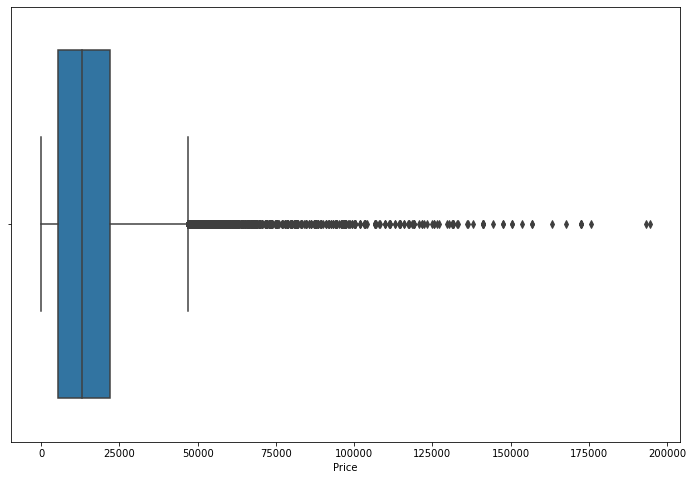

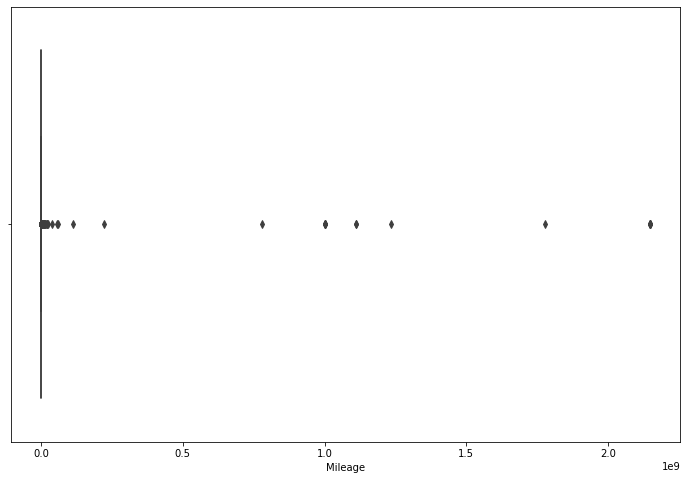

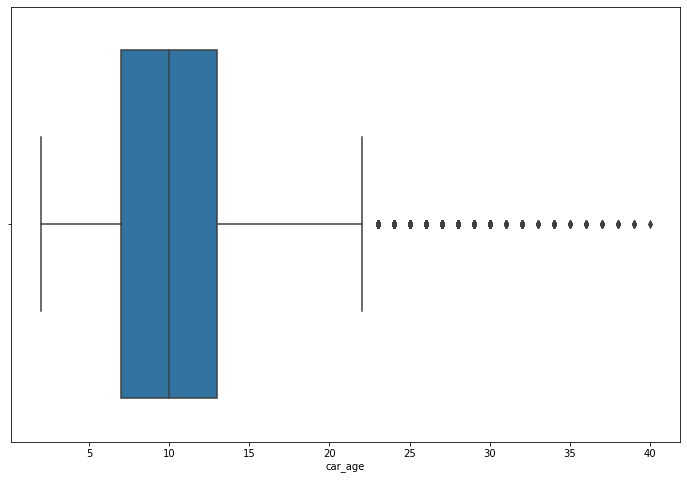

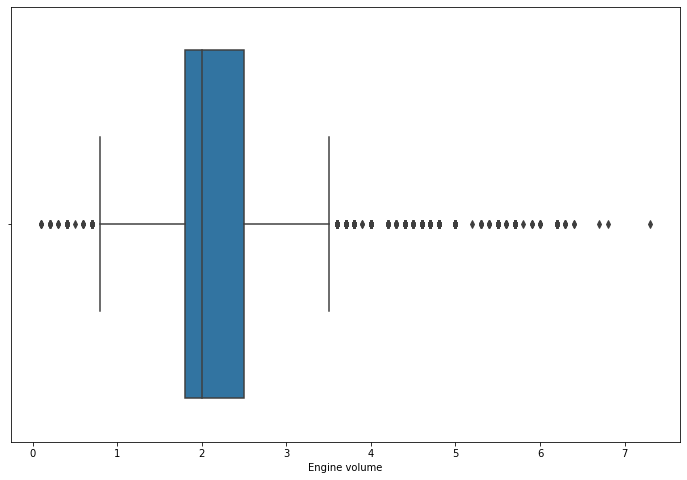

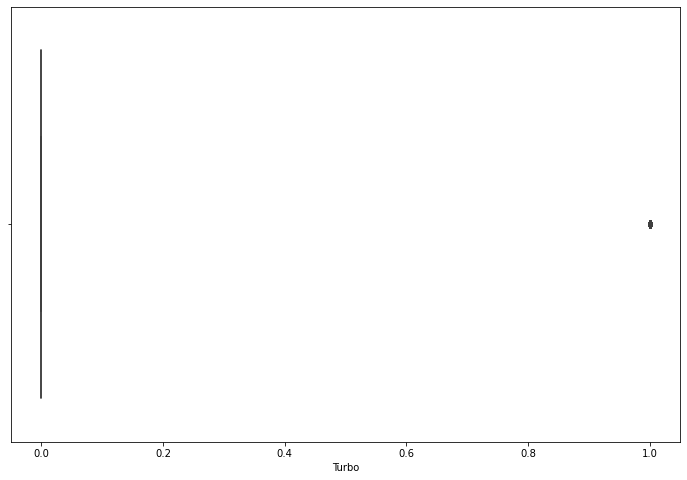

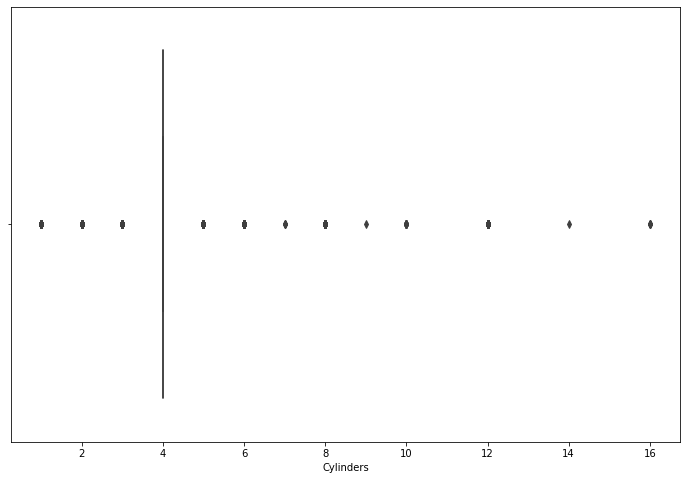

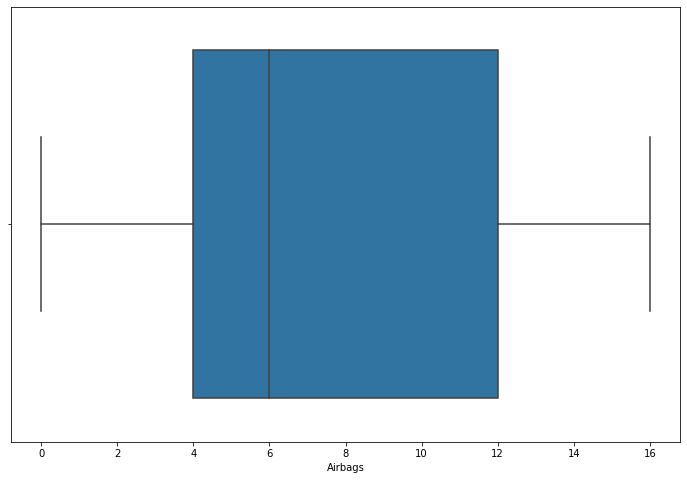

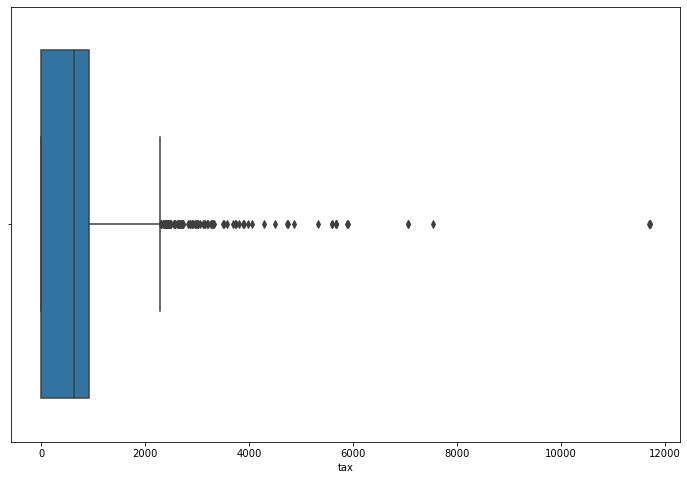

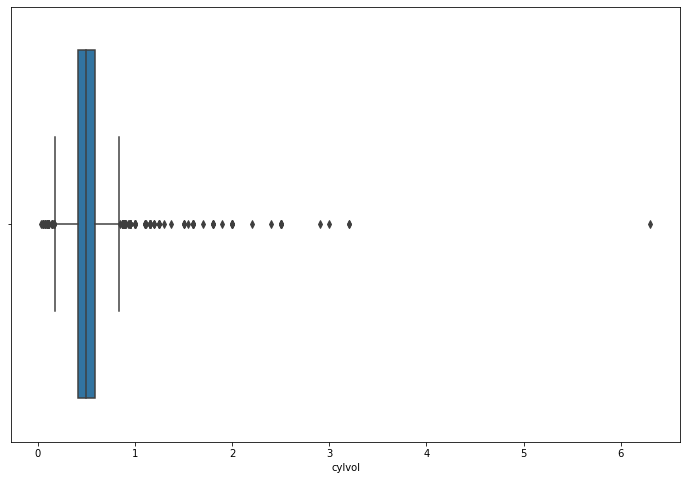

In [30]:
import seaborn as sns
for i in range (cars_mod.shape[1]):
    plt.figure(figsize=(12,8))
    sns.boxplot(cars_mod.iloc[:,i])
    plt.show()

In [31]:
cars_mod

Price   Mileage  car_age  Engine volume  Turbo  Cylinders  Airbags  \
0      13328  186005.0       12            3.5      0        6.0       12   
1      16621  192000.0       11            3.0      0        6.0        8   
2       8467  200000.0       16            1.3      0        4.0        2   
3       3607  168966.0       11            2.5      0        4.0        0   
4      11726   91901.0        8            1.3      0        4.0        4   
...      ...       ...      ...            ...    ...        ...      ...   
19232   8467  300000.0       23            2.0      1        4.0        5   
19233  15681  161600.0       11            2.4      0        4.0        8   
19234  26108  116365.0       12            2.0      0        4.0        4   
19235   5331   51258.0       15            2.0      0        4.0        4   
19236    470  186923.0       10            2.4      0        4.0       12   

          tax    cylvol  
0      1399.0  0.583333  
1      1018.0  0.500000  
2         0.0  0.325000  
3       862.0  0.625000  
4       446.0  0.325000  
...       ...       ...  
19232     0.0  0.500000  
19233   831.0  0.600000  
19234   836.0  0.500000  
19235  1288.0  0.500000  
19236   753.0  0.600000  

[19189 rows x 9 columns]

In [32]:
cars_org.columns

Index(['index', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'turbo'],
      dtype='object')

In [33]:
from sklearn.preprocessing import OrdinalEncoder
or_encoder = OrdinalEncoder()
cat_features=['Manufacturer','Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']

In [34]:
cars_mod[cat_features]=or_encoder.fit_transform(cars_org[cat_features])

In [35]:
value=[target]+cat_features
corr_matrix=cars_mod[value].corr()
corr_matrix['Price']

Price               1.000000
Manufacturer       -0.078303
Leather interior    0.128272
Fuel type          -0.038688
Gear box type       0.122281
Drive wheels       -0.037206
Doors               0.025712
Wheel              -0.134782
Color              -0.015451
Name: Price, dtype: float64

Start of modelling 

In [36]:
cars_mod.head(5)

Price   Mileage  car_age  Engine volume  Turbo  Cylinders  Airbags     tax  \
0  13328  186005.0       12            3.5      0        6.0       12  1399.0   
1  16621  192000.0       11            3.0      0        6.0        8  1018.0   
2   8467  200000.0       16            1.3      0        4.0        2     0.0   
3   3607  168966.0       11            2.5      0        4.0        0   862.0   
4  11726   91901.0        8            1.3      0        4.0        4   446.0   

     cylvol  Manufacturer  Leather interior  Fuel type  Gear box type  \
0  0.583333          31.0               1.0        2.0            0.0   
1  0.500000           8.0               0.0        5.0            2.0   
2  0.325000          21.0               0.0        5.0            3.0   
3  0.625000          16.0               1.0        2.0            0.0   
4  0.325000          21.0               1.0        5.0            0.0   

   Drive wheels  Doors  Wheel  Color  
0           0.0    1.0    0.0   12.0  
1           0.0    1.0    0.0    1.0  
2           1.0    1.0    1.0    1.0  
3           0.0    1.0    0.0   14.0  
4           1.0    1.0    0.0   12.0

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
features=num_features
data_set=cars_mod[num_features]
X=data_set
y=cars_mod[target]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60222)

In [40]:
from sklearn.linear_model import LinearRegression
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [41]:
y_predict_test=lin_reg_model.predict(X_test)

In [42]:
from sklearn.metrics import mean_squared_error
err=np.sqrt(mean_squared_error(y_test, y_predict_test))
print(f'RMSE={err}')

RMSE=15945.236148634649


In [43]:
features=num_features
data_set=cars_mod[num_features]
X=data_set
y=cars_mod[target]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60222)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15351, 7), (3838, 7), (15351,), (3838,))

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [46]:
X_train_mod=X_train[features]
X_test_mod=X_test[features]
y_train_mod=y_train
y_test_mod=y_test
X_train_mod=scaler.fit_transform(X_train_mod)
X_test_mod=scaler.fit_transform(X_test_mod)
lin_reg_model.fit(X_train_mod, y_train_mod)

LinearRegression()

In [47]:
y_test_mod.shape,X_test_mod.shape

((3838,), (3838, 7))

In [48]:
y_predict_test_2=lin_reg_model.predict(X_test_mod)
y_predict_test_2

array([12142.88491202, 20171.08966931, 20557.79432695, ...,
       20571.47502956, 21099.69440782, 16666.98680945])

In [49]:
from sklearn.metrics import mean_squared_error
err=np.sqrt(mean_squared_error(y_test_mod, y_predict_test_2))
print(f'RMSE={err}')

RMSE=15944.69932287168


In [50]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree=tree_model.predict(X_test)
err2=np.sqrt(mean_squared_error(y_test, y_pred_tree))
print(f'RMSE={err2}')

RMSE=12438.914536831608


In [51]:
cars_mod[cat_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19189 entries, 0 to 19236
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      19189 non-null  float64
 1   Leather interior  19189 non-null  float64
 2   Fuel type         19189 non-null  float64
 3   Gear box type     19189 non-null  float64
 4   Drive wheels      19189 non-null  float64
 5   Doors             19189 non-null  float64
 6   Wheel             19189 non-null  float64
 7   Color             19189 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [52]:
features=num_features
data_set=cars_mod[num_features]
X=data_set
y=cars_mod[target]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60222)

In [68]:
from sklearn.model_selection import GridSearchCV 
n_max_depth=np.linspace(4,20,17)
n_min_samples_split=np.linspace(2,50,49).astype('int').astype('int')
#list(min_samples_split)

In [71]:
modelling = DecisionTreeRegressor()

params = {'max_depth': list(n_max_depth),
          'min_samples_split':list(n_min_samples_split)}

tree_gridsearch = GridSearchCV(modelling, 
                                                params,
                                                scoring='neg_mean_squared_error',
                                                cv=14,
                                                verbose=5)

tree_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', tree_gridsearch.best_params_)



Fitting 14 folds for each of 833 candidates, totalling 11662 fits
[CV] max_depth=4.0, min_samples_split=2 ..............................
[CV]  max_depth=4.0, min_samples_split=2, score=-181791577.868, total=   0.0s
[CV] max_depth=4.0, min_samples_split=2 ..............................
[CV]  max_depth=4.0, min_samples_split=2, score=-219200534.838, total=   0.0s
[CV] max_depth=4.0, min_samples_split=2 ..............................
[CV]  max_depth=4.0, min_samples_split=2, score=-192142418.648, total=   0.0s
[CV] max_depth=4.0, min_samples_split=2 ..............................
[CV]  max_depth=4.0, min_samples_split=2, score=-185706927.255, total=   0.0s
[CV] max_depth=4.0, min_samples_split=2 ..............................
[CV]  max_depth=4.0, min_samples_split=2, score=-181545330.137, total=   0.0s
[CV] max_depth=4.0, min_samples_split=2 ..............................
[CV]  max_depth=4.0, min_samples_split=2, score=-175888766.773, total=   0.0s
[CV] max_depth=4.0, min_samples_split=2 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=4.0, min_samples_split=2, score=-179787795.713, total=   0.0s
[CV] max_depth=4.0, min_samples_split=2 ..............................
[CV]  max_depth=4.0, min_samples_split=2, score=-164325418.766, total=   0.0s
[CV] max_depth=4.0, min_samples_split=2 ..............................
[CV]  max_depth=4.0, min_samples_split=2, score=-204371144.887, total=   0.0s
[CV] max_depth=4.0, min_samples_split=2 ..............................
[CV]  max_depth=4.0, min_samples_split=2, score=-255448232.877, total=   0.0s
[CV] max_depth=4.0, min_samples_split=2 ..............................
[CV]  max_depth=4.0, min_samples_split=2, score=-165408491.355, total=   0.0s
[CV] max_depth=4.0, min_samples_split=3 ..............................
[CV]  max_depth=4.0, min_samples_split=3, score=-181791577.868, total=   0.0s
[CV] max_depth=4.0, min_samples_split=3 ..............................
[CV]  max_depth=4.0, min_samples_split=3, score=-219200534.838, total=   0.0s
[CV] max_depth=4.0, min_samp

[CV]  max_depth=4.0, min_samples_split=7, score=-185706927.255, total=   0.0s
[CV] max_depth=4.0, min_samples_split=7 ..............................
[CV]  max_depth=4.0, min_samples_split=7, score=-181545330.137, total=   0.0s
[CV] max_depth=4.0, min_samples_split=7 ..............................
[CV]  max_depth=4.0, min_samples_split=7, score=-175888766.773, total=   0.0s
[CV] max_depth=4.0, min_samples_split=7 ..............................
[CV]  max_depth=4.0, min_samples_split=7, score=-173858083.072, total=   0.0s
[CV] max_depth=4.0, min_samples_split=7 ..............................
[CV]  max_depth=4.0, min_samples_split=7, score=-176411364.294, total=   0.0s
[CV] max_depth=4.0, min_samples_split=7 ..............................
[CV]  max_depth=4.0, min_samples_split=7, score=-158060620.387, total=   0.0s
[CV] max_depth=4.0, min_samples_split=7 ..............................
[CV]  max_depth=4.0, min_samples_split=7, score=-179787795.713, total=   0.0s
[CV] max_depth=4.0, min_samp

[CV]  max_depth=4.0, min_samples_split=11, score=-164325418.766, total=   0.0s
[CV] max_depth=4.0, min_samples_split=11 .............................
[CV]  max_depth=4.0, min_samples_split=11, score=-204371144.887, total=   0.0s
[CV] max_depth=4.0, min_samples_split=11 .............................
[CV]  max_depth=4.0, min_samples_split=11, score=-255448232.877, total=   0.0s
[CV] max_depth=4.0, min_samples_split=11 .............................
[CV]  max_depth=4.0, min_samples_split=11, score=-165408491.355, total=   0.0s
[CV] max_depth=4.0, min_samples_split=12 .............................
[CV]  max_depth=4.0, min_samples_split=12, score=-181791577.868, total=   0.0s
[CV] max_depth=4.0, min_samples_split=12 .............................
[CV]  max_depth=4.0, min_samples_split=12, score=-219200534.838, total=   0.0s
[CV] max_depth=4.0, min_samples_split=12 .............................
[CV]  max_depth=4.0, min_samples_split=12, score=-192142418.648, total=   0.0s
[CV] max_depth=4.0, m

[CV]  max_depth=4.0, min_samples_split=16, score=-185706927.255, total=   0.0s
[CV] max_depth=4.0, min_samples_split=16 .............................
[CV]  max_depth=4.0, min_samples_split=16, score=-181545330.137, total=   0.0s
[CV] max_depth=4.0, min_samples_split=16 .............................
[CV]  max_depth=4.0, min_samples_split=16, score=-175888766.773, total=   0.0s
[CV] max_depth=4.0, min_samples_split=16 .............................
[CV]  max_depth=4.0, min_samples_split=16, score=-173858083.072, total=   0.0s
[CV] max_depth=4.0, min_samples_split=16 .............................
[CV]  max_depth=4.0, min_samples_split=16, score=-176411364.294, total=   0.0s
[CV] max_depth=4.0, min_samples_split=16 .............................
[CV]  max_depth=4.0, min_samples_split=16, score=-158060620.387, total=   0.0s
[CV] max_depth=4.0, min_samples_split=16 .............................
[CV]  max_depth=4.0, min_samples_split=16, score=-179787795.713, total=   0.0s
[CV] max_depth=4.0, m

[CV]  max_depth=4.0, min_samples_split=20, score=-164325418.766, total=   0.0s
[CV] max_depth=4.0, min_samples_split=20 .............................
[CV]  max_depth=4.0, min_samples_split=20, score=-204371144.887, total=   0.0s
[CV] max_depth=4.0, min_samples_split=20 .............................
[CV]  max_depth=4.0, min_samples_split=20, score=-255448232.877, total=   0.0s
[CV] max_depth=4.0, min_samples_split=20 .............................
[CV]  max_depth=4.0, min_samples_split=20, score=-165408491.355, total=   0.0s
[CV] max_depth=4.0, min_samples_split=21 .............................
[CV]  max_depth=4.0, min_samples_split=21, score=-181791577.868, total=   0.0s
[CV] max_depth=4.0, min_samples_split=21 .............................
[CV]  max_depth=4.0, min_samples_split=21, score=-219200534.838, total=   0.0s
[CV] max_depth=4.0, min_samples_split=21 .............................
[CV]  max_depth=4.0, min_samples_split=21, score=-192142418.648, total=   0.0s
[CV] max_depth=4.0, m

[CV]  max_depth=4.0, min_samples_split=25, score=-219200534.838, total=   0.0s
[CV] max_depth=4.0, min_samples_split=25 .............................
[CV]  max_depth=4.0, min_samples_split=25, score=-192142418.648, total=   0.0s
[CV] max_depth=4.0, min_samples_split=25 .............................
[CV]  max_depth=4.0, min_samples_split=25, score=-185706927.255, total=   0.0s
[CV] max_depth=4.0, min_samples_split=25 .............................
[CV]  max_depth=4.0, min_samples_split=25, score=-181545330.137, total=   0.0s
[CV] max_depth=4.0, min_samples_split=25 .............................
[CV]  max_depth=4.0, min_samples_split=25, score=-175888766.773, total=   0.0s
[CV] max_depth=4.0, min_samples_split=25 .............................
[CV]  max_depth=4.0, min_samples_split=25, score=-173858083.072, total=   0.0s
[CV] max_depth=4.0, min_samples_split=25 .............................
[CV]  max_depth=4.0, min_samples_split=25, score=-176411364.294, total=   0.0s
[CV] max_depth=4.0, m

[CV]  max_depth=4.0, min_samples_split=29, score=-179787795.713, total=   0.0s
[CV] max_depth=4.0, min_samples_split=29 .............................
[CV]  max_depth=4.0, min_samples_split=29, score=-164325418.766, total=   0.0s
[CV] max_depth=4.0, min_samples_split=29 .............................
[CV]  max_depth=4.0, min_samples_split=29, score=-204371144.887, total=   0.0s
[CV] max_depth=4.0, min_samples_split=29 .............................
[CV]  max_depth=4.0, min_samples_split=29, score=-255448232.877, total=   0.0s
[CV] max_depth=4.0, min_samples_split=29 .............................
[CV]  max_depth=4.0, min_samples_split=29, score=-165408491.355, total=   0.0s
[CV] max_depth=4.0, min_samples_split=30 .............................
[CV]  max_depth=4.0, min_samples_split=30, score=-181791577.868, total=   0.0s
[CV] max_depth=4.0, min_samples_split=30 .............................
[CV]  max_depth=4.0, min_samples_split=30, score=-219200534.838, total=   0.0s
[CV] max_depth=4.0, m

[CV]  max_depth=4.0, min_samples_split=34, score=-219200534.838, total=   0.0s
[CV] max_depth=4.0, min_samples_split=34 .............................
[CV]  max_depth=4.0, min_samples_split=34, score=-192142418.648, total=   0.0s
[CV] max_depth=4.0, min_samples_split=34 .............................
[CV]  max_depth=4.0, min_samples_split=34, score=-185706927.255, total=   0.0s
[CV] max_depth=4.0, min_samples_split=34 .............................
[CV]  max_depth=4.0, min_samples_split=34, score=-181545330.137, total=   0.0s
[CV] max_depth=4.0, min_samples_split=34 .............................
[CV]  max_depth=4.0, min_samples_split=34, score=-175888766.773, total=   0.0s
[CV] max_depth=4.0, min_samples_split=34 .............................
[CV]  max_depth=4.0, min_samples_split=34, score=-173858083.072, total=   0.0s
[CV] max_depth=4.0, min_samples_split=34 .............................
[CV]  max_depth=4.0, min_samples_split=34, score=-176411364.294, total=   0.0s
[CV] max_depth=4.0, m

[CV]  max_depth=4.0, min_samples_split=38, score=-164325418.766, total=   0.0s
[CV] max_depth=4.0, min_samples_split=38 .............................
[CV]  max_depth=4.0, min_samples_split=38, score=-204371144.887, total=   0.0s
[CV] max_depth=4.0, min_samples_split=38 .............................
[CV]  max_depth=4.0, min_samples_split=38, score=-255448232.877, total=   0.0s
[CV] max_depth=4.0, min_samples_split=38 .............................
[CV]  max_depth=4.0, min_samples_split=38, score=-165408491.355, total=   0.0s
[CV] max_depth=4.0, min_samples_split=39 .............................
[CV]  max_depth=4.0, min_samples_split=39, score=-181791577.868, total=   0.0s
[CV] max_depth=4.0, min_samples_split=39 .............................
[CV]  max_depth=4.0, min_samples_split=39, score=-219200534.838, total=   0.0s
[CV] max_depth=4.0, min_samples_split=39 .............................
[CV]  max_depth=4.0, min_samples_split=39, score=-192142418.648, total=   0.0s
[CV] max_depth=4.0, m

[CV]  max_depth=4.0, min_samples_split=43, score=-185706927.255, total=   0.0s
[CV] max_depth=4.0, min_samples_split=43 .............................
[CV]  max_depth=4.0, min_samples_split=43, score=-181545330.137, total=   0.0s
[CV] max_depth=4.0, min_samples_split=43 .............................
[CV]  max_depth=4.0, min_samples_split=43, score=-175888766.773, total=   0.0s
[CV] max_depth=4.0, min_samples_split=43 .............................
[CV]  max_depth=4.0, min_samples_split=43, score=-173858083.072, total=   0.0s
[CV] max_depth=4.0, min_samples_split=43 .............................
[CV]  max_depth=4.0, min_samples_split=43, score=-176411364.294, total=   0.0s
[CV] max_depth=4.0, min_samples_split=43 .............................
[CV]  max_depth=4.0, min_samples_split=43, score=-158060620.387, total=   0.0s
[CV] max_depth=4.0, min_samples_split=43 .............................
[CV]  max_depth=4.0, min_samples_split=43, score=-179787795.713, total=   0.0s
[CV] max_depth=4.0, m

[CV]  max_depth=4.0, min_samples_split=47, score=-164325418.766, total=   0.0s
[CV] max_depth=4.0, min_samples_split=47 .............................
[CV]  max_depth=4.0, min_samples_split=47, score=-204371144.887, total=   0.0s
[CV] max_depth=4.0, min_samples_split=47 .............................
[CV]  max_depth=4.0, min_samples_split=47, score=-255448232.877, total=   0.0s
[CV] max_depth=4.0, min_samples_split=47 .............................
[CV]  max_depth=4.0, min_samples_split=47, score=-165408491.355, total=   0.0s
[CV] max_depth=4.0, min_samples_split=48 .............................
[CV]  max_depth=4.0, min_samples_split=48, score=-181791577.868, total=   0.0s
[CV] max_depth=4.0, min_samples_split=48 .............................
[CV]  max_depth=4.0, min_samples_split=48, score=-219200534.838, total=   0.0s
[CV] max_depth=4.0, min_samples_split=48 .............................
[CV]  max_depth=4.0, min_samples_split=48, score=-192142418.648, total=   0.0s
[CV] max_depth=4.0, m

[CV]  max_depth=5.0, min_samples_split=3, score=-168559552.239, total=   0.0s
[CV] max_depth=5.0, min_samples_split=3 ..............................
[CV]  max_depth=5.0, min_samples_split=3, score=-175348191.350, total=   0.0s
[CV] max_depth=5.0, min_samples_split=3 ..............................
[CV]  max_depth=5.0, min_samples_split=3, score=-166415649.021, total=   0.0s
[CV] max_depth=5.0, min_samples_split=3 ..............................
[CV]  max_depth=5.0, min_samples_split=3, score=-155742440.363, total=   0.0s
[CV] max_depth=5.0, min_samples_split=3 ..............................
[CV]  max_depth=5.0, min_samples_split=3, score=-165642767.532, total=   0.0s
[CV] max_depth=5.0, min_samples_split=3 ..............................
[CV]  max_depth=5.0, min_samples_split=3, score=-152170322.280, total=   0.0s
[CV] max_depth=5.0, min_samples_split=3 ..............................
[CV]  max_depth=5.0, min_samples_split=3, score=-146609159.192, total=   0.0s
[CV] max_depth=5.0, min_samp

[CV]  max_depth=5.0, min_samples_split=7, score=-160242350.398, total=   0.0s
[CV] max_depth=5.0, min_samples_split=7 ..............................
[CV]  max_depth=5.0, min_samples_split=7, score=-145503010.142, total=   0.0s
[CV] max_depth=5.0, min_samples_split=7 ..............................
[CV]  max_depth=5.0, min_samples_split=7, score=-192580447.120, total=   0.0s
[CV] max_depth=5.0, min_samples_split=7 ..............................
[CV]  max_depth=5.0, min_samples_split=7, score=-234179668.827, total=   0.0s
[CV] max_depth=5.0, min_samples_split=7 ..............................
[CV]  max_depth=5.0, min_samples_split=7, score=-159527983.107, total=   0.0s
[CV] max_depth=5.0, min_samples_split=8 ..............................
[CV]  max_depth=5.0, min_samples_split=8, score=-167121460.267, total=   0.0s
[CV] max_depth=5.0, min_samples_split=8 ..............................
[CV]  max_depth=5.0, min_samples_split=8, score=-200531050.077, total=   0.0s
[CV] max_depth=5.0, min_samp

[CV] max_depth=5.0, min_samples_split=12 .............................
[CV]  max_depth=5.0, min_samples_split=12, score=-168559552.239, total=   0.0s
[CV] max_depth=5.0, min_samples_split=12 .............................
[CV]  max_depth=5.0, min_samples_split=12, score=-175348191.350, total=   0.0s
[CV] max_depth=5.0, min_samples_split=12 .............................
[CV]  max_depth=5.0, min_samples_split=12, score=-166415649.021, total=   0.0s
[CV] max_depth=5.0, min_samples_split=12 .............................
[CV]  max_depth=5.0, min_samples_split=12, score=-155742440.363, total=   0.0s
[CV] max_depth=5.0, min_samples_split=12 .............................
[CV]  max_depth=5.0, min_samples_split=12, score=-165642767.532, total=   0.0s
[CV] max_depth=5.0, min_samples_split=12 .............................
[CV]  max_depth=5.0, min_samples_split=12, score=-152170322.280, total=   0.0s
[CV] max_depth=5.0, min_samples_split=12 .............................
[CV]  max_depth=5.0, min_samp

[CV] max_depth=5.0, min_samples_split=16 .............................
[CV]  max_depth=5.0, min_samples_split=16, score=-160242350.398, total=   0.0s
[CV] max_depth=5.0, min_samples_split=16 .............................
[CV]  max_depth=5.0, min_samples_split=16, score=-145503010.142, total=   0.0s
[CV] max_depth=5.0, min_samples_split=16 .............................
[CV]  max_depth=5.0, min_samples_split=16, score=-192580447.120, total=   0.0s
[CV] max_depth=5.0, min_samples_split=16 .............................
[CV]  max_depth=5.0, min_samples_split=16, score=-234179668.827, total=   0.0s
[CV] max_depth=5.0, min_samples_split=16 .............................
[CV]  max_depth=5.0, min_samples_split=16, score=-159527983.107, total=   0.0s
[CV] max_depth=5.0, min_samples_split=17 .............................
[CV]  max_depth=5.0, min_samples_split=17, score=-167121460.267, total=   0.0s
[CV] max_depth=5.0, min_samples_split=17 .............................
[CV]  max_depth=5.0, min_samp

[CV]  max_depth=5.0, min_samples_split=21, score=-200531050.077, total=   0.0s
[CV] max_depth=5.0, min_samples_split=21 .............................
[CV]  max_depth=5.0, min_samples_split=21, score=-168559552.239, total=   0.0s
[CV] max_depth=5.0, min_samples_split=21 .............................
[CV]  max_depth=5.0, min_samples_split=21, score=-175348191.350, total=   0.0s
[CV] max_depth=5.0, min_samples_split=21 .............................
[CV]  max_depth=5.0, min_samples_split=21, score=-166415649.021, total=   0.0s
[CV] max_depth=5.0, min_samples_split=21 .............................
[CV]  max_depth=5.0, min_samples_split=21, score=-155742440.363, total=   0.0s
[CV] max_depth=5.0, min_samples_split=21 .............................
[CV]  max_depth=5.0, min_samples_split=21, score=-162148527.867, total=   0.0s
[CV] max_depth=5.0, min_samples_split=21 .............................
[CV]  max_depth=5.0, min_samples_split=21, score=-152170322.280, total=   0.0s
[CV] max_depth=5.0, m

[CV]  max_depth=5.0, min_samples_split=25, score=-167121460.267, total=   0.0s
[CV] max_depth=5.0, min_samples_split=25 .............................
[CV]  max_depth=5.0, min_samples_split=25, score=-200502839.120, total=   0.0s
[CV] max_depth=5.0, min_samples_split=25 .............................
[CV]  max_depth=5.0, min_samples_split=25, score=-169347572.136, total=   0.0s
[CV] max_depth=5.0, min_samples_split=25 .............................
[CV]  max_depth=5.0, min_samples_split=25, score=-171720860.863, total=   0.0s
[CV] max_depth=5.0, min_samples_split=25 .............................
[CV]  max_depth=5.0, min_samples_split=25, score=-167278171.525, total=   0.0s
[CV] max_depth=5.0, min_samples_split=25 .............................
[CV]  max_depth=5.0, min_samples_split=25, score=-155032006.225, total=   0.0s
[CV] max_depth=5.0, min_samples_split=25 .............................
[CV]  max_depth=5.0, min_samples_split=25, score=-162147976.032, total=   0.0s
[CV] max_depth=5.0, m

[CV]  max_depth=5.0, min_samples_split=28, score=-159874512.631, total=   0.0s
[CV] max_depth=5.0, min_samples_split=29 .............................
[CV]  max_depth=5.0, min_samples_split=29, score=-167121460.267, total=   0.0s
[CV] max_depth=5.0, min_samples_split=29 .............................
[CV]  max_depth=5.0, min_samples_split=29, score=-200502839.120, total=   0.0s
[CV] max_depth=5.0, min_samples_split=29 .............................
[CV]  max_depth=5.0, min_samples_split=29, score=-169347572.136, total=   0.0s
[CV] max_depth=5.0, min_samples_split=29 .............................
[CV]  max_depth=5.0, min_samples_split=29, score=-171720860.863, total=   0.0s
[CV] max_depth=5.0, min_samples_split=29 .............................
[CV]  max_depth=5.0, min_samples_split=29, score=-167278171.525, total=   0.0s
[CV] max_depth=5.0, min_samples_split=29 .............................
[CV]  max_depth=5.0, min_samples_split=29, score=-155032006.225, total=   0.0s
[CV] max_depth=5.0, m

[CV]  max_depth=5.0, min_samples_split=32, score=-159874512.631, total=   0.0s
[CV] max_depth=5.0, min_samples_split=33 .............................
[CV]  max_depth=5.0, min_samples_split=33, score=-169423486.637, total=   0.0s
[CV] max_depth=5.0, min_samples_split=33 .............................
[CV]  max_depth=5.0, min_samples_split=33, score=-200502839.120, total=   0.0s
[CV] max_depth=5.0, min_samples_split=33 .............................
[CV]  max_depth=5.0, min_samples_split=33, score=-169347572.136, total=   0.0s
[CV] max_depth=5.0, min_samples_split=33 .............................
[CV]  max_depth=5.0, min_samples_split=33, score=-171720860.863, total=   0.0s
[CV] max_depth=5.0, min_samples_split=33 .............................
[CV]  max_depth=5.0, min_samples_split=33, score=-167278171.525, total=   0.0s
[CV] max_depth=5.0, min_samples_split=33 .............................
[CV]  max_depth=5.0, min_samples_split=33, score=-155032006.225, total=   0.0s
[CV] max_depth=5.0, m

[CV]  max_depth=5.0, min_samples_split=37, score=-155032006.225, total=   0.0s
[CV] max_depth=5.0, min_samples_split=37 .............................
[CV]  max_depth=5.0, min_samples_split=37, score=-162147976.032, total=   0.0s
[CV] max_depth=5.0, min_samples_split=37 .............................
[CV]  max_depth=5.0, min_samples_split=37, score=-154948768.688, total=   0.0s
[CV] max_depth=5.0, min_samples_split=37 .............................
[CV]  max_depth=5.0, min_samples_split=37, score=-151730166.722, total=   0.0s
[CV] max_depth=5.0, min_samples_split=37 .............................
[CV]  max_depth=5.0, min_samples_split=37, score=-163526834.013, total=   0.0s
[CV] max_depth=5.0, min_samples_split=37 .............................
[CV]  max_depth=5.0, min_samples_split=37, score=-144416999.732, total=   0.0s
[CV] max_depth=5.0, min_samples_split=37 .............................
[CV]  max_depth=5.0, min_samples_split=37, score=-192583911.306, total=   0.0s
[CV] max_depth=5.0, m

[CV]  max_depth=5.0, min_samples_split=41, score=-167278171.525, total=   0.0s
[CV] max_depth=5.0, min_samples_split=41 .............................
[CV]  max_depth=5.0, min_samples_split=41, score=-155032006.225, total=   0.0s
[CV] max_depth=5.0, min_samples_split=41 .............................
[CV]  max_depth=5.0, min_samples_split=41, score=-162147976.032, total=   0.0s
[CV] max_depth=5.0, min_samples_split=41 .............................
[CV]  max_depth=5.0, min_samples_split=41, score=-154948768.688, total=   0.0s
[CV] max_depth=5.0, min_samples_split=41 .............................
[CV]  max_depth=5.0, min_samples_split=41, score=-151730166.722, total=   0.0s
[CV] max_depth=5.0, min_samples_split=41 .............................
[CV]  max_depth=5.0, min_samples_split=41, score=-163526834.013, total=   0.0s
[CV] max_depth=5.0, min_samples_split=41 .............................
[CV]  max_depth=5.0, min_samples_split=41, score=-144416999.732, total=   0.0s
[CV] max_depth=5.0, m

[CV]  max_depth=5.0, min_samples_split=45, score=-167278171.525, total=   0.0s
[CV] max_depth=5.0, min_samples_split=45 .............................
[CV]  max_depth=5.0, min_samples_split=45, score=-155758262.537, total=   0.0s
[CV] max_depth=5.0, min_samples_split=45 .............................
[CV]  max_depth=5.0, min_samples_split=45, score=-161921212.272, total=   0.0s
[CV] max_depth=5.0, min_samples_split=45 .............................
[CV]  max_depth=5.0, min_samples_split=45, score=-154471058.466, total=   0.0s
[CV] max_depth=5.0, min_samples_split=45 .............................
[CV]  max_depth=5.0, min_samples_split=45, score=-151730166.722, total=   0.0s
[CV] max_depth=5.0, min_samples_split=45 .............................
[CV]  max_depth=5.0, min_samples_split=45, score=-163526834.013, total=   0.0s
[CV] max_depth=5.0, min_samples_split=45 .............................
[CV]  max_depth=5.0, min_samples_split=45, score=-144416999.732, total=   0.0s
[CV] max_depth=5.0, m

[CV]  max_depth=5.0, min_samples_split=49, score=-171757662.965, total=   0.0s
[CV] max_depth=5.0, min_samples_split=49 .............................
[CV]  max_depth=5.0, min_samples_split=49, score=-167801010.748, total=   0.0s
[CV] max_depth=5.0, min_samples_split=49 .............................
[CV]  max_depth=5.0, min_samples_split=49, score=-155758262.537, total=   0.0s
[CV] max_depth=5.0, min_samples_split=49 .............................
[CV]  max_depth=5.0, min_samples_split=49, score=-161921212.272, total=   0.0s
[CV] max_depth=5.0, min_samples_split=49 .............................
[CV]  max_depth=5.0, min_samples_split=49, score=-154471058.466, total=   0.0s
[CV] max_depth=5.0, min_samples_split=49 .............................
[CV]  max_depth=5.0, min_samples_split=49, score=-151940471.042, total=   0.0s
[CV] max_depth=5.0, min_samples_split=49 .............................
[CV]  max_depth=5.0, min_samples_split=49, score=-163327822.253, total=   0.0s
[CV] max_depth=5.0, m

[CV]  max_depth=6.0, min_samples_split=4, score=-139907671.614, total=   0.0s
[CV] max_depth=6.0, min_samples_split=4 ..............................
[CV]  max_depth=6.0, min_samples_split=4, score=-159616415.432, total=   0.0s
[CV] max_depth=6.0, min_samples_split=4 ..............................
[CV]  max_depth=6.0, min_samples_split=4, score=-134271686.776, total=   0.0s
[CV] max_depth=6.0, min_samples_split=4 ..............................
[CV]  max_depth=6.0, min_samples_split=4, score=-171070911.215, total=   0.0s
[CV] max_depth=6.0, min_samples_split=4 ..............................
[CV]  max_depth=6.0, min_samples_split=4, score=-200250556.829, total=   0.0s
[CV] max_depth=6.0, min_samples_split=4 ..............................
[CV]  max_depth=6.0, min_samples_split=4, score=-148232128.935, total=   0.0s
[CV] max_depth=6.0, min_samples_split=5 ..............................
[CV]  max_depth=6.0, min_samples_split=5, score=-154882094.729, total=   0.0s
[CV] max_depth=6.0, min_samp

[CV]  max_depth=6.0, min_samples_split=8, score=-137136407.156, total=   0.0s
[CV] max_depth=6.0, min_samples_split=8 ..............................
[CV]  max_depth=6.0, min_samples_split=8, score=-159616415.432, total=   0.0s
[CV] max_depth=6.0, min_samples_split=8 ..............................
[CV]  max_depth=6.0, min_samples_split=8, score=-134271686.776, total=   0.0s
[CV] max_depth=6.0, min_samples_split=8 ..............................
[CV]  max_depth=6.0, min_samples_split=8, score=-171070911.215, total=   0.0s
[CV] max_depth=6.0, min_samples_split=8 ..............................
[CV]  max_depth=6.0, min_samples_split=8, score=-201484874.836, total=   0.0s
[CV] max_depth=6.0, min_samples_split=8 ..............................
[CV]  max_depth=6.0, min_samples_split=8, score=-148232128.935, total=   0.0s
[CV] max_depth=6.0, min_samples_split=9 ..............................
[CV]  max_depth=6.0, min_samples_split=9, score=-154882094.729, total=   0.0s
[CV] max_depth=6.0, min_samp

[CV]  max_depth=6.0, min_samples_split=12, score=-134783204.087, total=   0.0s
[CV] max_depth=6.0, min_samples_split=12 .............................
[CV]  max_depth=6.0, min_samples_split=12, score=-158157497.363, total=   0.0s
[CV] max_depth=6.0, min_samples_split=12 .............................
[CV]  max_depth=6.0, min_samples_split=12, score=-134271686.776, total=   0.0s
[CV] max_depth=6.0, min_samples_split=12 .............................
[CV]  max_depth=6.0, min_samples_split=12, score=-171070911.215, total=   0.0s
[CV] max_depth=6.0, min_samples_split=12 .............................
[CV]  max_depth=6.0, min_samples_split=12, score=-201484874.836, total=   0.0s
[CV] max_depth=6.0, min_samples_split=12 .............................
[CV]  max_depth=6.0, min_samples_split=12, score=-148296533.644, total=   0.0s
[CV] max_depth=6.0, min_samples_split=13 .............................
[CV]  max_depth=6.0, min_samples_split=13, score=-154882094.729, total=   0.0s
[CV] max_depth=6.0, m

[CV]  max_depth=6.0, min_samples_split=16, score=-133324446.991, total=   0.0s
[CV] max_depth=6.0, min_samples_split=16 .............................
[CV]  max_depth=6.0, min_samples_split=16, score=-171070911.215, total=   0.0s
[CV] max_depth=6.0, min_samples_split=16 .............................
[CV]  max_depth=6.0, min_samples_split=16, score=-200252495.803, total=   0.0s
[CV] max_depth=6.0, min_samples_split=16 .............................
[CV]  max_depth=6.0, min_samples_split=16, score=-148296533.644, total=   0.0s
[CV] max_depth=6.0, min_samples_split=17 .............................
[CV]  max_depth=6.0, min_samples_split=17, score=-154345728.836, total=   0.0s
[CV] max_depth=6.0, min_samples_split=17 .............................
[CV]  max_depth=6.0, min_samples_split=17, score=-167277379.360, total=   0.0s
[CV] max_depth=6.0, min_samples_split=17 .............................
[CV]  max_depth=6.0, min_samples_split=17, score=-145673620.694, total=   0.0s
[CV] max_depth=6.0, m

[CV]  max_depth=6.0, min_samples_split=20, score=-200252495.803, total=   0.0s
[CV] max_depth=6.0, min_samples_split=20 .............................
[CV]  max_depth=6.0, min_samples_split=20, score=-148296533.644, total=   0.0s
[CV] max_depth=6.0, min_samples_split=21 .............................
[CV]  max_depth=6.0, min_samples_split=21, score=-154153643.444, total=   0.0s
[CV] max_depth=6.0, min_samples_split=21 .............................
[CV]  max_depth=6.0, min_samples_split=21, score=-167277379.360, total=   0.0s
[CV] max_depth=6.0, min_samples_split=21 .............................
[CV]  max_depth=6.0, min_samples_split=21, score=-145673620.694, total=   0.0s
[CV] max_depth=6.0, min_samples_split=21 .............................
[CV]  max_depth=6.0, min_samples_split=21, score=-156805268.349, total=   0.0s
[CV] max_depth=6.0, min_samples_split=21 .............................
[CV]  max_depth=6.0, min_samples_split=21, score=-176108075.877, total=   0.0s
[CV] max_depth=6.0, m

[CV]  max_depth=6.0, min_samples_split=25, score=-154158897.226, total=   0.0s
[CV] max_depth=6.0, min_samples_split=25 .............................
[CV]  max_depth=6.0, min_samples_split=25, score=-167279801.755, total=   0.0s
[CV] max_depth=6.0, min_samples_split=25 .............................
[CV]  max_depth=6.0, min_samples_split=25, score=-146453708.959, total=   0.0s
[CV] max_depth=6.0, min_samples_split=25 .............................
[CV]  max_depth=6.0, min_samples_split=25, score=-153151407.540, total=   0.0s
[CV] max_depth=6.0, min_samples_split=25 .............................
[CV]  max_depth=6.0, min_samples_split=25, score=-176970598.380, total=   0.0s
[CV] max_depth=6.0, min_samples_split=25 .............................
[CV]  max_depth=6.0, min_samples_split=25, score=-160662803.637, total=   0.0s
[CV] max_depth=6.0, min_samples_split=25 .............................
[CV]  max_depth=6.0, min_samples_split=25, score=-143385190.208, total=   0.0s
[CV] max_depth=6.0, m

[CV]  max_depth=6.0, min_samples_split=28, score=-148677221.012, total=   0.0s
[CV] max_depth=6.0, min_samples_split=29 .............................
[CV]  max_depth=6.0, min_samples_split=29, score=-154158897.226, total=   0.0s
[CV] max_depth=6.0, min_samples_split=29 .............................
[CV]  max_depth=6.0, min_samples_split=29, score=-167279801.755, total=   0.0s
[CV] max_depth=6.0, min_samples_split=29 .............................
[CV]  max_depth=6.0, min_samples_split=29, score=-146453708.959, total=   0.0s
[CV] max_depth=6.0, min_samples_split=29 .............................
[CV]  max_depth=6.0, min_samples_split=29, score=-153151407.540, total=   0.0s
[CV] max_depth=6.0, min_samples_split=29 .............................
[CV]  max_depth=6.0, min_samples_split=29, score=-176970598.380, total=   0.0s
[CV] max_depth=6.0, min_samples_split=29 .............................
[CV]  max_depth=6.0, min_samples_split=29, score=-160248284.457, total=   0.0s
[CV] max_depth=6.0, m

[CV]  max_depth=6.0, min_samples_split=33, score=-146453708.959, total=   0.0s
[CV] max_depth=6.0, min_samples_split=33 .............................
[CV]  max_depth=6.0, min_samples_split=33, score=-153151407.540, total=   0.0s
[CV] max_depth=6.0, min_samples_split=33 .............................
[CV]  max_depth=6.0, min_samples_split=33, score=-176844320.410, total=   0.0s
[CV] max_depth=6.0, min_samples_split=33 .............................
[CV]  max_depth=6.0, min_samples_split=33, score=-159536427.722, total=   0.0s
[CV] max_depth=6.0, min_samples_split=33 .............................
[CV]  max_depth=6.0, min_samples_split=33, score=-143385190.208, total=   0.0s
[CV] max_depth=6.0, min_samples_split=33 .............................
[CV]  max_depth=6.0, min_samples_split=33, score=-136827012.554, total=   0.0s
[CV] max_depth=6.0, min_samples_split=33 .............................
[CV]  max_depth=6.0, min_samples_split=33, score=-139564802.064, total=   0.0s
[CV] max_depth=6.0, m

[CV]  max_depth=6.0, min_samples_split=37, score=-153219035.551, total=   0.0s
[CV] max_depth=6.0, min_samples_split=37 .............................
[CV]  max_depth=6.0, min_samples_split=37, score=-158363629.924, total=   0.0s
[CV] max_depth=6.0, min_samples_split=37 .............................
[CV]  max_depth=6.0, min_samples_split=37, score=-159902431.351, total=   0.0s
[CV] max_depth=6.0, min_samples_split=37 .............................
[CV]  max_depth=6.0, min_samples_split=37, score=-143385190.208, total=   0.0s
[CV] max_depth=6.0, min_samples_split=37 .............................
[CV]  max_depth=6.0, min_samples_split=37, score=-136827012.554, total=   0.0s
[CV] max_depth=6.0, min_samples_split=37 .............................
[CV]  max_depth=6.0, min_samples_split=37, score=-138156457.390, total=   0.0s
[CV] max_depth=6.0, min_samples_split=37 .............................
[CV]  max_depth=6.0, min_samples_split=37, score=-157440385.061, total=   0.0s
[CV] max_depth=6.0, m

[CV]  max_depth=6.0, min_samples_split=41, score=-160515911.200, total=   0.0s
[CV] max_depth=6.0, min_samples_split=41 .............................
[CV]  max_depth=6.0, min_samples_split=41, score=-134238090.639, total=   0.0s
[CV] max_depth=6.0, min_samples_split=41 .............................
[CV]  max_depth=6.0, min_samples_split=41, score=-175695911.023, total=   0.0s
[CV] max_depth=6.0, min_samples_split=41 .............................
[CV]  max_depth=6.0, min_samples_split=41, score=-203349037.837, total=   0.0s
[CV] max_depth=6.0, min_samples_split=41 .............................
[CV]  max_depth=6.0, min_samples_split=41, score=-148510010.490, total=   0.0s
[CV] max_depth=6.0, min_samples_split=42 .............................
[CV]  max_depth=6.0, min_samples_split=42, score=-157030748.318, total=   0.0s
[CV] max_depth=6.0, min_samples_split=42 .............................
[CV]  max_depth=6.0, min_samples_split=42, score=-167946506.081, total=   0.0s
[CV] max_depth=6.0, m

[CV]  max_depth=6.0, min_samples_split=45, score=-133424736.624, total=   0.0s
[CV] max_depth=6.0, min_samples_split=45 .............................
[CV]  max_depth=6.0, min_samples_split=45, score=-175521298.325, total=   0.0s
[CV] max_depth=6.0, min_samples_split=45 .............................
[CV]  max_depth=6.0, min_samples_split=45, score=-199213512.841, total=   0.0s
[CV] max_depth=6.0, min_samples_split=45 .............................
[CV]  max_depth=6.0, min_samples_split=45, score=-144994448.536, total=   0.0s
[CV] max_depth=6.0, min_samples_split=46 .............................
[CV]  max_depth=6.0, min_samples_split=46, score=-157030748.318, total=   0.0s
[CV] max_depth=6.0, min_samples_split=46 .............................
[CV]  max_depth=6.0, min_samples_split=46, score=-169387771.068, total=   0.0s
[CV] max_depth=6.0, min_samples_split=46 .............................
[CV]  max_depth=6.0, min_samples_split=46, score=-146988340.326, total=   0.0s
[CV] max_depth=6.0, m

[CV]  max_depth=6.0, min_samples_split=49, score=-145942261.062, total=   0.0s
[CV] max_depth=6.0, min_samples_split=50 .............................
[CV]  max_depth=6.0, min_samples_split=50, score=-157030748.318, total=   0.0s
[CV] max_depth=6.0, min_samples_split=50 .............................
[CV]  max_depth=6.0, min_samples_split=50, score=-169387771.068, total=   0.0s
[CV] max_depth=6.0, min_samples_split=50 .............................
[CV]  max_depth=6.0, min_samples_split=50, score=-146988340.326, total=   0.0s
[CV] max_depth=6.0, min_samples_split=50 .............................
[CV]  max_depth=6.0, min_samples_split=50, score=-151683403.828, total=   0.0s
[CV] max_depth=6.0, min_samples_split=50 .............................
[CV]  max_depth=6.0, min_samples_split=50, score=-152826826.461, total=   0.0s
[CV] max_depth=6.0, min_samples_split=50 .............................
[CV]  max_depth=6.0, min_samples_split=50, score=-159744131.383, total=   0.0s
[CV] max_depth=6.0, m

[CV]  max_depth=7.0, min_samples_split=5, score=-141914031.042, total=   0.0s
[CV] max_depth=7.0, min_samples_split=5 ..............................
[CV]  max_depth=7.0, min_samples_split=5, score=-151365628.088, total=   0.0s
[CV] max_depth=7.0, min_samples_split=5 ..............................
[CV]  max_depth=7.0, min_samples_split=5, score=-170911618.685, total=   0.0s
[CV] max_depth=7.0, min_samples_split=5 ..............................
[CV]  max_depth=7.0, min_samples_split=5, score=-148330027.801, total=   0.0s
[CV] max_depth=7.0, min_samples_split=5 ..............................
[CV]  max_depth=7.0, min_samples_split=5, score=-141507816.672, total=   0.0s
[CV] max_depth=7.0, min_samples_split=5 ..............................
[CV]  max_depth=7.0, min_samples_split=5, score=-123901991.746, total=   0.0s
[CV] max_depth=7.0, min_samples_split=5 ..............................
[CV]  max_depth=7.0, min_samples_split=5, score=-128995354.949, total=   0.0s
[CV] max_depth=7.0, min_samp

[CV]  max_depth=7.0, min_samples_split=9, score=-149019348.962, total=   0.0s
[CV] max_depth=7.0, min_samples_split=9 ..............................
[CV]  max_depth=7.0, min_samples_split=9, score=-137695932.967, total=   0.0s
[CV] max_depth=7.0, min_samples_split=9 ..............................
[CV]  max_depth=7.0, min_samples_split=9, score=-125136309.754, total=   0.0s
[CV] max_depth=7.0, min_samples_split=9 ..............................
[CV]  max_depth=7.0, min_samples_split=9, score=-128074798.751, total=   0.0s
[CV] max_depth=7.0, min_samples_split=9 ..............................
[CV]  max_depth=7.0, min_samples_split=9, score=-130792422.689, total=   0.0s
[CV] max_depth=7.0, min_samples_split=9 ..............................
[CV]  max_depth=7.0, min_samples_split=9, score=-120493792.668, total=   0.0s
[CV] max_depth=7.0, min_samples_split=9 ..............................
[CV]  max_depth=7.0, min_samples_split=9, score=-146906579.851, total=   0.0s
[CV] max_depth=7.0, min_samp

[CV]  max_depth=7.0, min_samples_split=13, score=-120658155.510, total=   0.0s
[CV] max_depth=7.0, min_samples_split=13 .............................
[CV]  max_depth=7.0, min_samples_split=13, score=-150339216.860, total=   0.0s
[CV] max_depth=7.0, min_samples_split=13 .............................
[CV]  max_depth=7.0, min_samples_split=13, score=-190718147.533, total=   0.0s
[CV] max_depth=7.0, min_samples_split=13 .............................
[CV]  max_depth=7.0, min_samples_split=13, score=-126591141.976, total=   0.0s
[CV] max_depth=7.0, min_samples_split=14 .............................
[CV]  max_depth=7.0, min_samples_split=14, score=-136595837.240, total=   0.0s
[CV] max_depth=7.0, min_samples_split=14 .............................
[CV]  max_depth=7.0, min_samples_split=14, score=-151037246.345, total=   0.0s
[CV] max_depth=7.0, min_samples_split=14 .............................
[CV]  max_depth=7.0, min_samples_split=14, score=-127906097.013, total=   0.0s
[CV] max_depth=7.0, m

[CV]  max_depth=7.0, min_samples_split=17, score=-189485768.499, total=   0.0s
[CV] max_depth=7.0, min_samples_split=17 .............................
[CV]  max_depth=7.0, min_samples_split=17, score=-127250780.174, total=   0.0s
[CV] max_depth=7.0, min_samples_split=18 .............................
[CV]  max_depth=7.0, min_samples_split=18, score=-136170821.102, total=   0.0s
[CV] max_depth=7.0, min_samples_split=18 .............................
[CV]  max_depth=7.0, min_samples_split=18, score=-149493572.752, total=   0.0s
[CV] max_depth=7.0, min_samples_split=18 .............................
[CV]  max_depth=7.0, min_samples_split=18, score=-126117798.172, total=   0.0s
[CV] max_depth=7.0, min_samples_split=18 .............................
[CV]  max_depth=7.0, min_samples_split=18, score=-131633843.443, total=   0.0s
[CV] max_depth=7.0, min_samples_split=18 .............................
[CV]  max_depth=7.0, min_samples_split=18, score=-165422297.012, total=   0.0s
[CV] max_depth=7.0, m

[CV]  max_depth=7.0, min_samples_split=22, score=-149926454.496, total=   0.0s
[CV] max_depth=7.0, min_samples_split=22 .............................
[CV]  max_depth=7.0, min_samples_split=22, score=-126859134.520, total=   0.0s
[CV] max_depth=7.0, min_samples_split=22 .............................
[CV]  max_depth=7.0, min_samples_split=22, score=-135024006.664, total=   0.0s
[CV] max_depth=7.0, min_samples_split=22 .............................
[CV]  max_depth=7.0, min_samples_split=22, score=-166475182.288, total=   0.0s
[CV] max_depth=7.0, min_samples_split=22 .............................
[CV]  max_depth=7.0, min_samples_split=22, score=-146523184.971, total=   0.0s
[CV] max_depth=7.0, min_samples_split=22 .............................
[CV]  max_depth=7.0, min_samples_split=22, score=-131777640.508, total=   0.0s
[CV] max_depth=7.0, min_samples_split=22 .............................
[CV]  max_depth=7.0, min_samples_split=22, score=-123813176.311, total=   0.0s
[CV] max_depth=7.0, m

[CV] max_depth=7.0, min_samples_split=26 .............................
[CV]  max_depth=7.0, min_samples_split=26, score=-133163603.801, total=   0.0s
[CV] max_depth=7.0, min_samples_split=26 .............................
[CV]  max_depth=7.0, min_samples_split=26, score=-123819871.079, total=   0.0s
[CV] max_depth=7.0, min_samples_split=26 .............................
[CV]  max_depth=7.0, min_samples_split=26, score=-130906731.233, total=   0.0s
[CV] max_depth=7.0, min_samples_split=26 .............................
[CV]  max_depth=7.0, min_samples_split=26, score=-139506015.714, total=   0.0s
[CV] max_depth=7.0, min_samples_split=26 .............................
[CV]  max_depth=7.0, min_samples_split=26, score=-116630963.004, total=   0.0s
[CV] max_depth=7.0, min_samples_split=26 .............................
[CV]  max_depth=7.0, min_samples_split=26, score=-150145046.478, total=   0.0s
[CV] max_depth=7.0, min_samples_split=26 .............................
[CV]  max_depth=7.0, min_samp

[CV]  max_depth=7.0, min_samples_split=30, score=-150124029.198, total=   0.0s
[CV] max_depth=7.0, min_samples_split=30 .............................
[CV]  max_depth=7.0, min_samples_split=30, score=-188861529.709, total=   0.0s
[CV] max_depth=7.0, min_samples_split=30 .............................
[CV]  max_depth=7.0, min_samples_split=30, score=-127714115.894, total=   0.0s
[CV] max_depth=7.0, min_samples_split=31 .............................
[CV]  max_depth=7.0, min_samples_split=31, score=-135569366.179, total=   0.0s
[CV] max_depth=7.0, min_samples_split=31 .............................
[CV]  max_depth=7.0, min_samples_split=31, score=-145997859.553, total=   0.0s
[CV] max_depth=7.0, min_samples_split=31 .............................
[CV]  max_depth=7.0, min_samples_split=31, score=-129199524.569, total=   0.0s
[CV] max_depth=7.0, min_samples_split=31 .............................
[CV]  max_depth=7.0, min_samples_split=31, score=-131314477.057, total=   0.0s
[CV] max_depth=7.0, m

[CV]  max_depth=7.0, min_samples_split=35, score=-137903216.646, total=   0.0s
[CV] max_depth=7.0, min_samples_split=35 .............................
[CV]  max_depth=7.0, min_samples_split=35, score=-146027481.619, total=   0.0s
[CV] max_depth=7.0, min_samples_split=35 .............................
[CV]  max_depth=7.0, min_samples_split=35, score=-130440461.356, total=   0.0s
[CV] max_depth=7.0, min_samples_split=35 .............................
[CV]  max_depth=7.0, min_samples_split=35, score=-127780454.282, total=   0.0s
[CV] max_depth=7.0, min_samples_split=35 .............................
[CV]  max_depth=7.0, min_samples_split=35, score=-167459756.120, total=   0.0s
[CV] max_depth=7.0, min_samples_split=35 .............................
[CV]  max_depth=7.0, min_samples_split=35, score=-147828797.242, total=   0.0s
[CV] max_depth=7.0, min_samples_split=35 .............................
[CV]  max_depth=7.0, min_samples_split=35, score=-132781300.608, total=   0.0s
[CV] max_depth=7.0, m

[CV]  max_depth=7.0, min_samples_split=38, score=-127947601.203, total=   0.0s
[CV] max_depth=7.0, min_samples_split=39 .............................
[CV]  max_depth=7.0, min_samples_split=39, score=-140165254.322, total=   0.0s
[CV] max_depth=7.0, min_samples_split=39 .............................
[CV]  max_depth=7.0, min_samples_split=39, score=-155745904.727, total=   0.0s
[CV] max_depth=7.0, min_samples_split=39 .............................
[CV]  max_depth=7.0, min_samples_split=39, score=-128908206.821, total=   0.0s
[CV] max_depth=7.0, min_samples_split=39 .............................
[CV]  max_depth=7.0, min_samples_split=39, score=-126081000.079, total=   0.0s
[CV] max_depth=7.0, min_samples_split=39 .............................
[CV]  max_depth=7.0, min_samples_split=39, score=-149071052.753, total=   0.0s
[CV] max_depth=7.0, min_samples_split=39 .............................
[CV]  max_depth=7.0, min_samples_split=39, score=-147899533.712, total=   0.0s
[CV] max_depth=7.0, m

[CV]  max_depth=7.0, min_samples_split=43, score=-130035759.751, total=   0.0s
[CV] max_depth=7.0, min_samples_split=43 .............................
[CV]  max_depth=7.0, min_samples_split=43, score=-149071052.753, total=   0.0s
[CV] max_depth=7.0, min_samples_split=43 .............................
[CV]  max_depth=7.0, min_samples_split=43, score=-147363962.949, total=   0.0s
[CV] max_depth=7.0, min_samples_split=43 .............................
[CV]  max_depth=7.0, min_samples_split=43, score=-132563910.588, total=   0.0s
[CV] max_depth=7.0, min_samples_split=43 .............................
[CV]  max_depth=7.0, min_samples_split=43, score=-129571720.000, total=   0.0s
[CV] max_depth=7.0, min_samples_split=43 .............................
[CV]  max_depth=7.0, min_samples_split=43, score=-131226609.100, total=   0.0s
[CV] max_depth=7.0, min_samples_split=43 .............................
[CV]  max_depth=7.0, min_samples_split=43, score=-151704485.894, total=   0.0s
[CV] max_depth=7.0, m

[CV]  max_depth=7.0, min_samples_split=47, score=-143566012.941, total=   0.0s
[CV] max_depth=7.0, min_samples_split=47 .............................
[CV]  max_depth=7.0, min_samples_split=47, score=-147592109.251, total=   0.0s
[CV] max_depth=7.0, min_samples_split=47 .............................
[CV]  max_depth=7.0, min_samples_split=47, score=-132727639.522, total=   0.0s
[CV] max_depth=7.0, min_samples_split=47 .............................
[CV]  max_depth=7.0, min_samples_split=47, score=-129074525.281, total=   0.0s
[CV] max_depth=7.0, min_samples_split=47 .............................
[CV]  max_depth=7.0, min_samples_split=47, score=-130685863.299, total=   0.0s
[CV] max_depth=7.0, min_samples_split=47 .............................
[CV]  max_depth=7.0, min_samples_split=47, score=-153748108.184, total=   0.0s
[CV] max_depth=7.0, min_samples_split=47 .............................
[CV]  max_depth=7.0, min_samples_split=47, score=-118528476.924, total=   0.0s
[CV] max_depth=7.0, m

[CV]  max_depth=8.0, min_samples_split=2, score=-130565075.550, total=   0.0s
[CV] max_depth=8.0, min_samples_split=2 ..............................
[CV]  max_depth=8.0, min_samples_split=2, score=-111952469.830, total=   0.0s
[CV] max_depth=8.0, min_samples_split=2 ..............................
[CV]  max_depth=8.0, min_samples_split=2, score=-131355825.814, total=   0.0s
[CV] max_depth=8.0, min_samples_split=2 ..............................
[CV]  max_depth=8.0, min_samples_split=2, score=-112350319.928, total=   0.0s
[CV] max_depth=8.0, min_samples_split=2 ..............................
[CV]  max_depth=8.0, min_samples_split=2, score=-127767360.258, total=   0.0s
[CV] max_depth=8.0, min_samples_split=2 ..............................
[CV]  max_depth=8.0, min_samples_split=2, score=-126562921.937, total=   0.0s
[CV] max_depth=8.0, min_samples_split=2 ..............................
[CV]  max_depth=8.0, min_samples_split=2, score=-161395966.722, total=   0.0s
[CV] max_depth=8.0, min_samp

[CV]  max_depth=8.0, min_samples_split=6, score=-129868577.549, total=   0.0s
[CV] max_depth=8.0, min_samples_split=6 ..............................
[CV]  max_depth=8.0, min_samples_split=6, score=-127549883.656, total=   0.0s
[CV] max_depth=8.0, min_samples_split=6 ..............................
[CV]  max_depth=8.0, min_samples_split=6, score=-109691479.290, total=   0.0s
[CV] max_depth=8.0, min_samples_split=6 ..............................
[CV]  max_depth=8.0, min_samples_split=6, score=-125851828.831, total=   0.0s
[CV] max_depth=8.0, min_samples_split=6 ..............................
[CV]  max_depth=8.0, min_samples_split=6, score=-119637814.162, total=   0.0s
[CV] max_depth=8.0, min_samples_split=6 ..............................
[CV]  max_depth=8.0, min_samples_split=6, score=-123826689.024, total=   0.0s
[CV] max_depth=8.0, min_samples_split=6 ..............................
[CV]  max_depth=8.0, min_samples_split=6, score=-128255089.362, total=   0.0s
[CV] max_depth=8.0, min_samp

[CV]  max_depth=8.0, min_samples_split=10, score=-115323144.574, total=   0.0s
[CV] max_depth=8.0, min_samples_split=10 .............................
[CV]  max_depth=8.0, min_samples_split=10, score=-128474009.629, total=   0.0s
[CV] max_depth=8.0, min_samples_split=10 .............................
[CV]  max_depth=8.0, min_samples_split=10, score=-164064401.923, total=   0.0s
[CV] max_depth=8.0, min_samples_split=10 .............................
[CV]  max_depth=8.0, min_samples_split=10, score=-117566447.385, total=   0.0s
[CV] max_depth=8.0, min_samples_split=11 .............................
[CV]  max_depth=8.0, min_samples_split=11, score=-130399860.993, total=   0.0s
[CV] max_depth=8.0, min_samples_split=11 .............................
[CV]  max_depth=8.0, min_samples_split=11, score=-137530523.598, total=   0.0s
[CV] max_depth=8.0, min_samples_split=11 .............................
[CV]  max_depth=8.0, min_samples_split=11, score=-131547453.701, total=   0.0s
[CV] max_depth=8.0, m

[CV]  max_depth=8.0, min_samples_split=14, score=-113747801.505, total=   0.0s
[CV] max_depth=8.0, min_samples_split=14 .............................
[CV]  max_depth=8.0, min_samples_split=14, score=-131840994.938, total=   0.0s
[CV] max_depth=8.0, min_samples_split=14 .............................
[CV]  max_depth=8.0, min_samples_split=14, score=-163712682.198, total=   0.0s
[CV] max_depth=8.0, min_samples_split=14 .............................
[CV]  max_depth=8.0, min_samples_split=14, score=-116631376.944, total=   0.0s
[CV] max_depth=8.0, min_samples_split=15 .............................
[CV]  max_depth=8.0, min_samples_split=15, score=-129569995.289, total=   0.0s
[CV] max_depth=8.0, min_samples_split=15 .............................
[CV]  max_depth=8.0, min_samples_split=15, score=-129231851.456, total=   0.0s
[CV] max_depth=8.0, min_samples_split=15 .............................
[CV]  max_depth=8.0, min_samples_split=15, score=-125369532.945, total=   0.0s
[CV] max_depth=8.0, m

[CV]  max_depth=8.0, min_samples_split=18, score=-116598764.101, total=   0.0s
[CV] max_depth=8.0, min_samples_split=19 .............................
[CV]  max_depth=8.0, min_samples_split=19, score=-128940277.162, total=   0.0s
[CV] max_depth=8.0, min_samples_split=19 .............................
[CV]  max_depth=8.0, min_samples_split=19, score=-128004550.251, total=   0.0s
[CV] max_depth=8.0, min_samples_split=19 .............................
[CV]  max_depth=8.0, min_samples_split=19, score=-123596793.392, total=   0.0s
[CV] max_depth=8.0, min_samples_split=19 .............................
[CV]  max_depth=8.0, min_samples_split=19, score=-119107306.975, total=   0.0s
[CV] max_depth=8.0, min_samples_split=19 .............................
[CV]  max_depth=8.0, min_samples_split=19, score=-150160847.322, total=   0.0s
[CV] max_depth=8.0, min_samples_split=19 .............................
[CV]  max_depth=8.0, min_samples_split=19, score=-129217960.030, total=   0.0s
[CV] max_depth=8.0, m

[CV]  max_depth=8.0, min_samples_split=23, score=-120013750.853, total=   0.0s
[CV] max_depth=8.0, min_samples_split=23 .............................
[CV]  max_depth=8.0, min_samples_split=23, score=-150163701.283, total=   0.0s
[CV] max_depth=8.0, min_samples_split=23 .............................
[CV]  max_depth=8.0, min_samples_split=23, score=-129850890.423, total=   0.0s
[CV] max_depth=8.0, min_samples_split=23 .............................
[CV]  max_depth=8.0, min_samples_split=23, score=-117657012.115, total=   0.0s
[CV] max_depth=8.0, min_samples_split=23 .............................
[CV]  max_depth=8.0, min_samples_split=23, score=-112090668.257, total=   0.0s
[CV] max_depth=8.0, min_samples_split=23 .............................
[CV]  max_depth=8.0, min_samples_split=23, score=-123221478.284, total=   0.0s
[CV] max_depth=8.0, min_samples_split=23 .............................
[CV]  max_depth=8.0, min_samples_split=23, score=-114632431.033, total=   0.0s
[CV] max_depth=8.0, m

[CV]  max_depth=8.0, min_samples_split=27, score=-114337389.645, total=   0.0s
[CV] max_depth=8.0, min_samples_split=27 .............................
[CV]  max_depth=8.0, min_samples_split=27, score=-117313535.662, total=   0.0s
[CV] max_depth=8.0, min_samples_split=27 .............................
[CV]  max_depth=8.0, min_samples_split=27, score=-151303955.315, total=   0.0s
[CV] max_depth=8.0, min_samples_split=27 .............................
[CV]  max_depth=8.0, min_samples_split=27, score=-135227179.524, total=   0.0s
[CV] max_depth=8.0, min_samples_split=27 .............................
[CV]  max_depth=8.0, min_samples_split=27, score=-118888623.597, total=   0.0s
[CV] max_depth=8.0, min_samples_split=27 .............................
[CV]  max_depth=8.0, min_samples_split=27, score=-112398804.102, total=   0.0s
[CV] max_depth=8.0, min_samples_split=27 .............................
[CV]  max_depth=8.0, min_samples_split=27, score=-122885738.678, total=   0.0s
[CV] max_depth=8.0, m

[CV]  max_depth=8.0, min_samples_split=31, score=-127216698.479, total=   0.0s
[CV] max_depth=8.0, min_samples_split=31 .............................
[CV]  max_depth=8.0, min_samples_split=31, score=-116711209.521, total=   0.0s
[CV] max_depth=8.0, min_samples_split=31 .............................
[CV]  max_depth=8.0, min_samples_split=31, score=-117247269.094, total=   0.0s
[CV] max_depth=8.0, min_samples_split=31 .............................
[CV]  max_depth=8.0, min_samples_split=31, score=-151085157.148, total=   0.0s
[CV] max_depth=8.0, min_samples_split=31 .............................
[CV]  max_depth=8.0, min_samples_split=31, score=-138005855.948, total=   0.0s
[CV] max_depth=8.0, min_samples_split=31 .............................
[CV]  max_depth=8.0, min_samples_split=31, score=-119525380.541, total=   0.0s
[CV] max_depth=8.0, min_samples_split=31 .............................
[CV]  max_depth=8.0, min_samples_split=31, score=-116685885.719, total=   0.0s
[CV] max_depth=8.0, m

[CV]  max_depth=8.0, min_samples_split=35, score=-131848855.631, total=   0.0s
[CV] max_depth=8.0, min_samples_split=35 .............................
[CV]  max_depth=8.0, min_samples_split=35, score=-128952707.131, total=   0.0s
[CV] max_depth=8.0, min_samples_split=35 .............................
[CV]  max_depth=8.0, min_samples_split=35, score=-117841168.362, total=   0.0s
[CV] max_depth=8.0, min_samples_split=35 .............................
[CV]  max_depth=8.0, min_samples_split=35, score=-117589983.422, total=   0.0s
[CV] max_depth=8.0, min_samples_split=35 .............................
[CV]  max_depth=8.0, min_samples_split=35, score=-151517453.336, total=   0.0s
[CV] max_depth=8.0, min_samples_split=35 .............................
[CV]  max_depth=8.0, min_samples_split=35, score=-137667521.355, total=   0.0s
[CV] max_depth=8.0, min_samples_split=35 .............................
[CV]  max_depth=8.0, min_samples_split=35, score=-119385405.612, total=   0.0s
[CV] max_depth=8.0, m

[CV]  max_depth=8.0, min_samples_split=39, score=-134191139.952, total=   0.0s
[CV] max_depth=8.0, min_samples_split=39 .............................
[CV]  max_depth=8.0, min_samples_split=39, score=-138264260.875, total=   0.0s
[CV] max_depth=8.0, min_samples_split=39 .............................
[CV]  max_depth=8.0, min_samples_split=39, score=-116870894.372, total=   0.0s
[CV] max_depth=8.0, min_samples_split=39 .............................
[CV]  max_depth=8.0, min_samples_split=39, score=-115888289.030, total=   0.0s
[CV] max_depth=8.0, min_samples_split=39 .............................
[CV]  max_depth=8.0, min_samples_split=39, score=-130300117.192, total=   0.0s
[CV] max_depth=8.0, min_samples_split=39 .............................
[CV]  max_depth=8.0, min_samples_split=39, score=-137549957.410, total=   0.0s
[CV] max_depth=8.0, min_samples_split=39 .............................
[CV]  max_depth=8.0, min_samples_split=39, score=-119071138.043, total=   0.0s
[CV] max_depth=8.0, m

[CV]  max_depth=8.0, min_samples_split=42, score=-116710125.364, total=   0.0s
[CV] max_depth=8.0, min_samples_split=43 .............................
[CV]  max_depth=8.0, min_samples_split=43, score=-134112290.192, total=   0.0s
[CV] max_depth=8.0, min_samples_split=43 .............................
[CV]  max_depth=8.0, min_samples_split=43, score=-138671852.236, total=   0.0s
[CV] max_depth=8.0, min_samples_split=43 .............................
[CV]  max_depth=8.0, min_samples_split=43, score=-116307200.518, total=   0.0s
[CV] max_depth=8.0, min_samples_split=43 .............................
[CV]  max_depth=8.0, min_samples_split=43, score=-117563122.844, total=   0.0s
[CV] max_depth=8.0, min_samples_split=43 .............................
[CV]  max_depth=8.0, min_samples_split=43, score=-130260072.479, total=   0.0s
[CV] max_depth=8.0, min_samples_split=43 .............................
[CV]  max_depth=8.0, min_samples_split=43, score=-137268868.065, total=   0.0s
[CV] max_depth=8.0, m

[CV]  max_depth=8.0, min_samples_split=46, score=-154544436.656, total=   0.0s
[CV] max_depth=8.0, min_samples_split=46 .............................
[CV]  max_depth=8.0, min_samples_split=46, score=-116773918.573, total=   0.0s
[CV] max_depth=8.0, min_samples_split=47 .............................
[CV]  max_depth=8.0, min_samples_split=47, score=-134017994.409, total=   0.0s
[CV] max_depth=8.0, min_samples_split=47 .............................
[CV]  max_depth=8.0, min_samples_split=47, score=-140071046.562, total=   0.0s
[CV] max_depth=8.0, min_samples_split=47 .............................
[CV]  max_depth=8.0, min_samples_split=47, score=-115124892.396, total=   0.0s
[CV] max_depth=8.0, min_samples_split=47 .............................
[CV]  max_depth=8.0, min_samples_split=47, score=-116005991.994, total=   0.0s
[CV] max_depth=8.0, min_samples_split=47 .............................
[CV]  max_depth=8.0, min_samples_split=47, score=-124755125.805, total=   0.0s
[CV] max_depth=8.0, m

[CV]  max_depth=8.0, min_samples_split=50, score=-134734580.917, total=   0.0s
[CV] max_depth=8.0, min_samples_split=50 .............................
[CV]  max_depth=8.0, min_samples_split=50, score=-155018182.276, total=   0.0s
[CV] max_depth=8.0, min_samples_split=50 .............................
[CV]  max_depth=8.0, min_samples_split=50, score=-118333710.838, total=   0.0s
[CV] max_depth=9.0, min_samples_split=2 ..............................
[CV]  max_depth=9.0, min_samples_split=2, score=-124813493.928, total=   0.0s
[CV] max_depth=9.0, min_samples_split=2 ..............................
[CV]  max_depth=9.0, min_samples_split=2, score=-135315375.465, total=   0.0s
[CV] max_depth=9.0, min_samples_split=2 ..............................
[CV]  max_depth=9.0, min_samples_split=2, score=-129798027.111, total=   0.0s
[CV] max_depth=9.0, min_samples_split=2 ..............................
[CV]  max_depth=9.0, min_samples_split=2, score=-128980727.001, total=   0.0s
[CV] max_depth=9.0, min_s

[CV]  max_depth=9.0, min_samples_split=5, score=-127039140.020, total=   0.0s
[CV] max_depth=9.0, min_samples_split=5 ..............................
[CV]  max_depth=9.0, min_samples_split=5, score=-111676736.010, total=   0.0s
[CV] max_depth=9.0, min_samples_split=5 ..............................
[CV]  max_depth=9.0, min_samples_split=5, score=-151618330.056, total=   0.0s
[CV] max_depth=9.0, min_samples_split=5 ..............................
[CV]  max_depth=9.0, min_samples_split=5, score=-110383441.166, total=   0.0s
[CV] max_depth=9.0, min_samples_split=6 ..............................
[CV]  max_depth=9.0, min_samples_split=6, score=-130963621.130, total=   0.0s
[CV] max_depth=9.0, min_samples_split=6 ..............................
[CV]  max_depth=9.0, min_samples_split=6, score=-133879820.762, total=   0.0s
[CV] max_depth=9.0, min_samples_split=6 ..............................
[CV]  max_depth=9.0, min_samples_split=6, score=-130314258.240, total=   0.0s
[CV] max_depth=9.0, min_samp

[CV] max_depth=9.0, min_samples_split=9 ..............................
[CV]  max_depth=9.0, min_samples_split=9, score=-153385459.748, total=   0.0s
[CV] max_depth=9.0, min_samples_split=9 ..............................
[CV]  max_depth=9.0, min_samples_split=9, score=-107007382.889, total=   0.0s
[CV] max_depth=9.0, min_samples_split=10 .............................
[CV]  max_depth=9.0, min_samples_split=10, score=-121856844.602, total=   0.0s
[CV] max_depth=9.0, min_samples_split=10 .............................
[CV]  max_depth=9.0, min_samples_split=10, score=-130119636.106, total=   0.0s
[CV] max_depth=9.0, min_samples_split=10 .............................
[CV]  max_depth=9.0, min_samples_split=10, score=-124842903.006, total=   0.0s
[CV] max_depth=9.0, min_samples_split=10 .............................
[CV]  max_depth=9.0, min_samples_split=10, score=-134710540.051, total=   0.0s
[CV] max_depth=9.0, min_samples_split=10 .............................
[CV]  max_depth=9.0, min_sample

[CV]  max_depth=9.0, min_samples_split=13, score=-152086279.780, total=   0.0s
[CV] max_depth=9.0, min_samples_split=13 .............................
[CV]  max_depth=9.0, min_samples_split=13, score=-103421610.426, total=   0.0s
[CV] max_depth=9.0, min_samples_split=14 .............................
[CV]  max_depth=9.0, min_samples_split=14, score=-121843975.096, total=   0.0s
[CV] max_depth=9.0, min_samples_split=14 .............................
[CV]  max_depth=9.0, min_samples_split=14, score=-123527899.272, total=   0.0s
[CV] max_depth=9.0, min_samples_split=14 .............................
[CV]  max_depth=9.0, min_samples_split=14, score=-118673327.327, total=   0.0s
[CV] max_depth=9.0, min_samples_split=14 .............................
[CV]  max_depth=9.0, min_samples_split=14, score=-123449991.805, total=   0.0s
[CV] max_depth=9.0, min_samples_split=14 .............................
[CV]  max_depth=9.0, min_samples_split=14, score=-153314565.069, total=   0.0s
[CV] max_depth=9.0, m

[CV]  max_depth=9.0, min_samples_split=17, score=-103180556.061, total=   0.0s
[CV] max_depth=9.0, min_samples_split=18 .............................
[CV]  max_depth=9.0, min_samples_split=18, score=-120688170.298, total=   0.0s
[CV] max_depth=9.0, min_samples_split=18 .............................
[CV]  max_depth=9.0, min_samples_split=18, score=-122730314.119, total=   0.0s
[CV] max_depth=9.0, min_samples_split=18 .............................
[CV]  max_depth=9.0, min_samples_split=18, score=-117184073.928, total=   0.0s
[CV] max_depth=9.0, min_samples_split=18 .............................
[CV]  max_depth=9.0, min_samples_split=18, score=-115064871.099, total=   0.0s
[CV] max_depth=9.0, min_samples_split=18 .............................
[CV]  max_depth=9.0, min_samples_split=18, score=-153107946.307, total=   0.0s
[CV] max_depth=9.0, min_samples_split=18 .............................
[CV]  max_depth=9.0, min_samples_split=18, score=-127379604.698, total=   0.0s
[CV] max_depth=9.0, m

[CV]  max_depth=9.0, min_samples_split=22, score=-107451176.046, total=   0.0s
[CV] max_depth=9.0, min_samples_split=22 .............................
[CV]  max_depth=9.0, min_samples_split=22, score=-114874391.162, total=   0.0s
[CV] max_depth=9.0, min_samples_split=22 .............................
[CV]  max_depth=9.0, min_samples_split=22, score=-150604108.695, total=   0.0s
[CV] max_depth=9.0, min_samples_split=22 .............................
[CV]  max_depth=9.0, min_samples_split=22, score=-123265439.732, total=   0.0s
[CV] max_depth=9.0, min_samples_split=22 .............................
[CV]  max_depth=9.0, min_samples_split=22, score=-112356548.537, total=   0.0s
[CV] max_depth=9.0, min_samples_split=22 .............................
[CV]  max_depth=9.0, min_samples_split=22, score=-102218114.988, total=   0.0s
[CV] max_depth=9.0, min_samples_split=22 .............................
[CV]  max_depth=9.0, min_samples_split=22, score=-118418311.687, total=   0.0s
[CV] max_depth=9.0, m

[CV] max_depth=9.0, min_samples_split=26 .............................
[CV]  max_depth=9.0, min_samples_split=26, score=-113217265.770, total=   0.0s
[CV] max_depth=9.0, min_samples_split=26 .............................
[CV]  max_depth=9.0, min_samples_split=26, score=-102242729.549, total=   0.0s
[CV] max_depth=9.0, min_samples_split=26 .............................
[CV]  max_depth=9.0, min_samples_split=26, score=-118598089.359, total=   0.0s
[CV] max_depth=9.0, min_samples_split=26 .............................
[CV]  max_depth=9.0, min_samples_split=26, score=-109174074.085, total=   0.0s
[CV] max_depth=9.0, min_samples_split=26 .............................
[CV]  max_depth=9.0, min_samples_split=26, score=-111458939.001, total=   0.0s
[CV] max_depth=9.0, min_samples_split=26 .............................
[CV]  max_depth=9.0, min_samples_split=26, score=-110360832.355, total=   0.0s
[CV] max_depth=9.0, min_samples_split=26 .............................
[CV]  max_depth=9.0, min_samp

[CV]  max_depth=9.0, min_samples_split=30, score=-113686966.731, total=   0.0s
[CV] max_depth=9.0, min_samples_split=30 .............................
[CV]  max_depth=9.0, min_samples_split=30, score=-109800320.201, total=   0.0s
[CV] max_depth=9.0, min_samples_split=30 .............................
[CV]  max_depth=9.0, min_samples_split=30, score=-119377320.905, total=   0.0s
[CV] max_depth=9.0, min_samples_split=30 .............................
[CV]  max_depth=9.0, min_samples_split=30, score=-110629653.974, total=   0.0s
[CV] max_depth=9.0, min_samples_split=30 .............................
[CV]  max_depth=9.0, min_samples_split=30, score=-113715950.719, total=   0.0s
[CV] max_depth=9.0, min_samples_split=30 .............................
[CV]  max_depth=9.0, min_samples_split=30, score=-110459115.244, total=   0.0s
[CV] max_depth=9.0, min_samples_split=30 .............................
[CV]  max_depth=9.0, min_samples_split=30, score=-146990424.892, total=   0.0s
[CV] max_depth=9.0, m

[CV]  max_depth=9.0, min_samples_split=34, score=-110577363.542, total=   0.0s
[CV] max_depth=9.0, min_samples_split=34 .............................
[CV]  max_depth=9.0, min_samples_split=34, score=-146360698.407, total=   0.0s
[CV] max_depth=9.0, min_samples_split=34 .............................
[CV]  max_depth=9.0, min_samples_split=34, score=-108698514.728, total=   0.0s
[CV] max_depth=9.0, min_samples_split=35 .............................
[CV]  max_depth=9.0, min_samples_split=35, score=-124391111.598, total=   0.0s
[CV] max_depth=9.0, min_samples_split=35 .............................
[CV]  max_depth=9.0, min_samples_split=35, score=-125910796.976, total=   0.0s
[CV] max_depth=9.0, min_samples_split=35 .............................
[CV]  max_depth=9.0, min_samples_split=35, score=-111881176.760, total=   0.0s
[CV] max_depth=9.0, min_samples_split=35 .............................
[CV]  max_depth=9.0, min_samples_split=35, score=-110095315.701, total=   0.0s
[CV] max_depth=9.0, m

[CV]  max_depth=9.0, min_samples_split=38, score=-110418522.761, total=   0.0s
[CV] max_depth=9.0, min_samples_split=39 .............................
[CV]  max_depth=9.0, min_samples_split=39, score=-130747617.674, total=   0.0s
[CV] max_depth=9.0, min_samples_split=39 .............................
[CV]  max_depth=9.0, min_samples_split=39, score=-135190256.872, total=   0.0s
[CV] max_depth=9.0, min_samples_split=39 .............................
[CV]  max_depth=9.0, min_samples_split=39, score=-109293480.812, total=   0.0s
[CV] max_depth=9.0, min_samples_split=39 .............................
[CV]  max_depth=9.0, min_samples_split=39, score=-109289347.678, total=   0.0s
[CV] max_depth=9.0, min_samples_split=39 .............................
[CV]  max_depth=9.0, min_samples_split=39, score=-131094329.111, total=   0.0s
[CV] max_depth=9.0, min_samples_split=39 .............................
[CV]  max_depth=9.0, min_samples_split=39, score=-130781274.187, total=   0.0s
[CV] max_depth=9.0, m

[CV]  max_depth=9.0, min_samples_split=43, score=-110944938.022, total=   0.0s
[CV] max_depth=9.0, min_samples_split=43 .............................
[CV]  max_depth=9.0, min_samples_split=43, score=-131032747.886, total=   0.0s
[CV] max_depth=9.0, min_samples_split=43 .............................
[CV]  max_depth=9.0, min_samples_split=43, score=-130598353.059, total=   0.0s
[CV] max_depth=9.0, min_samples_split=43 .............................
[CV]  max_depth=9.0, min_samples_split=43, score=-113844483.770, total=   0.0s
[CV] max_depth=9.0, min_samples_split=43 .............................
[CV]  max_depth=9.0, min_samples_split=43, score=-112659941.913, total=   0.0s
[CV] max_depth=9.0, min_samples_split=43 .............................
[CV]  max_depth=9.0, min_samples_split=43, score=-119891075.834, total=   0.0s
[CV] max_depth=9.0, min_samples_split=43 .............................
[CV]  max_depth=9.0, min_samples_split=43, score=-130938450.303, total=   0.0s
[CV] max_depth=9.0, m

[CV]  max_depth=9.0, min_samples_split=47, score=-104225204.140, total=   0.0s
[CV] max_depth=9.0, min_samples_split=47 .............................
[CV]  max_depth=9.0, min_samples_split=47, score=-125544764.174, total=   0.0s
[CV] max_depth=9.0, min_samples_split=47 .............................
[CV]  max_depth=9.0, min_samples_split=47, score=-131325378.998, total=   0.0s
[CV] max_depth=9.0, min_samples_split=47 .............................
[CV]  max_depth=9.0, min_samples_split=47, score=-115310838.964, total=   0.0s
[CV] max_depth=9.0, min_samples_split=47 .............................
[CV]  max_depth=9.0, min_samples_split=47, score=-112265328.336, total=   0.0s
[CV] max_depth=9.0, min_samples_split=47 .............................
[CV]  max_depth=9.0, min_samples_split=47, score=-118459696.509, total=   0.0s
[CV] max_depth=9.0, min_samples_split=47 .............................
[CV]  max_depth=9.0, min_samples_split=47, score=-124423611.568, total=   0.0s
[CV] max_depth=9.0, m

[CV] max_depth=10.0, min_samples_split=2 .............................
[CV]  max_depth=10.0, min_samples_split=2, score=-113655763.382, total=   0.0s
[CV] max_depth=10.0, min_samples_split=2 .............................
[CV]  max_depth=10.0, min_samples_split=2, score=-189778160.829, total=   0.0s
[CV] max_depth=10.0, min_samples_split=2 .............................
[CV]  max_depth=10.0, min_samples_split=2, score=-132618989.015, total=   0.0s
[CV] max_depth=10.0, min_samples_split=2 .............................
[CV]  max_depth=10.0, min_samples_split=2, score=-124107189.518, total=   0.0s
[CV] max_depth=10.0, min_samples_split=2 .............................
[CV]  max_depth=10.0, min_samples_split=2, score=-98073221.011, total=   0.0s
[CV] max_depth=10.0, min_samples_split=2 .............................
[CV]  max_depth=10.0, min_samples_split=2, score=-142677093.921, total=   0.0s
[CV] max_depth=10.0, min_samples_split=2 .............................
[CV]  max_depth=10.0, min_samp

[CV]  max_depth=10.0, min_samples_split=6, score=-124380707.231, total=   0.0s
[CV] max_depth=10.0, min_samples_split=6 .............................
[CV]  max_depth=10.0, min_samples_split=6, score=-159510158.534, total=   0.0s
[CV] max_depth=10.0, min_samples_split=6 .............................
[CV]  max_depth=10.0, min_samples_split=6, score=-127213627.350, total=   0.0s
[CV] max_depth=10.0, min_samples_split=6 .............................
[CV]  max_depth=10.0, min_samples_split=6, score=-116063362.939, total=   0.0s
[CV] max_depth=10.0, min_samples_split=6 .............................
[CV]  max_depth=10.0, min_samples_split=6, score=-97217793.810, total=   0.0s
[CV] max_depth=10.0, min_samples_split=6 .............................
[CV]  max_depth=10.0, min_samples_split=6, score=-113605187.303, total=   0.0s
[CV] max_depth=10.0, min_samples_split=6 .............................
[CV]  max_depth=10.0, min_samples_split=6, score=-105286075.936, total=   0.0s
[CV] max_depth=10.0, m

[CV]  max_depth=10.0, min_samples_split=10, score=-94927984.284, total=   0.0s
[CV] max_depth=10.0, min_samples_split=10 ............................
[CV]  max_depth=10.0, min_samples_split=10, score=-103076995.521, total=   0.0s
[CV] max_depth=10.0, min_samples_split=10 ............................
[CV]  max_depth=10.0, min_samples_split=10, score=-115902489.235, total=   0.0s
[CV] max_depth=10.0, min_samples_split=10 ............................
[CV]  max_depth=10.0, min_samples_split=10, score=-115586548.047, total=   0.0s
[CV] max_depth=10.0, min_samples_split=10 ............................
[CV]  max_depth=10.0, min_samples_split=10, score=-113354819.738, total=   0.0s
[CV] max_depth=10.0, min_samples_split=10 ............................
[CV]  max_depth=10.0, min_samples_split=10, score=-154602324.493, total=   0.0s
[CV] max_depth=10.0, min_samples_split=10 ............................
[CV]  max_depth=10.0, min_samples_split=10, score=-104048287.935, total=   0.0s
[CV] max_depth=

[CV]  max_depth=10.0, min_samples_split=14, score=-104941454.412, total=   0.0s
[CV] max_depth=10.0, min_samples_split=14 ............................
[CV]  max_depth=10.0, min_samples_split=14, score=-110809406.165, total=   0.0s
[CV] max_depth=10.0, min_samples_split=14 ............................
[CV]  max_depth=10.0, min_samples_split=14, score=-116892879.514, total=   0.0s
[CV] max_depth=10.0, min_samples_split=14 ............................
[CV]  max_depth=10.0, min_samples_split=14, score=-152964977.419, total=   0.0s
[CV] max_depth=10.0, min_samples_split=14 ............................
[CV]  max_depth=10.0, min_samples_split=14, score=-103032169.028, total=   0.0s
[CV] max_depth=10.0, min_samples_split=15 ............................
[CV]  max_depth=10.0, min_samples_split=15, score=-113056055.624, total=   0.0s
[CV] max_depth=10.0, min_samples_split=15 ............................
[CV]  max_depth=10.0, min_samples_split=15, score=-113514858.995, total=   0.0s
[CV] max_depth

[CV]  max_depth=10.0, min_samples_split=18, score=-104065686.949, total=   0.0s
[CV] max_depth=10.0, min_samples_split=19 ............................
[CV]  max_depth=10.0, min_samples_split=19, score=-112374234.194, total=   0.0s
[CV] max_depth=10.0, min_samples_split=19 ............................
[CV]  max_depth=10.0, min_samples_split=19, score=-113535225.683, total=   0.0s
[CV] max_depth=10.0, min_samples_split=19 ............................
[CV]  max_depth=10.0, min_samples_split=19, score=-113578586.818, total=   0.0s
[CV] max_depth=10.0, min_samples_split=19 ............................
[CV]  max_depth=10.0, min_samples_split=19, score=-110315093.171, total=   0.0s
[CV] max_depth=10.0, min_samples_split=19 ............................
[CV]  max_depth=10.0, min_samples_split=19, score=-155093224.146, total=   0.0s
[CV] max_depth=10.0, min_samples_split=19 ............................
[CV]  max_depth=10.0, min_samples_split=19, score=-130502126.097, total=   0.0s
[CV] max_depth

[CV]  max_depth=10.0, min_samples_split=23, score=-105942380.380, total=   0.0s
[CV] max_depth=10.0, min_samples_split=23 ............................
[CV]  max_depth=10.0, min_samples_split=23, score=-151833032.851, total=   0.0s
[CV] max_depth=10.0, min_samples_split=23 ............................
[CV]  max_depth=10.0, min_samples_split=23, score=-121087256.700, total=   0.0s
[CV] max_depth=10.0, min_samples_split=23 ............................
[CV]  max_depth=10.0, min_samples_split=23, score=-109919786.455, total=   0.0s
[CV] max_depth=10.0, min_samples_split=23 ............................
[CV]  max_depth=10.0, min_samples_split=23, score=-99549599.908, total=   0.0s
[CV] max_depth=10.0, min_samples_split=23 ............................
[CV]  max_depth=10.0, min_samples_split=23, score=-114297939.866, total=   0.0s
[CV] max_depth=10.0, min_samples_split=23 ............................
[CV]  max_depth=10.0, min_samples_split=23, score=-104219842.187, total=   0.0s
[CV] max_depth=

[CV]  max_depth=10.0, min_samples_split=27, score=-110396792.375, total=   0.0s
[CV] max_depth=10.0, min_samples_split=27 ............................
[CV]  max_depth=10.0, min_samples_split=27, score=-103042302.114, total=   0.0s
[CV] max_depth=10.0, min_samples_split=27 ............................
[CV]  max_depth=10.0, min_samples_split=27, score=-113947314.408, total=   0.0s
[CV] max_depth=10.0, min_samples_split=27 ............................
[CV]  max_depth=10.0, min_samples_split=27, score=-104774683.934, total=   0.0s
[CV] max_depth=10.0, min_samples_split=27 ............................
[CV]  max_depth=10.0, min_samples_split=27, score=-113223177.432, total=   0.0s
[CV] max_depth=10.0, min_samples_split=27 ............................
[CV]  max_depth=10.0, min_samples_split=27, score=-111170491.613, total=   0.0s
[CV] max_depth=10.0, min_samples_split=27 ............................
[CV]  max_depth=10.0, min_samples_split=27, score=-147321557.126, total=   0.0s
[CV] max_depth

[CV]  max_depth=10.0, min_samples_split=31, score=-115535532.157, total=   0.0s
[CV] max_depth=10.0, min_samples_split=31 ............................
[CV]  max_depth=10.0, min_samples_split=31, score=-109782032.229, total=   0.0s
[CV] max_depth=10.0, min_samples_split=31 ............................
[CV]  max_depth=10.0, min_samples_split=31, score=-112465027.345, total=   0.0s
[CV] max_depth=10.0, min_samples_split=31 ............................
[CV]  max_depth=10.0, min_samples_split=31, score=-111429398.049, total=   0.0s
[CV] max_depth=10.0, min_samples_split=31 ............................
[CV]  max_depth=10.0, min_samples_split=31, score=-148418828.804, total=   0.0s
[CV] max_depth=10.0, min_samples_split=31 ............................
[CV]  max_depth=10.0, min_samples_split=31, score=-110567438.544, total=   0.0s
[CV] max_depth=10.0, min_samples_split=32 ............................
[CV]  max_depth=10.0, min_samples_split=32, score=-112830259.528, total=   0.0s
[CV] max_depth

[CV]  max_depth=10.0, min_samples_split=35, score=-109165211.502, total=   0.0s
[CV] max_depth=10.0, min_samples_split=35 ............................
[CV]  max_depth=10.0, min_samples_split=35, score=-150844926.205, total=   0.0s
[CV] max_depth=10.0, min_samples_split=35 ............................
[CV]  max_depth=10.0, min_samples_split=35, score=-110831298.756, total=   0.0s
[CV] max_depth=10.0, min_samples_split=36 ............................
[CV]  max_depth=10.0, min_samples_split=36, score=-116213597.312, total=   0.0s
[CV] max_depth=10.0, min_samples_split=36 ............................
[CV]  max_depth=10.0, min_samples_split=36, score=-117891036.274, total=   0.0s
[CV] max_depth=10.0, min_samples_split=36 ............................
[CV]  max_depth=10.0, min_samples_split=36, score=-107988269.859, total=   0.0s
[CV] max_depth=10.0, min_samples_split=36 ............................
[CV]  max_depth=10.0, min_samples_split=36, score=-107596776.009, total=   0.0s
[CV] max_depth

[CV]  max_depth=10.0, min_samples_split=40, score=-122195159.700, total=   0.0s
[CV] max_depth=10.0, min_samples_split=40 ............................
[CV]  max_depth=10.0, min_samples_split=40, score=-131582661.862, total=   0.0s
[CV] max_depth=10.0, min_samples_split=40 ............................
[CV]  max_depth=10.0, min_samples_split=40, score=-108013927.676, total=   0.0s
[CV] max_depth=10.0, min_samples_split=40 ............................
[CV]  max_depth=10.0, min_samples_split=40, score=-106543522.736, total=   0.0s
[CV] max_depth=10.0, min_samples_split=40 ............................
[CV]  max_depth=10.0, min_samples_split=40, score=-132200508.982, total=   0.0s
[CV] max_depth=10.0, min_samples_split=40 ............................
[CV]  max_depth=10.0, min_samples_split=40, score=-127790051.167, total=   0.0s
[CV] max_depth=10.0, min_samples_split=40 ............................
[CV]  max_depth=10.0, min_samples_split=40, score=-111800727.974, total=   0.0s
[CV] max_depth

[CV]  max_depth=10.0, min_samples_split=43, score=-108954159.307, total=   0.0s
[CV] max_depth=10.0, min_samples_split=44 ............................
[CV]  max_depth=10.0, min_samples_split=44, score=-122625619.694, total=   0.0s
[CV] max_depth=10.0, min_samples_split=44 ............................
[CV]  max_depth=10.0, min_samples_split=44, score=-130943303.798, total=   0.0s
[CV] max_depth=10.0, min_samples_split=44 ............................
[CV]  max_depth=10.0, min_samples_split=44, score=-106362495.331, total=   0.0s
[CV] max_depth=10.0, min_samples_split=44 ............................
[CV]  max_depth=10.0, min_samples_split=44, score=-109019814.440, total=   0.0s
[CV] max_depth=10.0, min_samples_split=44 ............................
[CV]  max_depth=10.0, min_samples_split=44, score=-131691536.969, total=   0.0s
[CV] max_depth=10.0, min_samples_split=44 ............................
[CV]  max_depth=10.0, min_samples_split=44, score=-128231729.603, total=   0.0s
[CV] max_depth

[CV]  max_depth=10.0, min_samples_split=48, score=-106533461.947, total=   0.0s
[CV] max_depth=10.0, min_samples_split=48 ............................
[CV]  max_depth=10.0, min_samples_split=48, score=-107439331.679, total=   0.0s
[CV] max_depth=10.0, min_samples_split=48 ............................
[CV]  max_depth=10.0, min_samples_split=48, score=-126152470.665, total=   0.0s
[CV] max_depth=10.0, min_samples_split=48 ............................
[CV]  max_depth=10.0, min_samples_split=48, score=-128155949.797, total=   0.0s
[CV] max_depth=10.0, min_samples_split=48 ............................
[CV]  max_depth=10.0, min_samples_split=48, score=-113424012.629, total=   0.0s
[CV] max_depth=10.0, min_samples_split=48 ............................
[CV]  max_depth=10.0, min_samples_split=48, score=-113319483.629, total=   0.0s
[CV] max_depth=10.0, min_samples_split=48 ............................
[CV]  max_depth=10.0, min_samples_split=48, score=-115895572.002, total=   0.0s
[CV] max_depth

[CV]  max_depth=11.0, min_samples_split=3, score=-159109468.146, total=   0.0s
[CV] max_depth=11.0, min_samples_split=3 .............................
[CV]  max_depth=11.0, min_samples_split=3, score=-129676656.884, total=   0.0s
[CV] max_depth=11.0, min_samples_split=3 .............................
[CV]  max_depth=11.0, min_samples_split=3, score=-127308568.824, total=   0.0s
[CV] max_depth=11.0, min_samples_split=3 .............................
[CV]  max_depth=11.0, min_samples_split=3, score=-105330701.362, total=   0.0s
[CV] max_depth=11.0, min_samples_split=3 .............................
[CV]  max_depth=11.0, min_samples_split=3, score=-138755259.673, total=   0.0s
[CV] max_depth=11.0, min_samples_split=3 .............................
[CV]  max_depth=11.0, min_samples_split=3, score=-113396694.762, total=   0.0s
[CV] max_depth=11.0, min_samples_split=3 .............................
[CV]  max_depth=11.0, min_samples_split=3, score=-130213932.443, total=   0.0s
[CV] max_depth=11.0, 

[CV]  max_depth=11.0, min_samples_split=7, score=-131059573.942, total=   0.0s
[CV] max_depth=11.0, min_samples_split=7 .............................
[CV]  max_depth=11.0, min_samples_split=7, score=-157220001.456, total=   0.0s
[CV] max_depth=11.0, min_samples_split=7 .............................
[CV]  max_depth=11.0, min_samples_split=7, score=-124601679.022, total=   0.0s
[CV] max_depth=11.0, min_samples_split=7 .............................
[CV]  max_depth=11.0, min_samples_split=7, score=-115694927.903, total=   0.0s
[CV] max_depth=11.0, min_samples_split=7 .............................
[CV]  max_depth=11.0, min_samples_split=7, score=-94818284.438, total=   0.0s
[CV] max_depth=11.0, min_samples_split=7 .............................
[CV]  max_depth=11.0, min_samples_split=7, score=-109601036.515, total=   0.0s
[CV] max_depth=11.0, min_samples_split=7 .............................
[CV]  max_depth=11.0, min_samples_split=7, score=-122810731.511, total=   0.0s
[CV] max_depth=11.0, m

[CV]  max_depth=11.0, min_samples_split=11, score=-123987251.172, total=   0.0s
[CV] max_depth=11.0, min_samples_split=11 ............................
[CV]  max_depth=11.0, min_samples_split=11, score=-152341925.189, total=   0.0s
[CV] max_depth=11.0, min_samples_split=11 ............................
[CV]  max_depth=11.0, min_samples_split=11, score=-123782322.954, total=   0.0s
[CV] max_depth=11.0, min_samples_split=11 ............................
[CV]  max_depth=11.0, min_samples_split=11, score=-111903047.351, total=   0.0s
[CV] max_depth=11.0, min_samples_split=11 ............................
[CV]  max_depth=11.0, min_samples_split=11, score=-92080730.855, total=   0.0s
[CV] max_depth=11.0, min_samples_split=11 ............................
[CV]  max_depth=11.0, min_samples_split=11, score=-102528486.811, total=   0.0s
[CV] max_depth=11.0, min_samples_split=11 ............................
[CV]  max_depth=11.0, min_samples_split=11, score=-116546229.965, total=   0.0s
[CV] max_depth=

[CV]  max_depth=11.0, min_samples_split=15, score=-108075205.934, total=   0.0s
[CV] max_depth=11.0, min_samples_split=15 ............................
[CV]  max_depth=11.0, min_samples_split=15, score=-94258474.496, total=   0.0s
[CV] max_depth=11.0, min_samples_split=15 ............................
[CV]  max_depth=11.0, min_samples_split=15, score=-99587841.920, total=   0.0s
[CV] max_depth=11.0, min_samples_split=15 ............................
[CV]  max_depth=11.0, min_samples_split=15, score=-118966918.868, total=   0.0s
[CV] max_depth=11.0, min_samples_split=15 ............................
[CV]  max_depth=11.0, min_samples_split=15, score=-114418956.266, total=   0.0s
[CV] max_depth=11.0, min_samples_split=15 ............................
[CV]  max_depth=11.0, min_samples_split=15, score=-112762802.464, total=   0.0s
[CV] max_depth=11.0, min_samples_split=15 ............................
[CV]  max_depth=11.0, min_samples_split=15, score=-148347736.354, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=11.0, min_samples_split=19, score=-101659949.832, total=   0.0s
[CV] max_depth=11.0, min_samples_split=19 ............................
[CV]  max_depth=11.0, min_samples_split=19, score=-116385997.803, total=   0.0s
[CV] max_depth=11.0, min_samples_split=19 ............................
[CV]  max_depth=11.0, min_samples_split=19, score=-111769359.023, total=   0.0s
[CV] max_depth=11.0, min_samples_split=19 ............................
[CV]  max_depth=11.0, min_samples_split=19, score=-112747688.679, total=   0.0s
[CV] max_depth=11.0, min_samples_split=19 ............................
[CV]  max_depth=11.0, min_samples_split=19, score=-145906628.184, total=   0.0s
[CV] max_depth=11.0, min_samples_split=19 ............................
[CV]  max_depth=11.0, min_samples_split=19, score=-102477416.404, total=   0.0s
[CV] max_depth=11.0, min_samples_split=20 ............................
[CV]  max_depth=11.0, min_samples_split=20, score=-108209886.435, total=   0.0s
[CV] max_depth

[CV]  max_depth=11.0, min_samples_split=23, score=-110034478.226, total=   0.0s
[CV] max_depth=11.0, min_samples_split=23 ............................
[CV]  max_depth=11.0, min_samples_split=23, score=-108492891.921, total=   0.0s
[CV] max_depth=11.0, min_samples_split=23 ............................
[CV]  max_depth=11.0, min_samples_split=23, score=-145421526.027, total=   0.0s
[CV] max_depth=11.0, min_samples_split=23 ............................
[CV]  max_depth=11.0, min_samples_split=23, score=-103186925.378, total=   0.0s
[CV] max_depth=11.0, min_samples_split=24 ............................
[CV]  max_depth=11.0, min_samples_split=24, score=-107920098.769, total=   0.0s
[CV] max_depth=11.0, min_samples_split=24 ............................
[CV]  max_depth=11.0, min_samples_split=24, score=-112182205.703, total=   0.0s
[CV] max_depth=11.0, min_samples_split=24 ............................
[CV]  max_depth=11.0, min_samples_split=24, score=-101983640.816, total=   0.0s
[CV] max_depth

[CV]  max_depth=11.0, min_samples_split=27, score=-106959640.504, total=   0.0s
[CV] max_depth=11.0, min_samples_split=28 ............................
[CV]  max_depth=11.0, min_samples_split=28, score=-110563427.916, total=   0.0s
[CV] max_depth=11.0, min_samples_split=28 ............................
[CV]  max_depth=11.0, min_samples_split=28, score=-108199624.257, total=   0.0s
[CV] max_depth=11.0, min_samples_split=28 ............................
[CV]  max_depth=11.0, min_samples_split=28, score=-105975519.974, total=   0.0s
[CV] max_depth=11.0, min_samples_split=28 ............................
[CV]  max_depth=11.0, min_samples_split=28, score=-104235149.172, total=   0.0s
[CV] max_depth=11.0, min_samples_split=28 ............................
[CV]  max_depth=11.0, min_samples_split=28, score=-155702255.906, total=   0.0s
[CV] max_depth=11.0, min_samples_split=28 ............................
[CV]  max_depth=11.0, min_samples_split=28, score=-125815208.928, total=   0.0s
[CV] max_depth

[CV]  max_depth=11.0, min_samples_split=32, score=-106088110.533, total=   0.0s
[CV] max_depth=11.0, min_samples_split=32 ............................
[CV]  max_depth=11.0, min_samples_split=32, score=-99437783.811, total=   0.0s
[CV] max_depth=11.0, min_samples_split=32 ............................
[CV]  max_depth=11.0, min_samples_split=32, score=-157030938.073, total=   0.0s
[CV] max_depth=11.0, min_samples_split=32 ............................
[CV]  max_depth=11.0, min_samples_split=32, score=-128993556.981, total=   0.0s
[CV] max_depth=11.0, min_samples_split=32 ............................
[CV]  max_depth=11.0, min_samples_split=32, score=-109466795.406, total=   0.0s
[CV] max_depth=11.0, min_samples_split=32 ............................
[CV]  max_depth=11.0, min_samples_split=32, score=-105443552.445, total=   0.0s
[CV] max_depth=11.0, min_samples_split=32 ............................
[CV]  max_depth=11.0, min_samples_split=32, score=-114510030.001, total=   0.0s
[CV] max_depth=

[CV]  max_depth=11.0, min_samples_split=36, score=-133786211.943, total=   0.0s
[CV] max_depth=11.0, min_samples_split=36 ............................
[CV]  max_depth=11.0, min_samples_split=36, score=-128050298.371, total=   0.0s
[CV] max_depth=11.0, min_samples_split=36 ............................
[CV]  max_depth=11.0, min_samples_split=36, score=-108621266.055, total=   0.0s
[CV] max_depth=11.0, min_samples_split=36 ............................
[CV]  max_depth=11.0, min_samples_split=36, score=-105611994.753, total=   0.0s
[CV] max_depth=11.0, min_samples_split=36 ............................
[CV]  max_depth=11.0, min_samples_split=36, score=-116387186.496, total=   0.0s
[CV] max_depth=11.0, min_samples_split=36 ............................
[CV]  max_depth=11.0, min_samples_split=36, score=-128502825.596, total=   0.0s
[CV] max_depth=11.0, min_samples_split=36 ............................
[CV]  max_depth=11.0, min_samples_split=36, score=-109389586.473, total=   0.0s
[CV] max_depth

[CV]  max_depth=11.0, min_samples_split=40, score=-127491688.513, total=   0.0s
[CV] max_depth=11.0, min_samples_split=40 ............................
[CV]  max_depth=11.0, min_samples_split=40, score=-108212029.192, total=   0.0s
[CV] max_depth=11.0, min_samples_split=40 ............................
[CV]  max_depth=11.0, min_samples_split=40, score=-109128871.569, total=   0.0s
[CV] max_depth=11.0, min_samples_split=40 ............................
[CV]  max_depth=11.0, min_samples_split=40, score=-114540596.204, total=   0.0s
[CV] max_depth=11.0, min_samples_split=40 ............................
[CV]  max_depth=11.0, min_samples_split=40, score=-122898207.533, total=   0.0s
[CV] max_depth=11.0, min_samples_split=40 ............................
[CV]  max_depth=11.0, min_samples_split=40, score=-107968523.018, total=   0.0s
[CV] max_depth=11.0, min_samples_split=40 ............................
[CV]  max_depth=11.0, min_samples_split=40, score=-112176227.142, total=   0.0s
[CV] max_depth

[CV]  max_depth=11.0, min_samples_split=44, score=-110287001.824, total=   0.0s
[CV] max_depth=11.0, min_samples_split=44 ............................
[CV]  max_depth=11.0, min_samples_split=44, score=-114630692.940, total=   0.0s
[CV] max_depth=11.0, min_samples_split=44 ............................
[CV]  max_depth=11.0, min_samples_split=44, score=-125432482.352, total=   0.0s
[CV] max_depth=11.0, min_samples_split=44 ............................
[CV]  max_depth=11.0, min_samples_split=44, score=-107360383.503, total=   0.0s
[CV] max_depth=11.0, min_samples_split=44 ............................
[CV]  max_depth=11.0, min_samples_split=44, score=-108116847.096, total=   0.0s
[CV] max_depth=11.0, min_samples_split=44 ............................
[CV]  max_depth=11.0, min_samples_split=44, score=-141940823.437, total=   0.0s
[CV] max_depth=11.0, min_samples_split=44 ............................
[CV]  max_depth=11.0, min_samples_split=44, score=-107854866.682, total=   0.0s
[CV] max_depth

[CV]  max_depth=11.0, min_samples_split=48, score=-125011768.043, total=   0.0s
[CV] max_depth=11.0, min_samples_split=48 ............................
[CV]  max_depth=11.0, min_samples_split=48, score=-107444353.984, total=   0.0s
[CV] max_depth=11.0, min_samples_split=48 ............................
[CV]  max_depth=11.0, min_samples_split=48, score=-109576727.150, total=   0.1s
[CV] max_depth=11.0, min_samples_split=48 ............................
[CV]  max_depth=11.0, min_samples_split=48, score=-137594678.701, total=   0.0s
[CV] max_depth=11.0, min_samples_split=48 ............................
[CV]  max_depth=11.0, min_samples_split=48, score=-112564653.908, total=   0.0s
[CV] max_depth=11.0, min_samples_split=49 ............................
[CV]  max_depth=11.0, min_samples_split=49, score=-120485116.374, total=   0.0s
[CV] max_depth=11.0, min_samples_split=49 ............................
[CV]  max_depth=11.0, min_samples_split=49, score=-127541235.257, total=   0.0s
[CV] max_depth

[CV]  max_depth=12.0, min_samples_split=3, score=-135642480.244, total=   0.0s
[CV] max_depth=12.0, min_samples_split=3 .............................
[CV]  max_depth=12.0, min_samples_split=3, score=-116786797.806, total=   0.0s
[CV] max_depth=12.0, min_samples_split=4 .............................
[CV]  max_depth=12.0, min_samples_split=4, score=-111872975.695, total=   0.0s
[CV] max_depth=12.0, min_samples_split=4 .............................
[CV]  max_depth=12.0, min_samples_split=4, score=-127347243.807, total=   0.0s
[CV] max_depth=12.0, min_samples_split=4 .............................
[CV]  max_depth=12.0, min_samples_split=4, score=-128128791.927, total=   0.0s
[CV] max_depth=12.0, min_samples_split=4 .............................
[CV]  max_depth=12.0, min_samples_split=4, score=-137550156.668, total=   0.0s
[CV] max_depth=12.0, min_samples_split=4 .............................
[CV]  max_depth=12.0, min_samples_split=4, score=-149664781.810, total=   0.0s
[CV] max_depth=12.0, 

[CV]  max_depth=12.0, min_samples_split=8, score=-119304627.125, total=   0.0s
[CV] max_depth=12.0, min_samples_split=8 .............................
[CV]  max_depth=12.0, min_samples_split=8, score=-132743360.439, total=   0.0s
[CV] max_depth=12.0, min_samples_split=8 .............................
[CV]  max_depth=12.0, min_samples_split=8, score=-149387340.393, total=   0.0s
[CV] max_depth=12.0, min_samples_split=8 .............................
[CV]  max_depth=12.0, min_samples_split=8, score=-121336789.475, total=   0.0s
[CV] max_depth=12.0, min_samples_split=8 .............................
[CV]  max_depth=12.0, min_samples_split=8, score=-115044200.062, total=   0.0s
[CV] max_depth=12.0, min_samples_split=8 .............................
[CV]  max_depth=12.0, min_samples_split=8, score=-96279981.686, total=   0.0s
[CV] max_depth=12.0, min_samples_split=8 .............................
[CV]  max_depth=12.0, min_samples_split=8, score=-107178779.701, total=   0.0s
[CV] max_depth=12.0, m

[CV]  max_depth=12.0, min_samples_split=12, score=-113777003.449, total=   0.0s
[CV] max_depth=12.0, min_samples_split=12 ............................
[CV]  max_depth=12.0, min_samples_split=12, score=-109708779.041, total=   0.0s
[CV] max_depth=12.0, min_samples_split=12 ............................
[CV]  max_depth=12.0, min_samples_split=12, score=-119142071.445, total=   0.0s
[CV] max_depth=12.0, min_samples_split=12 ............................
[CV]  max_depth=12.0, min_samples_split=12, score=-149583743.921, total=   0.0s
[CV] max_depth=12.0, min_samples_split=12 ............................
[CV]  max_depth=12.0, min_samples_split=12, score=-122075354.862, total=   0.0s
[CV] max_depth=12.0, min_samples_split=12 ............................
[CV]  max_depth=12.0, min_samples_split=12, score=-106202802.779, total=   0.0s
[CV] max_depth=12.0, min_samples_split=12 ............................
[CV]  max_depth=12.0, min_samples_split=12, score=-95391847.684, total=   0.0s
[CV] max_depth=

[CV]  max_depth=12.0, min_samples_split=16, score=-109989659.358, total=   0.0s
[CV] max_depth=12.0, min_samples_split=16 ............................
[CV]  max_depth=12.0, min_samples_split=16, score=-117776695.553, total=   0.0s
[CV] max_depth=12.0, min_samples_split=16 ............................
[CV]  max_depth=12.0, min_samples_split=16, score=-148907566.482, total=   0.0s
[CV] max_depth=12.0, min_samples_split=16 ............................
[CV]  max_depth=12.0, min_samples_split=16, score=-119962406.522, total=   0.0s
[CV] max_depth=12.0, min_samples_split=16 ............................
[CV]  max_depth=12.0, min_samples_split=16, score=-102129277.526, total=   0.0s
[CV] max_depth=12.0, min_samples_split=16 ............................
[CV]  max_depth=12.0, min_samples_split=16, score=-94469473.550, total=   0.0s
[CV] max_depth=12.0, min_samples_split=16 ............................
[CV]  max_depth=12.0, min_samples_split=16, score=-99243151.840, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=12.0, min_samples_split=20, score=-146998915.938, total=   0.0s
[CV] max_depth=12.0, min_samples_split=20 ............................
[CV]  max_depth=12.0, min_samples_split=20, score=-135592751.396, total=   0.0s
[CV] max_depth=12.0, min_samples_split=20 ............................
[CV]  max_depth=12.0, min_samples_split=20, score=-103570230.264, total=   0.0s
[CV] max_depth=12.0, min_samples_split=20 ............................
[CV]  max_depth=12.0, min_samples_split=20, score=-94275218.944, total=   0.0s
[CV] max_depth=12.0, min_samples_split=20 ............................
[CV]  max_depth=12.0, min_samples_split=20, score=-104475715.002, total=   0.0s
[CV] max_depth=12.0, min_samples_split=20 ............................
[CV]  max_depth=12.0, min_samples_split=20, score=-116550567.762, total=   0.0s
[CV] max_depth=12.0, min_samples_split=20 ............................
[CV]  max_depth=12.0, min_samples_split=20, score=-110620403.340, total=   0.0s
[CV] max_depth=

[CV]  max_depth=12.0, min_samples_split=24, score=-120691403.967, total=   0.0s
[CV] max_depth=12.0, min_samples_split=24 ............................
[CV]  max_depth=12.0, min_samples_split=24, score=-100295375.205, total=   0.0s
[CV] max_depth=12.0, min_samples_split=24 ............................
[CV]  max_depth=12.0, min_samples_split=24, score=-96165636.181, total=   0.0s
[CV] max_depth=12.0, min_samples_split=24 ............................
[CV]  max_depth=12.0, min_samples_split=24, score=-111847136.297, total=   0.0s
[CV] max_depth=12.0, min_samples_split=24 ............................
[CV]  max_depth=12.0, min_samples_split=24, score=-117306271.490, total=   0.0s
[CV] max_depth=12.0, min_samples_split=24 ............................
[CV]  max_depth=12.0, min_samples_split=24, score=-110227296.355, total=   0.0s
[CV] max_depth=12.0, min_samples_split=24 ............................
[CV]  max_depth=12.0, min_samples_split=24, score=-104873555.630, total=   0.0s
[CV] max_depth=

[CV]  max_depth=12.0, min_samples_split=28, score=-112002476.317, total=   0.0s
[CV] max_depth=12.0, min_samples_split=28 ............................
[CV]  max_depth=12.0, min_samples_split=28, score=-107333139.442, total=   0.0s
[CV] max_depth=12.0, min_samples_split=28 ............................
[CV]  max_depth=12.0, min_samples_split=28, score=-114869652.496, total=   0.0s
[CV] max_depth=12.0, min_samples_split=28 ............................
[CV]  max_depth=12.0, min_samples_split=28, score=-104981007.042, total=   0.0s
[CV] max_depth=12.0, min_samples_split=28 ............................
[CV]  max_depth=12.0, min_samples_split=28, score=-140070056.126, total=   0.0s
[CV] max_depth=12.0, min_samples_split=28 ............................
[CV]  max_depth=12.0, min_samples_split=28, score=-104124308.479, total=   0.0s
[CV] max_depth=12.0, min_samples_split=29 ............................
[CV]  max_depth=12.0, min_samples_split=29, score=-110365453.737, total=   0.0s
[CV] max_depth

[CV]  max_depth=12.0, min_samples_split=32, score=-113218159.653, total=   0.1s
[CV] max_depth=12.0, min_samples_split=32 ............................
[CV]  max_depth=12.0, min_samples_split=32, score=-126425521.522, total=   0.0s
[CV] max_depth=12.0, min_samples_split=32 ............................
[CV]  max_depth=12.0, min_samples_split=32, score=-109716896.675, total=   0.0s
[CV] max_depth=12.0, min_samples_split=32 ............................
[CV]  max_depth=12.0, min_samples_split=32, score=-105680443.668, total=   0.0s
[CV] max_depth=12.0, min_samples_split=32 ............................
[CV]  max_depth=12.0, min_samples_split=32, score=-140550332.301, total=   0.0s
[CV] max_depth=12.0, min_samples_split=32 ............................
[CV]  max_depth=12.0, min_samples_split=32, score=-110101193.944, total=   0.0s
[CV] max_depth=12.0, min_samples_split=33 ............................
[CV]  max_depth=12.0, min_samples_split=33, score=-111074268.520, total=   0.0s
[CV] max_depth

[CV]  max_depth=12.0, min_samples_split=36, score=-114818878.117, total=   0.0s
[CV] max_depth=12.0, min_samples_split=36 ............................
[CV]  max_depth=12.0, min_samples_split=36, score=-117446770.719, total=   0.0s
[CV] max_depth=12.0, min_samples_split=36 ............................
[CV]  max_depth=12.0, min_samples_split=36, score=-111089484.445, total=   0.0s
[CV] max_depth=12.0, min_samples_split=36 ............................
[CV]  max_depth=12.0, min_samples_split=36, score=-103829922.315, total=   0.0s
[CV] max_depth=12.0, min_samples_split=36 ............................
[CV]  max_depth=12.0, min_samples_split=36, score=-146106648.365, total=   0.0s
[CV] max_depth=12.0, min_samples_split=36 ............................
[CV]  max_depth=12.0, min_samples_split=36, score=-115003352.537, total=   0.0s
[CV] max_depth=12.0, min_samples_split=37 ............................
[CV]  max_depth=12.0, min_samples_split=37, score=-110502166.220, total=   0.0s
[CV] max_depth

[CV]  max_depth=12.0, min_samples_split=40, score=-109077854.464, total=   0.0s
[CV] max_depth=12.0, min_samples_split=40 ............................
[CV]  max_depth=12.0, min_samples_split=40, score=-113154228.021, total=   0.0s
[CV] max_depth=12.0, min_samples_split=40 ............................
[CV]  max_depth=12.0, min_samples_split=40, score=-128542742.103, total=   0.0s
[CV] max_depth=12.0, min_samples_split=40 ............................
[CV]  max_depth=12.0, min_samples_split=40, score=-105525715.837, total=   0.0s
[CV] max_depth=12.0, min_samples_split=40 ............................
[CV]  max_depth=12.0, min_samples_split=40, score=-108699261.701, total=   0.0s
[CV] max_depth=12.0, min_samples_split=40 ............................
[CV]  max_depth=12.0, min_samples_split=40, score=-140830608.993, total=   0.0s
[CV] max_depth=12.0, min_samples_split=40 ............................
[CV]  max_depth=12.0, min_samples_split=40, score=-110867390.781, total=   0.0s
[CV] max_depth

[CV] max_depth=12.0, min_samples_split=44 ............................
[CV]  max_depth=12.0, min_samples_split=44, score=-100329980.914, total=   0.0s
[CV] max_depth=12.0, min_samples_split=44 ............................
[CV]  max_depth=12.0, min_samples_split=44, score=-110444370.078, total=   0.0s
[CV] max_depth=12.0, min_samples_split=44 ............................
[CV]  max_depth=12.0, min_samples_split=44, score=-113726356.700, total=   0.0s
[CV] max_depth=12.0, min_samples_split=44 ............................
[CV]  max_depth=12.0, min_samples_split=44, score=-130891064.885, total=   0.0s
[CV] max_depth=12.0, min_samples_split=44 ............................
[CV]  max_depth=12.0, min_samples_split=44, score=-107359697.790, total=   0.0s
[CV] max_depth=12.0, min_samples_split=44 ............................
[CV]  max_depth=12.0, min_samples_split=44, score=-104544102.896, total=   0.0s
[CV] max_depth=12.0, min_samples_split=44 ............................
[CV]  max_depth=12.0, m

[CV]  max_depth=12.0, min_samples_split=48, score=-110265130.022, total=   0.0s
[CV] max_depth=12.0, min_samples_split=48 ............................
[CV]  max_depth=12.0, min_samples_split=48, score=-111584356.773, total=   0.0s
[CV] max_depth=12.0, min_samples_split=48 ............................
[CV]  max_depth=12.0, min_samples_split=48, score=-123150746.949, total=   0.0s
[CV] max_depth=12.0, min_samples_split=48 ............................
[CV]  max_depth=12.0, min_samples_split=48, score=-105571518.858, total=   0.0s
[CV] max_depth=12.0, min_samples_split=48 ............................
[CV]  max_depth=12.0, min_samples_split=48, score=-106057486.026, total=   0.0s
[CV] max_depth=12.0, min_samples_split=48 ............................
[CV]  max_depth=12.0, min_samples_split=48, score=-136193383.588, total=   0.0s
[CV] max_depth=12.0, min_samples_split=48 ............................
[CV]  max_depth=12.0, min_samples_split=48, score=-109366731.573, total=   0.0s
[CV] max_depth

[CV]  max_depth=13.0, min_samples_split=3, score=-114659296.273, total=   0.0s
[CV] max_depth=13.0, min_samples_split=3 .............................
[CV]  max_depth=13.0, min_samples_split=3, score=-110541797.273, total=   0.0s
[CV] max_depth=13.0, min_samples_split=3 .............................
[CV]  max_depth=13.0, min_samples_split=3, score=-138134302.720, total=   0.0s
[CV] max_depth=13.0, min_samples_split=3 .............................
[CV]  max_depth=13.0, min_samples_split=3, score=-119686586.701, total=   0.0s
[CV] max_depth=13.0, min_samples_split=3 .............................
[CV]  max_depth=13.0, min_samples_split=3, score=-135980526.987, total=   0.0s
[CV] max_depth=13.0, min_samples_split=3 .............................
[CV]  max_depth=13.0, min_samples_split=3, score=-118554973.104, total=   0.0s
[CV] max_depth=13.0, min_samples_split=3 .............................
[CV]  max_depth=13.0, min_samples_split=3, score=-146706255.263, total=   0.0s
[CV] max_depth=13.0, 

[CV]  max_depth=13.0, min_samples_split=7, score=-119041045.706, total=   0.0s
[CV] max_depth=13.0, min_samples_split=7 .............................
[CV]  max_depth=13.0, min_samples_split=7, score=-124577972.447, total=   0.0s
[CV] max_depth=13.0, min_samples_split=7 .............................
[CV]  max_depth=13.0, min_samples_split=7, score=-101313391.161, total=   0.0s
[CV] max_depth=13.0, min_samples_split=7 .............................
[CV]  max_depth=13.0, min_samples_split=7, score=-145974368.248, total=   0.0s
[CV] max_depth=13.0, min_samples_split=7 .............................
[CV]  max_depth=13.0, min_samples_split=7, score=-106548321.763, total=   0.0s
[CV] max_depth=13.0, min_samples_split=8 .............................
[CV]  max_depth=13.0, min_samples_split=8, score=-114130632.297, total=   0.0s
[CV] max_depth=13.0, min_samples_split=8 .............................
[CV]  max_depth=13.0, min_samples_split=8, score=-110729935.251, total=   0.0s
[CV] max_depth=13.0, 

[CV]  max_depth=13.0, min_samples_split=11, score=-106169480.938, total=   0.0s
[CV] max_depth=13.0, min_samples_split=11 ............................
[CV]  max_depth=13.0, min_samples_split=11, score=-112664911.763, total=   0.0s
[CV] max_depth=13.0, min_samples_split=11 ............................
[CV]  max_depth=13.0, min_samples_split=11, score=-115771976.673, total=   0.0s
[CV] max_depth=13.0, min_samples_split=11 ............................
[CV]  max_depth=13.0, min_samples_split=11, score=-101165577.650, total=   0.0s
[CV] max_depth=13.0, min_samples_split=11 ............................
[CV]  max_depth=13.0, min_samples_split=11, score=-146339077.313, total=   0.0s
[CV] max_depth=13.0, min_samples_split=11 ............................
[CV]  max_depth=13.0, min_samples_split=11, score=-106221947.515, total=   0.0s
[CV] max_depth=13.0, min_samples_split=12 ............................
[CV]  max_depth=13.0, min_samples_split=12, score=-112642695.461, total=   0.0s
[CV] max_depth

[CV]  max_depth=13.0, min_samples_split=15, score=-92944131.117, total=   0.0s
[CV] max_depth=13.0, min_samples_split=15 ............................
[CV]  max_depth=13.0, min_samples_split=15, score=-100471514.473, total=   0.0s
[CV] max_depth=13.0, min_samples_split=15 ............................
[CV]  max_depth=13.0, min_samples_split=15, score=-109275468.591, total=   0.0s
[CV] max_depth=13.0, min_samples_split=15 ............................
[CV]  max_depth=13.0, min_samples_split=15, score=-114246162.639, total=   0.0s
[CV] max_depth=13.0, min_samples_split=15 ............................
[CV]  max_depth=13.0, min_samples_split=15, score=-102939721.757, total=   0.0s
[CV] max_depth=13.0, min_samples_split=15 ............................
[CV]  max_depth=13.0, min_samples_split=15, score=-144592721.132, total=   0.0s
[CV] max_depth=13.0, min_samples_split=15 ............................
[CV]  max_depth=13.0, min_samples_split=15, score=-100461992.685, total=   0.0s
[CV] max_depth=

[CV]  max_depth=13.0, min_samples_split=19, score=-102075833.868, total=   0.0s
[CV] max_depth=13.0, min_samples_split=19 ............................
[CV]  max_depth=13.0, min_samples_split=19, score=-92741049.151, total=   0.0s
[CV] max_depth=13.0, min_samples_split=19 ............................
[CV]  max_depth=13.0, min_samples_split=19, score=-100295065.000, total=   0.0s
[CV] max_depth=13.0, min_samples_split=19 ............................
[CV]  max_depth=13.0, min_samples_split=19, score=-107369203.757, total=   0.0s
[CV] max_depth=13.0, min_samples_split=19 ............................
[CV]  max_depth=13.0, min_samples_split=19, score=-110698443.710, total=   0.0s
[CV] max_depth=13.0, min_samples_split=19 ............................
[CV]  max_depth=13.0, min_samples_split=19, score=-103765940.415, total=   0.0s
[CV] max_depth=13.0, min_samples_split=19 ............................
[CV]  max_depth=13.0, min_samples_split=19, score=-141592392.576, total=   0.0s
[CV] max_depth=

[CV]  max_depth=13.0, min_samples_split=23, score=-108389183.686, total=   0.0s
[CV] max_depth=13.0, min_samples_split=23 ............................
[CV]  max_depth=13.0, min_samples_split=23, score=-107484499.175, total=   0.0s
[CV] max_depth=13.0, min_samples_split=23 ............................
[CV]  max_depth=13.0, min_samples_split=23, score=-100055829.488, total=   0.0s
[CV] max_depth=13.0, min_samples_split=23 ............................
[CV]  max_depth=13.0, min_samples_split=23, score=-141223303.788, total=   0.0s
[CV] max_depth=13.0, min_samples_split=23 ............................
[CV]  max_depth=13.0, min_samples_split=23, score=-102535788.151, total=   0.0s
[CV] max_depth=13.0, min_samples_split=24 ............................
[CV]  max_depth=13.0, min_samples_split=24, score=-107980330.850, total=   0.0s
[CV] max_depth=13.0, min_samples_split=24 ............................
[CV]  max_depth=13.0, min_samples_split=24, score=-109424521.997, total=   0.0s
[CV] max_depth

[CV]  max_depth=13.0, min_samples_split=27, score=-113058912.334, total=   0.0s
[CV] max_depth=13.0, min_samples_split=27 ............................
[CV]  max_depth=13.0, min_samples_split=27, score=-106871771.583, total=   0.0s
[CV] max_depth=13.0, min_samples_split=27 ............................
[CV]  max_depth=13.0, min_samples_split=27, score=-111884780.612, total=   0.0s
[CV] max_depth=13.0, min_samples_split=27 ............................
[CV]  max_depth=13.0, min_samples_split=27, score=-100469926.220, total=   0.0s
[CV] max_depth=13.0, min_samples_split=27 ............................
[CV]  max_depth=13.0, min_samples_split=27, score=-137674131.400, total=   0.0s
[CV] max_depth=13.0, min_samples_split=27 ............................
[CV]  max_depth=13.0, min_samples_split=27, score=-103498660.032, total=   0.0s
[CV] max_depth=13.0, min_samples_split=28 ............................
[CV]  max_depth=13.0, min_samples_split=28, score=-108910549.106, total=   0.0s
[CV] max_depth

[CV]  max_depth=13.0, min_samples_split=31, score=-105567003.755, total=   0.0s
[CV] max_depth=13.0, min_samples_split=31 ............................
[CV]  max_depth=13.0, min_samples_split=31, score=-114565817.126, total=   0.0s
[CV] max_depth=13.0, min_samples_split=31 ............................
[CV]  max_depth=13.0, min_samples_split=31, score=-110251564.037, total=   0.0s
[CV] max_depth=13.0, min_samples_split=31 ............................
[CV]  max_depth=13.0, min_samples_split=31, score=-108502972.580, total=   0.0s
[CV] max_depth=13.0, min_samples_split=31 ............................
[CV]  max_depth=13.0, min_samples_split=31, score=-100996843.254, total=   0.0s
[CV] max_depth=13.0, min_samples_split=31 ............................
[CV]  max_depth=13.0, min_samples_split=31, score=-139037423.384, total=   0.0s
[CV] max_depth=13.0, min_samples_split=31 ............................
[CV]  max_depth=13.0, min_samples_split=31, score=-111856881.087, total=   0.0s
[CV] max_depth

[CV]  max_depth=13.0, min_samples_split=35, score=-101906524.390, total=   0.0s
[CV] max_depth=13.0, min_samples_split=35 ............................
[CV]  max_depth=13.0, min_samples_split=35, score=-106108264.189, total=   0.0s
[CV] max_depth=13.0, min_samples_split=35 ............................
[CV]  max_depth=13.0, min_samples_split=35, score=-115575586.035, total=   0.0s
[CV] max_depth=13.0, min_samples_split=35 ............................
[CV]  max_depth=13.0, min_samples_split=35, score=-119727049.198, total=   0.0s
[CV] max_depth=13.0, min_samples_split=35 ............................
[CV]  max_depth=13.0, min_samples_split=35, score=-108797656.637, total=   0.0s
[CV] max_depth=13.0, min_samples_split=35 ............................
[CV]  max_depth=13.0, min_samples_split=35, score=-99419483.100, total=   0.0s
[CV] max_depth=13.0, min_samples_split=35 ............................
[CV]  max_depth=13.0, min_samples_split=35, score=-144410604.234, total=   0.0s
[CV] max_depth=

[CV]  max_depth=13.0, min_samples_split=39, score=-121210436.202, total=   0.0s
[CV] max_depth=13.0, min_samples_split=39 ............................
[CV]  max_depth=13.0, min_samples_split=39, score=-100618992.454, total=   0.0s
[CV] max_depth=13.0, min_samples_split=39 ............................
[CV]  max_depth=13.0, min_samples_split=39, score=-107466993.536, total=   0.0s
[CV] max_depth=13.0, min_samples_split=39 ............................
[CV]  max_depth=13.0, min_samples_split=39, score=-112914528.629, total=   0.0s
[CV] max_depth=13.0, min_samples_split=39 ............................
[CV]  max_depth=13.0, min_samples_split=39, score=-125535312.672, total=   0.0s
[CV] max_depth=13.0, min_samples_split=39 ............................
[CV]  max_depth=13.0, min_samples_split=39, score=-108049754.499, total=   0.0s
[CV] max_depth=13.0, min_samples_split=39 ............................
[CV]  max_depth=13.0, min_samples_split=39, score=-104223109.530, total=   0.0s
[CV] max_depth

[CV]  max_depth=13.0, min_samples_split=43, score=-120154847.138, total=   0.0s
[CV] max_depth=13.0, min_samples_split=43 ............................
[CV]  max_depth=13.0, min_samples_split=43, score=-100165840.365, total=   0.0s
[CV] max_depth=13.0, min_samples_split=43 ............................
[CV]  max_depth=13.0, min_samples_split=43, score=-108077967.680, total=   0.0s
[CV] max_depth=13.0, min_samples_split=43 ............................
[CV]  max_depth=13.0, min_samples_split=43, score=-113490250.189, total=   0.0s
[CV] max_depth=13.0, min_samples_split=43 ............................
[CV]  max_depth=13.0, min_samples_split=43, score=-119621588.173, total=   0.0s
[CV] max_depth=13.0, min_samples_split=43 ............................
[CV]  max_depth=13.0, min_samples_split=43, score=-109300667.885, total=   0.0s
[CV] max_depth=13.0, min_samples_split=43 ............................
[CV]  max_depth=13.0, min_samples_split=43, score=-101211418.419, total=   0.0s
[CV] max_depth

[CV]  max_depth=13.0, min_samples_split=47, score=-108167661.834, total=   0.0s
[CV] max_depth=13.0, min_samples_split=47 ............................
[CV]  max_depth=13.0, min_samples_split=47, score=-111893130.470, total=   0.0s
[CV] max_depth=13.0, min_samples_split=47 ............................
[CV]  max_depth=13.0, min_samples_split=47, score=-122124764.355, total=   0.0s
[CV] max_depth=13.0, min_samples_split=47 ............................
[CV]  max_depth=13.0, min_samples_split=47, score=-106273197.383, total=   0.0s
[CV] max_depth=13.0, min_samples_split=47 ............................
[CV]  max_depth=13.0, min_samples_split=47, score=-103097715.014, total=   0.0s
[CV] max_depth=13.0, min_samples_split=47 ............................
[CV]  max_depth=13.0, min_samples_split=47, score=-135383372.591, total=   0.0s
[CV] max_depth=13.0, min_samples_split=47 ............................
[CV]  max_depth=13.0, min_samples_split=47, score=-108334407.938, total=   0.0s
[CV] max_depth

[CV]  max_depth=14.0, min_samples_split=2, score=-126840219.823, total=   0.1s
[CV] max_depth=14.0, min_samples_split=2 .............................
[CV]  max_depth=14.0, min_samples_split=2, score=-113711363.621, total=   0.0s
[CV] max_depth=14.0, min_samples_split=2 .............................
[CV]  max_depth=14.0, min_samples_split=2, score=-145920665.859, total=   0.0s
[CV] max_depth=14.0, min_samples_split=2 .............................
[CV]  max_depth=14.0, min_samples_split=2, score=-117157898.090, total=   0.0s
[CV] max_depth=14.0, min_samples_split=2 .............................
[CV]  max_depth=14.0, min_samples_split=2, score=-142218614.808, total=   0.0s
[CV] max_depth=14.0, min_samples_split=2 .............................
[CV]  max_depth=14.0, min_samples_split=2, score=-110439163.282, total=   0.0s
[CV] max_depth=14.0, min_samples_split=3 .............................
[CV]  max_depth=14.0, min_samples_split=3, score=-103209661.453, total=   0.0s
[CV] max_depth=14.0, 

[CV]  max_depth=14.0, min_samples_split=6, score=-95161380.634, total=   0.1s
[CV] max_depth=14.0, min_samples_split=6 .............................
[CV]  max_depth=14.0, min_samples_split=6, score=-117670244.817, total=   0.1s
[CV] max_depth=14.0, min_samples_split=6 .............................
[CV]  max_depth=14.0, min_samples_split=6, score=-124036299.620, total=   0.0s
[CV] max_depth=14.0, min_samples_split=6 .............................
[CV]  max_depth=14.0, min_samples_split=6, score=-119401701.140, total=   0.0s
[CV] max_depth=14.0, min_samples_split=6 .............................
[CV]  max_depth=14.0, min_samples_split=6, score=-102301329.201, total=   0.0s
[CV] max_depth=14.0, min_samples_split=6 .............................
[CV]  max_depth=14.0, min_samples_split=6, score=-152503601.496, total=   0.0s
[CV] max_depth=14.0, min_samples_split=6 .............................
[CV]  max_depth=14.0, min_samples_split=6, score=-105605791.890, total=   0.0s
[CV] max_depth=14.0, m

[CV]  max_depth=14.0, min_samples_split=10, score=-99404396.173, total=   0.0s
[CV] max_depth=14.0, min_samples_split=10 ............................
[CV]  max_depth=14.0, min_samples_split=10, score=-117064794.632, total=   0.0s
[CV] max_depth=14.0, min_samples_split=10 ............................
[CV]  max_depth=14.0, min_samples_split=10, score=-109134302.228, total=   0.0s
[CV] max_depth=14.0, min_samples_split=10 ............................
[CV]  max_depth=14.0, min_samples_split=10, score=-97468620.682, total=   0.0s
[CV] max_depth=14.0, min_samples_split=10 ............................
[CV]  max_depth=14.0, min_samples_split=10, score=-149313894.114, total=   0.0s
[CV] max_depth=14.0, min_samples_split=10 ............................
[CV]  max_depth=14.0, min_samples_split=10, score=-105749560.416, total=   0.0s
[CV] max_depth=14.0, min_samples_split=11 ............................
[CV]  max_depth=14.0, min_samples_split=11, score=-113477179.420, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=14.0, min_samples_split=14, score=-95247729.101, total=   0.0s
[CV] max_depth=14.0, min_samples_split=14 ............................
[CV]  max_depth=14.0, min_samples_split=14, score=-98838248.486, total=   0.0s
[CV] max_depth=14.0, min_samples_split=14 ............................
[CV]  max_depth=14.0, min_samples_split=14, score=-117167342.929, total=   0.0s
[CV] max_depth=14.0, min_samples_split=14 ............................
[CV]  max_depth=14.0, min_samples_split=14, score=-113716147.629, total=   0.0s
[CV] max_depth=14.0, min_samples_split=14 ............................
[CV]  max_depth=14.0, min_samples_split=14, score=-103213039.156, total=   0.0s
[CV] max_depth=14.0, min_samples_split=14 ............................
[CV]  max_depth=14.0, min_samples_split=14, score=-148603539.181, total=   0.0s
[CV] max_depth=14.0, min_samples_split=14 ............................
[CV]  max_depth=14.0, min_samples_split=14, score=-104841156.559, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=14.0, min_samples_split=18, score=-108804199.559, total=   0.0s
[CV] max_depth=14.0, min_samples_split=18 ............................
[CV]  max_depth=14.0, min_samples_split=18, score=-112371788.654, total=   0.0s
[CV] max_depth=14.0, min_samples_split=18 ............................
[CV]  max_depth=14.0, min_samples_split=18, score=-102383807.387, total=   0.0s
[CV] max_depth=14.0, min_samples_split=18 ............................
[CV]  max_depth=14.0, min_samples_split=18, score=-144298617.400, total=   0.0s
[CV] max_depth=14.0, min_samples_split=18 ............................
[CV]  max_depth=14.0, min_samples_split=18, score=-101169760.870, total=   0.0s
[CV] max_depth=14.0, min_samples_split=19 ............................
[CV]  max_depth=14.0, min_samples_split=19, score=-105801810.183, total=   0.0s
[CV] max_depth=14.0, min_samples_split=19 ............................
[CV]  max_depth=14.0, min_samples_split=19, score=-108106740.232, total=   0.1s
[CV] max_depth

[CV]  max_depth=14.0, min_samples_split=22, score=-111663042.404, total=   0.0s
[CV] max_depth=14.0, min_samples_split=22 ............................
[CV]  max_depth=14.0, min_samples_split=22, score=-108770605.308, total=   0.0s
[CV] max_depth=14.0, min_samples_split=22 ............................
[CV]  max_depth=14.0, min_samples_split=22, score=-110256467.731, total=   0.1s
[CV] max_depth=14.0, min_samples_split=22 ............................
[CV]  max_depth=14.0, min_samples_split=22, score=-99306626.548, total=   0.0s
[CV] max_depth=14.0, min_samples_split=22 ............................
[CV]  max_depth=14.0, min_samples_split=22, score=-144989417.757, total=   0.0s
[CV] max_depth=14.0, min_samples_split=22 ............................
[CV]  max_depth=14.0, min_samples_split=22, score=-106479255.799, total=   0.0s
[CV] max_depth=14.0, min_samples_split=23 ............................
[CV]  max_depth=14.0, min_samples_split=23, score=-100580341.097, total=   0.0s
[CV] max_depth=

[CV]  max_depth=14.0, min_samples_split=26, score=-97803556.294, total=   0.0s
[CV] max_depth=14.0, min_samples_split=26 ............................
[CV]  max_depth=14.0, min_samples_split=26, score=-112264373.622, total=   0.0s
[CV] max_depth=14.0, min_samples_split=26 ............................
[CV]  max_depth=14.0, min_samples_split=26, score=-107698264.930, total=   0.0s
[CV] max_depth=14.0, min_samples_split=26 ............................
[CV]  max_depth=14.0, min_samples_split=26, score=-109663152.053, total=   0.0s
[CV] max_depth=14.0, min_samples_split=26 ............................
[CV]  max_depth=14.0, min_samples_split=26, score=-99842412.548, total=   0.0s
[CV] max_depth=14.0, min_samples_split=26 ............................
[CV]  max_depth=14.0, min_samples_split=26, score=-144502421.140, total=   0.0s
[CV] max_depth=14.0, min_samples_split=26 ............................
[CV]  max_depth=14.0, min_samples_split=26, score=-104116807.417, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=14.0, min_samples_split=30, score=-104815132.705, total=   0.0s
[CV] max_depth=14.0, min_samples_split=30 ............................
[CV]  max_depth=14.0, min_samples_split=30, score=-104746249.780, total=   0.0s
[CV] max_depth=14.0, min_samples_split=30 ............................
[CV]  max_depth=14.0, min_samples_split=30, score=-112717253.506, total=   0.0s
[CV] max_depth=14.0, min_samples_split=30 ............................
[CV]  max_depth=14.0, min_samples_split=30, score=-109335111.800, total=   0.0s
[CV] max_depth=14.0, min_samples_split=30 ............................
[CV]  max_depth=14.0, min_samples_split=30, score=-108271814.170, total=   0.0s
[CV] max_depth=14.0, min_samples_split=30 ............................
[CV]  max_depth=14.0, min_samples_split=30, score=-100300485.630, total=   0.0s
[CV] max_depth=14.0, min_samples_split=30 ............................
[CV]  max_depth=14.0, min_samples_split=30, score=-141890340.538, total=   0.0s
[CV] max_depth

[CV]  max_depth=14.0, min_samples_split=34, score=-120367676.198, total=   0.0s
[CV] max_depth=14.0, min_samples_split=34 ............................
[CV]  max_depth=14.0, min_samples_split=34, score=-101323215.610, total=   0.0s
[CV] max_depth=14.0, min_samples_split=34 ............................
[CV]  max_depth=14.0, min_samples_split=34, score=-104286632.316, total=   0.0s
[CV] max_depth=14.0, min_samples_split=34 ............................
[CV]  max_depth=14.0, min_samples_split=34, score=-116462797.142, total=   0.1s
[CV] max_depth=14.0, min_samples_split=34 ............................
[CV]  max_depth=14.0, min_samples_split=34, score=-125844833.682, total=   0.0s
[CV] max_depth=14.0, min_samples_split=34 ............................
[CV]  max_depth=14.0, min_samples_split=34, score=-105895054.080, total=   0.0s
[CV] max_depth=14.0, min_samples_split=34 ............................
[CV]  max_depth=14.0, min_samples_split=34, score=-101021444.905, total=   0.0s
[CV] max_depth

[CV]  max_depth=14.0, min_samples_split=38, score=-121950272.154, total=   0.0s
[CV] max_depth=14.0, min_samples_split=38 ............................
[CV]  max_depth=14.0, min_samples_split=38, score=-120014866.876, total=   0.0s
[CV] max_depth=14.0, min_samples_split=38 ............................
[CV]  max_depth=14.0, min_samples_split=38, score=-101768573.865, total=   0.0s
[CV] max_depth=14.0, min_samples_split=38 ............................
[CV]  max_depth=14.0, min_samples_split=38, score=-104358124.813, total=   0.0s
[CV] max_depth=14.0, min_samples_split=38 ............................
[CV]  max_depth=14.0, min_samples_split=38, score=-113510734.178, total=   0.0s
[CV] max_depth=14.0, min_samples_split=38 ............................
[CV]  max_depth=14.0, min_samples_split=38, score=-126244080.726, total=   0.0s
[CV] max_depth=14.0, min_samples_split=38 ............................
[CV]  max_depth=14.0, min_samples_split=38, score=-105673416.128, total=   0.0s
[CV] max_depth

[CV]  max_depth=14.0, min_samples_split=42, score=-103861231.916, total=   0.0s
[CV] max_depth=14.0, min_samples_split=42 ............................
[CV]  max_depth=14.0, min_samples_split=42, score=-124816627.192, total=   0.0s
[CV] max_depth=14.0, min_samples_split=42 ............................
[CV]  max_depth=14.0, min_samples_split=42, score=-119970421.082, total=   0.0s
[CV] max_depth=14.0, min_samples_split=42 ............................
[CV]  max_depth=14.0, min_samples_split=42, score=-100233541.132, total=   0.0s
[CV] max_depth=14.0, min_samples_split=42 ............................
[CV]  max_depth=14.0, min_samples_split=42, score=-106798519.135, total=   0.0s
[CV] max_depth=14.0, min_samples_split=42 ............................
[CV]  max_depth=14.0, min_samples_split=42, score=-113138650.453, total=   0.0s
[CV] max_depth=14.0, min_samples_split=42 ............................
[CV]  max_depth=14.0, min_samples_split=42, score=-118872182.985, total=   0.0s
[CV] max_depth

[CV]  max_depth=14.0, min_samples_split=46, score=-103119564.211, total=   0.0s
[CV] max_depth=14.0, min_samples_split=46 ............................
[CV]  max_depth=14.0, min_samples_split=46, score=-107611721.511, total=   0.0s
[CV] max_depth=14.0, min_samples_split=46 ............................
[CV]  max_depth=14.0, min_samples_split=46, score=-111563874.200, total=   0.0s
[CV] max_depth=14.0, min_samples_split=46 ............................
[CV]  max_depth=14.0, min_samples_split=46, score=-129245312.828, total=   0.0s
[CV] max_depth=14.0, min_samples_split=46 ............................
[CV]  max_depth=14.0, min_samples_split=46, score=-105805576.814, total=   0.0s
[CV] max_depth=14.0, min_samples_split=46 ............................
[CV]  max_depth=14.0, min_samples_split=46, score=-102874604.921, total=   0.0s
[CV] max_depth=14.0, min_samples_split=46 ............................
[CV]  max_depth=14.0, min_samples_split=46, score=-138493345.798, total=   0.0s
[CV] max_depth

[CV]  max_depth=14.0, min_samples_split=50, score=-121753389.662, total=   0.0s
[CV] max_depth=14.0, min_samples_split=50 ............................
[CV]  max_depth=14.0, min_samples_split=50, score=-106583619.098, total=   0.0s
[CV] max_depth=14.0, min_samples_split=50 ............................
[CV]  max_depth=14.0, min_samples_split=50, score=-107616224.091, total=   0.0s
[CV] max_depth=14.0, min_samples_split=50 ............................
[CV]  max_depth=14.0, min_samples_split=50, score=-138477123.878, total=   0.0s
[CV] max_depth=14.0, min_samples_split=50 ............................
[CV]  max_depth=14.0, min_samples_split=50, score=-109114490.872, total=   0.0s
[CV] max_depth=15.0, min_samples_split=2 .............................
[CV]  max_depth=15.0, min_samples_split=2, score=-109814341.308, total=   0.1s
[CV] max_depth=15.0, min_samples_split=2 .............................
[CV]  max_depth=15.0, min_samples_split=2, score=-143652931.080, total=   0.1s
[CV] max_depth=1

[CV]  max_depth=15.0, min_samples_split=5, score=-116089916.127, total=   0.1s
[CV] max_depth=15.0, min_samples_split=5 .............................
[CV]  max_depth=15.0, min_samples_split=5, score=-137670464.485, total=   0.1s
[CV] max_depth=15.0, min_samples_split=5 .............................
[CV]  max_depth=15.0, min_samples_split=5, score=-100168007.804, total=   0.1s
[CV] max_depth=15.0, min_samples_split=5 .............................
[CV]  max_depth=15.0, min_samples_split=5, score=-157828671.070, total=   0.1s
[CV] max_depth=15.0, min_samples_split=5 .............................
[CV]  max_depth=15.0, min_samples_split=5, score=-109843494.025, total=   0.1s
[CV] max_depth=15.0, min_samples_split=6 .............................
[CV]  max_depth=15.0, min_samples_split=6, score=-107888078.769, total=   0.1s
[CV] max_depth=15.0, min_samples_split=6 .............................
[CV]  max_depth=15.0, min_samples_split=6, score=-131751979.493, total=   0.1s
[CV] max_depth=15.0, 

[CV]  max_depth=15.0, min_samples_split=9, score=-96132511.504, total=   0.0s
[CV] max_depth=15.0, min_samples_split=9 .............................
[CV]  max_depth=15.0, min_samples_split=9, score=-149635792.224, total=   0.0s
[CV] max_depth=15.0, min_samples_split=9 .............................
[CV]  max_depth=15.0, min_samples_split=9, score=-110776998.166, total=   0.0s
[CV] max_depth=15.0, min_samples_split=10 ............................
[CV]  max_depth=15.0, min_samples_split=10, score=-120949137.254, total=   0.0s
[CV] max_depth=15.0, min_samples_split=10 ............................
[CV]  max_depth=15.0, min_samples_split=10, score=-117908654.345, total=   0.0s
[CV] max_depth=15.0, min_samples_split=10 ............................
[CV]  max_depth=15.0, min_samples_split=10, score=-123120735.093, total=   0.0s
[CV] max_depth=15.0, min_samples_split=10 ............................
[CV]  max_depth=15.0, min_samples_split=10, score=-135273008.842, total=   0.0s
[CV] max_depth=15.

[CV]  max_depth=15.0, min_samples_split=13, score=-146691503.762, total=   0.0s
[CV] max_depth=15.0, min_samples_split=13 ............................
[CV]  max_depth=15.0, min_samples_split=13, score=-99604627.955, total=   0.0s
[CV] max_depth=15.0, min_samples_split=14 ............................
[CV]  max_depth=15.0, min_samples_split=14, score=-110222396.974, total=   0.0s
[CV] max_depth=15.0, min_samples_split=14 ............................
[CV]  max_depth=15.0, min_samples_split=14, score=-110654896.061, total=   0.0s
[CV] max_depth=15.0, min_samples_split=14 ............................
[CV]  max_depth=15.0, min_samples_split=14, score=-112603672.188, total=   0.0s
[CV] max_depth=15.0, min_samples_split=14 ............................
[CV]  max_depth=15.0, min_samples_split=14, score=-118788734.795, total=   0.0s
[CV] max_depth=15.0, min_samples_split=14 ............................
[CV]  max_depth=15.0, min_samples_split=14, score=-146156815.406, total=   0.0s
[CV] max_depth=

[CV]  max_depth=15.0, min_samples_split=18, score=-111307179.156, total=   0.0s
[CV] max_depth=15.0, min_samples_split=18 ............................
[CV]  max_depth=15.0, min_samples_split=18, score=-107574226.232, total=   0.0s
[CV] max_depth=15.0, min_samples_split=18 ............................
[CV]  max_depth=15.0, min_samples_split=18, score=-110765360.734, total=   0.0s
[CV] max_depth=15.0, min_samples_split=18 ............................
[CV]  max_depth=15.0, min_samples_split=18, score=-147344229.788, total=   0.0s
[CV] max_depth=15.0, min_samples_split=18 ............................
[CV]  max_depth=15.0, min_samples_split=18, score=-116355084.039, total=   0.0s
[CV] max_depth=15.0, min_samples_split=18 ............................
[CV]  max_depth=15.0, min_samples_split=18, score=-104700230.304, total=   0.0s
[CV] max_depth=15.0, min_samples_split=18 ............................
[CV]  max_depth=15.0, min_samples_split=18, score=-89641348.857, total=   0.0s
[CV] max_depth=

[CV]  max_depth=15.0, min_samples_split=22, score=-105812894.256, total=   0.0s
[CV] max_depth=15.0, min_samples_split=22 ............................
[CV]  max_depth=15.0, min_samples_split=22, score=-113934354.616, total=   0.0s
[CV] max_depth=15.0, min_samples_split=22 ............................
[CV]  max_depth=15.0, min_samples_split=22, score=-98533758.323, total=   0.0s
[CV] max_depth=15.0, min_samples_split=22 ............................
[CV]  max_depth=15.0, min_samples_split=22, score=-114418708.052, total=   0.0s
[CV] max_depth=15.0, min_samples_split=22 ............................
[CV]  max_depth=15.0, min_samples_split=22, score=-147047220.749, total=   0.0s
[CV] max_depth=15.0, min_samples_split=22 ............................
[CV]  max_depth=15.0, min_samples_split=22, score=-117129590.669, total=   0.1s
[CV] max_depth=15.0, min_samples_split=22 ............................
[CV]  max_depth=15.0, min_samples_split=22, score=-102273321.580, total=   0.0s
[CV] max_depth=

[CV]  max_depth=15.0, min_samples_split=26, score=-113100882.970, total=   0.0s
[CV] max_depth=15.0, min_samples_split=26 ............................
[CV]  max_depth=15.0, min_samples_split=26, score=-102815334.345, total=   0.0s
[CV] max_depth=15.0, min_samples_split=26 ............................
[CV]  max_depth=15.0, min_samples_split=26, score=-102699491.671, total=   0.0s
[CV] max_depth=15.0, min_samples_split=26 ............................
[CV]  max_depth=15.0, min_samples_split=26, score=-148765467.734, total=   0.0s
[CV] max_depth=15.0, min_samples_split=26 ............................
[CV]  max_depth=15.0, min_samples_split=26, score=-119753704.913, total=   0.0s
[CV] max_depth=15.0, min_samples_split=26 ............................
[CV]  max_depth=15.0, min_samples_split=26, score=-104909802.153, total=   0.0s
[CV] max_depth=15.0, min_samples_split=26 ............................
[CV]  max_depth=15.0, min_samples_split=26, score=-98741109.621, total=   0.0s
[CV] max_depth=

[CV]  max_depth=15.0, min_samples_split=30, score=-107381555.280, total=   0.0s
[CV] max_depth=15.0, min_samples_split=30 ............................
[CV]  max_depth=15.0, min_samples_split=30, score=-109309240.713, total=   0.0s
[CV] max_depth=15.0, min_samples_split=30 ............................
[CV]  max_depth=15.0, min_samples_split=30, score=-106674945.387, total=   0.0s
[CV] max_depth=15.0, min_samples_split=30 ............................
[CV]  max_depth=15.0, min_samples_split=30, score=-103821067.971, total=   0.0s
[CV] max_depth=15.0, min_samples_split=30 ............................
[CV]  max_depth=15.0, min_samples_split=30, score=-147439228.135, total=   0.0s
[CV] max_depth=15.0, min_samples_split=30 ............................
[CV]  max_depth=15.0, min_samples_split=30, score=-121638807.746, total=   0.0s
[CV] max_depth=15.0, min_samples_split=30 ............................
[CV]  max_depth=15.0, min_samples_split=30, score=-103553463.964, total=   0.0s
[CV] max_depth

[CV]  max_depth=15.0, min_samples_split=34, score=-96768941.197, total=   0.0s
[CV] max_depth=15.0, min_samples_split=34 ............................
[CV]  max_depth=15.0, min_samples_split=34, score=-144069648.581, total=   0.0s
[CV] max_depth=15.0, min_samples_split=34 ............................
[CV]  max_depth=15.0, min_samples_split=34, score=-121086148.475, total=   0.1s
[CV] max_depth=15.0, min_samples_split=34 ............................
[CV]  max_depth=15.0, min_samples_split=34, score=-103496783.012, total=   0.0s
[CV] max_depth=15.0, min_samples_split=34 ............................
[CV]  max_depth=15.0, min_samples_split=34, score=-103513531.901, total=   0.0s
[CV] max_depth=15.0, min_samples_split=34 ............................
[CV]  max_depth=15.0, min_samples_split=34, score=-115474113.187, total=   0.0s
[CV] max_depth=15.0, min_samples_split=34 ............................
[CV]  max_depth=15.0, min_samples_split=34, score=-115671620.658, total=   0.0s
[CV] max_depth=

[CV]  max_depth=15.0, min_samples_split=38, score=-104575881.827, total=   0.0s
[CV] max_depth=15.0, min_samples_split=38 ............................
[CV]  max_depth=15.0, min_samples_split=38, score=-103683544.161, total=   0.0s
[CV] max_depth=15.0, min_samples_split=38 ............................
[CV]  max_depth=15.0, min_samples_split=38, score=-119642542.042, total=   0.0s
[CV] max_depth=15.0, min_samples_split=38 ............................
[CV]  max_depth=15.0, min_samples_split=38, score=-120632747.406, total=   0.0s
[CV] max_depth=15.0, min_samples_split=38 ............................
[CV]  max_depth=15.0, min_samples_split=38, score=-103666245.970, total=   0.0s
[CV] max_depth=15.0, min_samples_split=38 ............................
[CV]  max_depth=15.0, min_samples_split=38, score=-104732063.402, total=   0.0s
[CV] max_depth=15.0, min_samples_split=38 ............................
[CV]  max_depth=15.0, min_samples_split=38, score=-112580203.429, total=   0.0s
[CV] max_depth

[CV]  max_depth=15.0, min_samples_split=42, score=-120461179.930, total=   0.0s
[CV] max_depth=15.0, min_samples_split=42 ............................
[CV]  max_depth=15.0, min_samples_split=42, score=-102387439.637, total=   0.0s
[CV] max_depth=15.0, min_samples_split=42 ............................
[CV]  max_depth=15.0, min_samples_split=42, score=-107219862.278, total=   0.0s
[CV] max_depth=15.0, min_samples_split=42 ............................
[CV]  max_depth=15.0, min_samples_split=42, score=-112073685.858, total=   0.0s
[CV] max_depth=15.0, min_samples_split=42 ............................
[CV]  max_depth=15.0, min_samples_split=42, score=-125211773.094, total=   0.0s
[CV] max_depth=15.0, min_samples_split=42 ............................
[CV]  max_depth=15.0, min_samples_split=42, score=-105906811.194, total=   0.0s
[CV] max_depth=15.0, min_samples_split=42 ............................
[CV]  max_depth=15.0, min_samples_split=42, score=-103685334.553, total=   0.1s
[CV] max_depth

[CV]  max_depth=15.0, min_samples_split=46, score=-110138159.499, total=   0.0s
[CV] max_depth=15.0, min_samples_split=46 ............................
[CV]  max_depth=15.0, min_samples_split=46, score=-119333969.805, total=   0.0s
[CV] max_depth=15.0, min_samples_split=46 ............................
[CV]  max_depth=15.0, min_samples_split=46, score=-105568400.735, total=   0.0s
[CV] max_depth=15.0, min_samples_split=46 ............................
[CV]  max_depth=15.0, min_samples_split=46, score=-103063317.208, total=   0.0s
[CV] max_depth=15.0, min_samples_split=46 ............................
[CV]  max_depth=15.0, min_samples_split=46, score=-137809666.554, total=   0.0s
[CV] max_depth=15.0, min_samples_split=46 ............................
[CV]  max_depth=15.0, min_samples_split=46, score=-107813027.407, total=   0.0s
[CV] max_depth=15.0, min_samples_split=47 ............................
[CV]  max_depth=15.0, min_samples_split=47, score=-116813279.621, total=   0.0s
[CV] max_depth

[CV]  max_depth=15.0, min_samples_split=50, score=-105177247.485, total=   0.0s
[CV] max_depth=15.0, min_samples_split=50 ............................
[CV]  max_depth=15.0, min_samples_split=50, score=-110020116.271, total=   0.0s
[CV] max_depth=15.0, min_samples_split=50 ............................
[CV]  max_depth=15.0, min_samples_split=50, score=-120340073.959, total=   0.0s
[CV] max_depth=15.0, min_samples_split=50 ............................
[CV]  max_depth=15.0, min_samples_split=50, score=-104235740.305, total=   0.0s
[CV] max_depth=15.0, min_samples_split=50 ............................
[CV]  max_depth=15.0, min_samples_split=50, score=-107756982.725, total=   0.0s
[CV] max_depth=15.0, min_samples_split=50 ............................
[CV]  max_depth=15.0, min_samples_split=50, score=-137775180.089, total=   0.0s
[CV] max_depth=15.0, min_samples_split=50 ............................
[CV]  max_depth=15.0, min_samples_split=50, score=-109944993.155, total=   0.0s
[CV] max_depth

[CV]  max_depth=16.0, min_samples_split=5, score=-115370637.478, total=   0.1s
[CV] max_depth=16.0, min_samples_split=5 .............................
[CV]  max_depth=16.0, min_samples_split=5, score=-99724934.563, total=   0.1s
[CV] max_depth=16.0, min_samples_split=5 .............................
[CV]  max_depth=16.0, min_samples_split=5, score=-116898344.106, total=   0.1s
[CV] max_depth=16.0, min_samples_split=5 .............................
[CV]  max_depth=16.0, min_samples_split=5, score=-130652345.575, total=   0.1s
[CV] max_depth=16.0, min_samples_split=5 .............................
[CV]  max_depth=16.0, min_samples_split=5, score=-139094639.780, total=   0.1s
[CV] max_depth=16.0, min_samples_split=5 .............................
[CV]  max_depth=16.0, min_samples_split=5, score=-99700074.581, total=   0.1s
[CV] max_depth=16.0, min_samples_split=5 .............................
[CV]  max_depth=16.0, min_samples_split=5, score=-149442277.921, total=   0.1s
[CV] max_depth=16.0, mi

[CV]  max_depth=16.0, min_samples_split=9, score=-93861087.144, total=   0.1s
[CV] max_depth=16.0, min_samples_split=9 .............................
[CV]  max_depth=16.0, min_samples_split=9, score=-103892344.339, total=   0.1s
[CV] max_depth=16.0, min_samples_split=9 .............................
[CV]  max_depth=16.0, min_samples_split=9, score=-115661102.081, total=   0.1s
[CV] max_depth=16.0, min_samples_split=9 .............................
[CV]  max_depth=16.0, min_samples_split=9, score=-121531660.946, total=   0.1s
[CV] max_depth=16.0, min_samples_split=9 .............................
[CV]  max_depth=16.0, min_samples_split=9, score=-96672480.604, total=   0.1s
[CV] max_depth=16.0, min_samples_split=9 .............................
[CV]  max_depth=16.0, min_samples_split=9, score=-148934045.883, total=   0.1s
[CV] max_depth=16.0, min_samples_split=9 .............................
[CV]  max_depth=16.0, min_samples_split=9, score=-111002533.671, total=   0.1s
[CV] max_depth=16.0, mi

[CV]  max_depth=16.0, min_samples_split=13, score=-93006170.571, total=   0.0s
[CV] max_depth=16.0, min_samples_split=13 ............................
[CV]  max_depth=16.0, min_samples_split=13, score=-98519850.055, total=   0.0s
[CV] max_depth=16.0, min_samples_split=13 ............................
[CV]  max_depth=16.0, min_samples_split=13, score=-110644687.926, total=   0.0s
[CV] max_depth=16.0, min_samples_split=13 ............................
[CV]  max_depth=16.0, min_samples_split=13, score=-114853728.612, total=   0.0s
[CV] max_depth=16.0, min_samples_split=13 ............................
[CV]  max_depth=16.0, min_samples_split=13, score=-103026235.837, total=   0.0s
[CV] max_depth=16.0, min_samples_split=13 ............................
[CV]  max_depth=16.0, min_samples_split=13, score=-146739915.964, total=   0.0s
[CV] max_depth=16.0, min_samples_split=13 ............................
[CV]  max_depth=16.0, min_samples_split=13, score=-106271697.205, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=16.0, min_samples_split=17, score=-102327782.937, total=   0.0s
[CV] max_depth=16.0, min_samples_split=17 ............................
[CV]  max_depth=16.0, min_samples_split=17, score=-92098351.012, total=   0.0s
[CV] max_depth=16.0, min_samples_split=17 ............................
[CV]  max_depth=16.0, min_samples_split=17, score=-97310882.344, total=   0.0s
[CV] max_depth=16.0, min_samples_split=17 ............................
[CV]  max_depth=16.0, min_samples_split=17, score=-116015026.552, total=   0.0s
[CV] max_depth=16.0, min_samples_split=17 ............................
[CV]  max_depth=16.0, min_samples_split=17, score=-112081348.867, total=   0.0s
[CV] max_depth=16.0, min_samples_split=17 ............................
[CV]  max_depth=16.0, min_samples_split=17, score=-100703177.468, total=   0.0s
[CV] max_depth=16.0, min_samples_split=17 ............................
[CV]  max_depth=16.0, min_samples_split=17, score=-144082436.725, total=   0.1s
[CV] max_depth=1

[CV]  max_depth=16.0, min_samples_split=21, score=-102995852.506, total=   0.0s
[CV] max_depth=16.0, min_samples_split=21 ............................
[CV]  max_depth=16.0, min_samples_split=21, score=-90108588.962, total=   0.0s
[CV] max_depth=16.0, min_samples_split=21 ............................
[CV]  max_depth=16.0, min_samples_split=21, score=-108663066.320, total=   0.0s
[CV] max_depth=16.0, min_samples_split=21 ............................
[CV]  max_depth=16.0, min_samples_split=21, score=-106064564.562, total=   0.0s
[CV] max_depth=16.0, min_samples_split=21 ............................
[CV]  max_depth=16.0, min_samples_split=21, score=-107261311.437, total=   0.0s
[CV] max_depth=16.0, min_samples_split=21 ............................
[CV]  max_depth=16.0, min_samples_split=21, score=-98581023.361, total=   0.0s
[CV] max_depth=16.0, min_samples_split=21 ............................
[CV]  max_depth=16.0, min_samples_split=21, score=-143109938.503, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=16.0, min_samples_split=25, score=-124714733.450, total=   0.1s
[CV] max_depth=16.0, min_samples_split=25 ............................
[CV]  max_depth=16.0, min_samples_split=25, score=-103781479.432, total=   0.0s
[CV] max_depth=16.0, min_samples_split=25 ............................
[CV]  max_depth=16.0, min_samples_split=25, score=-93764235.176, total=   0.0s
[CV] max_depth=16.0, min_samples_split=25 ............................
[CV]  max_depth=16.0, min_samples_split=25, score=-110981256.916, total=   0.0s
[CV] max_depth=16.0, min_samples_split=25 ............................
[CV]  max_depth=16.0, min_samples_split=25, score=-109169029.147, total=   0.0s
[CV] max_depth=16.0, min_samples_split=25 ............................
[CV]  max_depth=16.0, min_samples_split=25, score=-105911253.290, total=   0.0s
[CV] max_depth=16.0, min_samples_split=25 ............................
[CV]  max_depth=16.0, min_samples_split=25, score=-98765681.271, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=16.0, min_samples_split=29, score=-148175622.077, total=   0.0s
[CV] max_depth=16.0, min_samples_split=29 ............................
[CV]  max_depth=16.0, min_samples_split=29, score=-121198151.476, total=   0.0s
[CV] max_depth=16.0, min_samples_split=29 ............................
[CV]  max_depth=16.0, min_samples_split=29, score=-103444918.822, total=   0.0s
[CV] max_depth=16.0, min_samples_split=29 ............................
[CV]  max_depth=16.0, min_samples_split=29, score=-101332238.242, total=   0.0s
[CV] max_depth=16.0, min_samples_split=29 ............................
[CV]  max_depth=16.0, min_samples_split=29, score=-111745855.765, total=   0.0s
[CV] max_depth=16.0, min_samples_split=29 ............................
[CV]  max_depth=16.0, min_samples_split=29, score=-105498567.892, total=   0.0s
[CV] max_depth=16.0, min_samples_split=29 ............................
[CV]  max_depth=16.0, min_samples_split=29, score=-107752821.894, total=   0.0s
[CV] max_depth

[CV]  max_depth=16.0, min_samples_split=33, score=-105062766.183, total=   0.0s
[CV] max_depth=16.0, min_samples_split=33 ............................
[CV]  max_depth=16.0, min_samples_split=33, score=-94468256.886, total=   0.0s
[CV] max_depth=16.0, min_samples_split=33 ............................
[CV]  max_depth=16.0, min_samples_split=33, score=-143851212.094, total=   0.0s
[CV] max_depth=16.0, min_samples_split=33 ............................
[CV]  max_depth=16.0, min_samples_split=33, score=-122456825.523, total=   0.0s
[CV] max_depth=16.0, min_samples_split=33 ............................
[CV]  max_depth=16.0, min_samples_split=33, score=-101878471.361, total=   0.0s
[CV] max_depth=16.0, min_samples_split=33 ............................
[CV]  max_depth=16.0, min_samples_split=33, score=-103801185.307, total=   0.0s
[CV] max_depth=16.0, min_samples_split=33 ............................
[CV]  max_depth=16.0, min_samples_split=33, score=-113733063.022, total=   0.0s
[CV] max_depth=

[CV]  max_depth=16.0, min_samples_split=37, score=-103139460.720, total=   0.0s
[CV] max_depth=16.0, min_samples_split=37 ............................
[CV]  max_depth=16.0, min_samples_split=37, score=-118903459.430, total=   0.0s
[CV] max_depth=16.0, min_samples_split=37 ............................
[CV]  max_depth=16.0, min_samples_split=37, score=-120440135.308, total=   0.0s
[CV] max_depth=16.0, min_samples_split=37 ............................
[CV]  max_depth=16.0, min_samples_split=37, score=-101816248.949, total=   0.0s
[CV] max_depth=16.0, min_samples_split=37 ............................
[CV]  max_depth=16.0, min_samples_split=37, score=-103622563.546, total=   0.0s
[CV] max_depth=16.0, min_samples_split=37 ............................
[CV]  max_depth=16.0, min_samples_split=37, score=-111252566.311, total=   0.0s
[CV] max_depth=16.0, min_samples_split=37 ............................
[CV]  max_depth=16.0, min_samples_split=37, score=-116205970.478, total=   0.0s
[CV] max_depth

[CV]  max_depth=16.0, min_samples_split=41, score=-105239269.588, total=   0.0s
[CV] max_depth=16.0, min_samples_split=41 ............................
[CV]  max_depth=16.0, min_samples_split=41, score=-101419360.489, total=   0.0s
[CV] max_depth=16.0, min_samples_split=41 ............................
[CV]  max_depth=16.0, min_samples_split=41, score=-123136139.742, total=   0.0s
[CV] max_depth=16.0, min_samples_split=41 ............................
[CV]  max_depth=16.0, min_samples_split=41, score=-122425680.623, total=   0.0s
[CV] max_depth=16.0, min_samples_split=41 ............................
[CV]  max_depth=16.0, min_samples_split=41, score=-100767224.532, total=   0.0s
[CV] max_depth=16.0, min_samples_split=41 ............................
[CV]  max_depth=16.0, min_samples_split=41, score=-107445937.637, total=   0.0s
[CV] max_depth=16.0, min_samples_split=41 ............................
[CV]  max_depth=16.0, min_samples_split=41, score=-110368760.116, total=   0.0s
[CV] max_depth

[CV]  max_depth=16.0, min_samples_split=45, score=-127621330.982, total=   0.1s
[CV] max_depth=16.0, min_samples_split=45 ............................
[CV]  max_depth=16.0, min_samples_split=45, score=-104471084.041, total=   0.0s
[CV] max_depth=16.0, min_samples_split=45 ............................
[CV]  max_depth=16.0, min_samples_split=45, score=-98487452.633, total=   0.0s
[CV] max_depth=16.0, min_samples_split=45 ............................
[CV]  max_depth=16.0, min_samples_split=45, score=-116807827.227, total=   0.0s
[CV] max_depth=16.0, min_samples_split=45 ............................
[CV]  max_depth=16.0, min_samples_split=45, score=-121797464.836, total=   0.0s
[CV] max_depth=16.0, min_samples_split=45 ............................
[CV]  max_depth=16.0, min_samples_split=45, score=-101702262.365, total=   0.0s
[CV] max_depth=16.0, min_samples_split=45 ............................
[CV]  max_depth=16.0, min_samples_split=45, score=-106981012.193, total=   0.0s
[CV] max_depth=

[CV]  max_depth=16.0, min_samples_split=49, score=-116963823.181, total=   0.0s
[CV] max_depth=16.0, min_samples_split=49 ............................
[CV]  max_depth=16.0, min_samples_split=49, score=-126255485.642, total=   0.0s
[CV] max_depth=16.0, min_samples_split=49 ............................
[CV]  max_depth=16.0, min_samples_split=49, score=-104877219.111, total=   0.0s
[CV] max_depth=16.0, min_samples_split=49 ............................
[CV]  max_depth=16.0, min_samples_split=49, score=-101841782.265, total=   0.0s
[CV] max_depth=16.0, min_samples_split=49 ............................
[CV]  max_depth=16.0, min_samples_split=49, score=-118356761.192, total=   0.0s
[CV] max_depth=16.0, min_samples_split=49 ............................
[CV]  max_depth=16.0, min_samples_split=49, score=-121941582.642, total=   0.0s
[CV] max_depth=16.0, min_samples_split=49 ............................
[CV]  max_depth=16.0, min_samples_split=49, score=-101868520.734, total=   0.0s
[CV] max_depth

[CV]  max_depth=17.0, min_samples_split=4, score=-135845860.356, total=   0.1s
[CV] max_depth=17.0, min_samples_split=4 .............................
[CV]  max_depth=17.0, min_samples_split=4, score=-144699118.509, total=   0.1s
[CV] max_depth=17.0, min_samples_split=4 .............................
[CV]  max_depth=17.0, min_samples_split=4, score=-157485703.063, total=   0.1s
[CV] max_depth=17.0, min_samples_split=4 .............................
[CV]  max_depth=17.0, min_samples_split=4, score=-134079442.125, total=   0.1s
[CV] max_depth=17.0, min_samples_split=4 .............................
[CV]  max_depth=17.0, min_samples_split=4, score=-115372135.818, total=   0.1s
[CV] max_depth=17.0, min_samples_split=4 .............................
[CV]  max_depth=17.0, min_samples_split=4, score=-105936297.611, total=   0.1s
[CV] max_depth=17.0, min_samples_split=4 .............................
[CV]  max_depth=17.0, min_samples_split=4, score=-141756909.438, total=   0.1s
[CV] max_depth=17.0, 

[CV]  max_depth=17.0, min_samples_split=8, score=-123428719.326, total=   0.1s
[CV] max_depth=17.0, min_samples_split=8 .............................
[CV]  max_depth=17.0, min_samples_split=8, score=-137139334.728, total=   0.1s
[CV] max_depth=17.0, min_samples_split=8 .............................
[CV]  max_depth=17.0, min_samples_split=8, score=-150285964.910, total=   0.1s
[CV] max_depth=17.0, min_samples_split=8 .............................
[CV]  max_depth=17.0, min_samples_split=8, score=-124720336.745, total=   0.1s
[CV] max_depth=17.0, min_samples_split=8 .............................
[CV]  max_depth=17.0, min_samples_split=8, score=-116085672.103, total=   0.1s
[CV] max_depth=17.0, min_samples_split=8 .............................
[CV]  max_depth=17.0, min_samples_split=8, score=-91332753.878, total=   0.1s
[CV] max_depth=17.0, min_samples_split=8 .............................
[CV]  max_depth=17.0, min_samples_split=8, score=-109837057.570, total=   0.1s
[CV] max_depth=17.0, m

[CV]  max_depth=17.0, min_samples_split=12, score=-147110566.987, total=   0.1s
[CV] max_depth=17.0, min_samples_split=12 ............................
[CV]  max_depth=17.0, min_samples_split=12, score=-120753779.670, total=   0.1s
[CV] max_depth=17.0, min_samples_split=12 ............................
[CV]  max_depth=17.0, min_samples_split=12, score=-106093136.993, total=   0.1s
[CV] max_depth=17.0, min_samples_split=12 ............................
[CV]  max_depth=17.0, min_samples_split=12, score=-93082071.958, total=   0.1s
[CV] max_depth=17.0, min_samples_split=12 ............................
[CV]  max_depth=17.0, min_samples_split=12, score=-96277605.925, total=   0.1s
[CV] max_depth=17.0, min_samples_split=12 ............................
[CV]  max_depth=17.0, min_samples_split=12, score=-112721104.711, total=   0.1s
[CV] max_depth=17.0, min_samples_split=12 ............................
[CV]  max_depth=17.0, min_samples_split=12, score=-112997869.726, total=   0.1s
[CV] max_depth=1

[CV]  max_depth=17.0, min_samples_split=16, score=-146800884.697, total=   0.0s
[CV] max_depth=17.0, min_samples_split=16 ............................
[CV]  max_depth=17.0, min_samples_split=16, score=-115240233.636, total=   0.0s
[CV] max_depth=17.0, min_samples_split=16 ............................
[CV]  max_depth=17.0, min_samples_split=16, score=-102462616.994, total=   0.1s
[CV] max_depth=17.0, min_samples_split=16 ............................
[CV]  max_depth=17.0, min_samples_split=16, score=-93110764.350, total=   0.0s
[CV] max_depth=17.0, min_samples_split=16 ............................
[CV]  max_depth=17.0, min_samples_split=16, score=-97407549.951, total=   0.1s
[CV] max_depth=17.0, min_samples_split=16 ............................
[CV]  max_depth=17.0, min_samples_split=16, score=-106761334.402, total=   0.1s
[CV] max_depth=17.0, min_samples_split=16 ............................
[CV]  max_depth=17.0, min_samples_split=16, score=-115208810.493, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=17.0, min_samples_split=20, score=-146801977.606, total=   0.1s
[CV] max_depth=17.0, min_samples_split=20 ............................
[CV]  max_depth=17.0, min_samples_split=20, score=-118472634.805, total=   0.1s
[CV] max_depth=17.0, min_samples_split=20 ............................
[CV]  max_depth=17.0, min_samples_split=20, score=-102013323.846, total=   0.1s
[CV] max_depth=17.0, min_samples_split=20 ............................
[CV]  max_depth=17.0, min_samples_split=20, score=-92277157.805, total=   0.1s
[CV] max_depth=17.0, min_samples_split=20 ............................
[CV]  max_depth=17.0, min_samples_split=20, score=-104482865.095, total=   0.1s
[CV] max_depth=17.0, min_samples_split=20 ............................
[CV]  max_depth=17.0, min_samples_split=20, score=-104622495.775, total=   0.0s
[CV] max_depth=17.0, min_samples_split=20 ............................
[CV]  max_depth=17.0, min_samples_split=20, score=-107085522.072, total=   0.0s
[CV] max_depth=

[CV]  max_depth=17.0, min_samples_split=24, score=-144979507.688, total=   0.0s
[CV] max_depth=17.0, min_samples_split=24 ............................
[CV]  max_depth=17.0, min_samples_split=24, score=-125068942.884, total=   0.0s
[CV] max_depth=17.0, min_samples_split=24 ............................
[CV]  max_depth=17.0, min_samples_split=24, score=-99411254.854, total=   0.0s
[CV] max_depth=17.0, min_samples_split=24 ............................
[CV]  max_depth=17.0, min_samples_split=24, score=-94931065.567, total=   0.0s
[CV] max_depth=17.0, min_samples_split=24 ............................
[CV]  max_depth=17.0, min_samples_split=24, score=-111005595.843, total=   0.0s
[CV] max_depth=17.0, min_samples_split=24 ............................
[CV]  max_depth=17.0, min_samples_split=24, score=-107188745.672, total=   0.0s
[CV] max_depth=17.0, min_samples_split=24 ............................
[CV]  max_depth=17.0, min_samples_split=24, score=-107802900.472, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=17.0, min_samples_split=28, score=-120524473.151, total=   0.0s
[CV] max_depth=17.0, min_samples_split=28 ............................
[CV]  max_depth=17.0, min_samples_split=28, score=-101000207.711, total=   0.0s
[CV] max_depth=17.0, min_samples_split=28 ............................
[CV]  max_depth=17.0, min_samples_split=28, score=-97583174.810, total=   0.1s
[CV] max_depth=17.0, min_samples_split=28 ............................
[CV]  max_depth=17.0, min_samples_split=28, score=-110617524.592, total=   0.0s
[CV] max_depth=17.0, min_samples_split=28 ............................
[CV]  max_depth=17.0, min_samples_split=28, score=-104342805.739, total=   0.0s
[CV] max_depth=17.0, min_samples_split=28 ............................
[CV]  max_depth=17.0, min_samples_split=28, score=-107573636.229, total=   0.0s
[CV] max_depth=17.0, min_samples_split=28 ............................
[CV]  max_depth=17.0, min_samples_split=28, score=-100813529.144, total=   0.0s
[CV] max_depth=

[CV]  max_depth=17.0, min_samples_split=32, score=-103669518.617, total=   0.0s
[CV] max_depth=17.0, min_samples_split=32 ............................
[CV]  max_depth=17.0, min_samples_split=32, score=-111091393.670, total=   0.0s
[CV] max_depth=17.0, min_samples_split=32 ............................
[CV]  max_depth=17.0, min_samples_split=32, score=-123446700.055, total=   0.0s
[CV] max_depth=17.0, min_samples_split=32 ............................
[CV]  max_depth=17.0, min_samples_split=32, score=-107170755.086, total=   0.0s
[CV] max_depth=17.0, min_samples_split=32 ............................
[CV]  max_depth=17.0, min_samples_split=32, score=-102192853.231, total=   0.0s
[CV] max_depth=17.0, min_samples_split=32 ............................
[CV]  max_depth=17.0, min_samples_split=32, score=-140598986.477, total=   0.0s
[CV] max_depth=17.0, min_samples_split=32 ............................
[CV]  max_depth=17.0, min_samples_split=32, score=-112354088.956, total=   0.0s
[CV] max_depth

[CV]  max_depth=17.0, min_samples_split=36, score=-111696628.417, total=   0.1s
[CV] max_depth=17.0, min_samples_split=36 ............................
[CV]  max_depth=17.0, min_samples_split=36, score=-123149059.031, total=   0.0s
[CV] max_depth=17.0, min_samples_split=36 ............................
[CV]  max_depth=17.0, min_samples_split=36, score=-108592693.254, total=   0.0s
[CV] max_depth=17.0, min_samples_split=36 ............................
[CV]  max_depth=17.0, min_samples_split=36, score=-99335673.433, total=   0.0s
[CV] max_depth=17.0, min_samples_split=36 ............................
[CV]  max_depth=17.0, min_samples_split=36, score=-146759680.847, total=   0.0s
[CV] max_depth=17.0, min_samples_split=36 ............................
[CV]  max_depth=17.0, min_samples_split=36, score=-115777801.939, total=   0.0s
[CV] max_depth=17.0, min_samples_split=37 ............................
[CV]  max_depth=17.0, min_samples_split=37, score=-106872745.028, total=   0.0s
[CV] max_depth=

[CV]  max_depth=17.0, min_samples_split=40, score=-107158890.715, total=   0.0s
[CV] max_depth=17.0, min_samples_split=40 ............................
[CV]  max_depth=17.0, min_samples_split=40, score=-105750807.737, total=   0.0s
[CV] max_depth=17.0, min_samples_split=40 ............................
[CV]  max_depth=17.0, min_samples_split=40, score=-141753668.668, total=   0.0s
[CV] max_depth=17.0, min_samples_split=40 ............................
[CV]  max_depth=17.0, min_samples_split=40, score=-114419235.361, total=   0.0s
[CV] max_depth=17.0, min_samples_split=41 ............................
[CV]  max_depth=17.0, min_samples_split=41, score=-114418708.875, total=   0.0s
[CV] max_depth=17.0, min_samples_split=41 ............................
[CV]  max_depth=17.0, min_samples_split=41, score=-125855769.399, total=   0.0s
[CV] max_depth=17.0, min_samples_split=41 ............................
[CV]  max_depth=17.0, min_samples_split=41, score=-106043484.878, total=   0.0s
[CV] max_depth

[CV]  max_depth=17.0, min_samples_split=44, score=-141841310.581, total=   0.0s
[CV] max_depth=17.0, min_samples_split=44 ............................
[CV]  max_depth=17.0, min_samples_split=44, score=-110855169.452, total=   0.0s
[CV] max_depth=17.0, min_samples_split=45 ............................
[CV]  max_depth=17.0, min_samples_split=45, score=-115787775.020, total=   0.0s
[CV] max_depth=17.0, min_samples_split=45 ............................
[CV]  max_depth=17.0, min_samples_split=45, score=-127487659.716, total=   0.0s
[CV] max_depth=17.0, min_samples_split=45 ............................
[CV]  max_depth=17.0, min_samples_split=45, score=-103379852.521, total=   0.0s
[CV] max_depth=17.0, min_samples_split=45 ............................
[CV]  max_depth=17.0, min_samples_split=45, score=-102908941.008, total=   0.0s
[CV] max_depth=17.0, min_samples_split=45 ............................
[CV]  max_depth=17.0, min_samples_split=45, score=-114961913.368, total=   0.0s
[CV] max_depth

[CV]  max_depth=17.0, min_samples_split=49, score=-116767125.543, total=   0.0s
[CV] max_depth=17.0, min_samples_split=49 ............................
[CV]  max_depth=17.0, min_samples_split=49, score=-126096679.019, total=   0.0s
[CV] max_depth=17.0, min_samples_split=49 ............................
[CV]  max_depth=17.0, min_samples_split=49, score=-103928339.270, total=   0.0s
[CV] max_depth=17.0, min_samples_split=49 ............................
[CV]  max_depth=17.0, min_samples_split=49, score=-101283334.804, total=   0.0s
[CV] max_depth=17.0, min_samples_split=49 ............................
[CV]  max_depth=17.0, min_samples_split=49, score=-117862818.481, total=   0.0s
[CV] max_depth=17.0, min_samples_split=49 ............................
[CV]  max_depth=17.0, min_samples_split=49, score=-122433429.016, total=   0.0s
[CV] max_depth=17.0, min_samples_split=49 ............................
[CV]  max_depth=17.0, min_samples_split=49, score=-100232297.180, total=   0.0s
[CV] max_depth

[CV]  max_depth=18.0, min_samples_split=4, score=-138268103.736, total=   0.1s
[CV] max_depth=18.0, min_samples_split=4 .............................
[CV]  max_depth=18.0, min_samples_split=4, score=-140122902.643, total=   0.1s
[CV] max_depth=18.0, min_samples_split=4 .............................
[CV]  max_depth=18.0, min_samples_split=4, score=-144918411.742, total=   0.1s
[CV] max_depth=18.0, min_samples_split=4 .............................
[CV]  max_depth=18.0, min_samples_split=4, score=-144842300.263, total=   0.1s
[CV] max_depth=18.0, min_samples_split=4 .............................
[CV]  max_depth=18.0, min_samples_split=4, score=-121801429.513, total=   0.1s
[CV] max_depth=18.0, min_samples_split=4 .............................
[CV]  max_depth=18.0, min_samples_split=4, score=-118373824.769, total=   0.1s
[CV] max_depth=18.0, min_samples_split=4 .............................
[CV]  max_depth=18.0, min_samples_split=4, score=-98898756.916, total=   0.1s
[CV] max_depth=18.0, m

[CV]  max_depth=18.0, min_samples_split=8, score=-120777499.138, total=   0.1s
[CV] max_depth=18.0, min_samples_split=8 .............................
[CV]  max_depth=18.0, min_samples_split=8, score=-125558808.587, total=   0.1s
[CV] max_depth=18.0, min_samples_split=8 .............................
[CV]  max_depth=18.0, min_samples_split=8, score=-134190803.221, total=   0.1s
[CV] max_depth=18.0, min_samples_split=8 .............................
[CV]  max_depth=18.0, min_samples_split=8, score=-150375825.629, total=   0.1s
[CV] max_depth=18.0, min_samples_split=8 .............................
[CV]  max_depth=18.0, min_samples_split=8, score=-119293869.030, total=   0.1s
[CV] max_depth=18.0, min_samples_split=8 .............................
[CV]  max_depth=18.0, min_samples_split=8, score=-113802808.766, total=   0.1s
[CV] max_depth=18.0, min_samples_split=8 .............................
[CV]  max_depth=18.0, min_samples_split=8, score=-96173407.391, total=   0.1s
[CV] max_depth=18.0, m

[CV]  max_depth=18.0, min_samples_split=12, score=-108232318.297, total=   0.1s
[CV] max_depth=18.0, min_samples_split=12 ............................
[CV]  max_depth=18.0, min_samples_split=12, score=-116495744.262, total=   0.1s
[CV] max_depth=18.0, min_samples_split=12 ............................
[CV]  max_depth=18.0, min_samples_split=12, score=-116490877.941, total=   0.1s
[CV] max_depth=18.0, min_samples_split=12 ............................
[CV]  max_depth=18.0, min_samples_split=12, score=-126900164.121, total=   0.1s
[CV] max_depth=18.0, min_samples_split=12 ............................
[CV]  max_depth=18.0, min_samples_split=12, score=-145347803.667, total=   0.1s
[CV] max_depth=18.0, min_samples_split=12 ............................
[CV]  max_depth=18.0, min_samples_split=12, score=-119281644.195, total=   0.1s
[CV] max_depth=18.0, min_samples_split=12 ............................
[CV]  max_depth=18.0, min_samples_split=12, score=-106056024.531, total=   0.1s
[CV] max_depth

[CV]  max_depth=18.0, min_samples_split=16, score=-108468519.699, total=   0.1s
[CV] max_depth=18.0, min_samples_split=16 ............................
[CV]  max_depth=18.0, min_samples_split=16, score=-113450384.203, total=   0.1s
[CV] max_depth=18.0, min_samples_split=16 ............................
[CV]  max_depth=18.0, min_samples_split=16, score=-116556794.234, total=   0.1s
[CV] max_depth=18.0, min_samples_split=16 ............................
[CV]  max_depth=18.0, min_samples_split=16, score=-145800661.005, total=   0.1s
[CV] max_depth=18.0, min_samples_split=16 ............................
[CV]  max_depth=18.0, min_samples_split=16, score=-118635979.654, total=   0.1s
[CV] max_depth=18.0, min_samples_split=16 ............................
[CV]  max_depth=18.0, min_samples_split=16, score=-102613390.480, total=   0.1s
[CV] max_depth=18.0, min_samples_split=16 ............................
[CV]  max_depth=18.0, min_samples_split=16, score=-92743185.501, total=   0.1s
[CV] max_depth=

[CV]  max_depth=18.0, min_samples_split=20, score=-112569183.734, total=   0.1s
[CV] max_depth=18.0, min_samples_split=20 ............................
[CV]  max_depth=18.0, min_samples_split=20, score=-144894493.177, total=   0.1s
[CV] max_depth=18.0, min_samples_split=20 ............................
[CV]  max_depth=18.0, min_samples_split=20, score=-130299875.498, total=   0.0s
[CV] max_depth=18.0, min_samples_split=20 ............................
[CV]  max_depth=18.0, min_samples_split=20, score=-101706498.451, total=   0.1s
[CV] max_depth=18.0, min_samples_split=20 ............................
[CV]  max_depth=18.0, min_samples_split=20, score=-90995949.475, total=   0.0s
[CV] max_depth=18.0, min_samples_split=20 ............................
[CV]  max_depth=18.0, min_samples_split=20, score=-104142739.805, total=   0.1s
[CV] max_depth=18.0, min_samples_split=20 ............................
[CV]  max_depth=18.0, min_samples_split=20, score=-107028894.792, total=   0.1s
[CV] max_depth=

[CV]  max_depth=18.0, min_samples_split=24, score=-116633348.319, total=   0.1s
[CV] max_depth=18.0, min_samples_split=24 ............................
[CV]  max_depth=18.0, min_samples_split=24, score=-100767220.944, total=   0.1s
[CV] max_depth=18.0, min_samples_split=24 ............................
[CV]  max_depth=18.0, min_samples_split=24, score=-94208001.800, total=   0.0s
[CV] max_depth=18.0, min_samples_split=24 ............................
[CV]  max_depth=18.0, min_samples_split=24, score=-110973101.757, total=   0.0s
[CV] max_depth=18.0, min_samples_split=24 ............................
[CV]  max_depth=18.0, min_samples_split=24, score=-114038889.260, total=   0.0s
[CV] max_depth=18.0, min_samples_split=24 ............................
[CV]  max_depth=18.0, min_samples_split=24, score=-108733976.281, total=   0.0s
[CV] max_depth=18.0, min_samples_split=24 ............................
[CV]  max_depth=18.0, min_samples_split=24, score=-100507550.579, total=   0.0s
[CV] max_depth=

[CV]  max_depth=18.0, min_samples_split=28, score=-120153217.633, total=   0.0s
[CV] max_depth=18.0, min_samples_split=28 ............................
[CV]  max_depth=18.0, min_samples_split=28, score=-102465732.429, total=   0.0s
[CV] max_depth=18.0, min_samples_split=28 ............................
[CV]  max_depth=18.0, min_samples_split=28, score=-96278767.927, total=   0.0s
[CV] max_depth=18.0, min_samples_split=28 ............................
[CV]  max_depth=18.0, min_samples_split=28, score=-110359710.790, total=   0.0s
[CV] max_depth=18.0, min_samples_split=28 ............................
[CV]  max_depth=18.0, min_samples_split=28, score=-105848731.677, total=   0.0s
[CV] max_depth=18.0, min_samples_split=28 ............................
[CV]  max_depth=18.0, min_samples_split=28, score=-107498649.827, total=   0.0s
[CV] max_depth=18.0, min_samples_split=28 ............................
[CV]  max_depth=18.0, min_samples_split=28, score=-99494635.273, total=   0.0s
[CV] max_depth=1

[CV]  max_depth=18.0, min_samples_split=32, score=-103524754.525, total=   0.0s
[CV] max_depth=18.0, min_samples_split=32 ............................
[CV]  max_depth=18.0, min_samples_split=32, score=-110894619.426, total=   0.0s
[CV] max_depth=18.0, min_samples_split=32 ............................
[CV]  max_depth=18.0, min_samples_split=32, score=-114102297.495, total=   0.0s
[CV] max_depth=18.0, min_samples_split=32 ............................
[CV]  max_depth=18.0, min_samples_split=32, score=-107066356.409, total=   0.0s
[CV] max_depth=18.0, min_samples_split=32 ............................
[CV]  max_depth=18.0, min_samples_split=32, score=-101053928.434, total=   0.0s
[CV] max_depth=18.0, min_samples_split=32 ............................
[CV]  max_depth=18.0, min_samples_split=32, score=-140299276.450, total=   0.0s
[CV] max_depth=18.0, min_samples_split=32 ............................
[CV]  max_depth=18.0, min_samples_split=32, score=-110111150.440, total=   0.0s
[CV] max_depth

[CV]  max_depth=18.0, min_samples_split=36, score=-101160509.957, total=   0.0s
[CV] max_depth=18.0, min_samples_split=36 ............................
[CV]  max_depth=18.0, min_samples_split=36, score=-103363861.429, total=   0.0s
[CV] max_depth=18.0, min_samples_split=36 ............................
[CV]  max_depth=18.0, min_samples_split=36, score=-111578530.370, total=   0.0s
[CV] max_depth=18.0, min_samples_split=36 ............................
[CV]  max_depth=18.0, min_samples_split=36, score=-113808232.351, total=   0.0s
[CV] max_depth=18.0, min_samples_split=36 ............................
[CV]  max_depth=18.0, min_samples_split=36, score=-105460645.894, total=   0.0s
[CV] max_depth=18.0, min_samples_split=36 ............................
[CV]  max_depth=18.0, min_samples_split=36, score=-99054990.698, total=   0.0s
[CV] max_depth=18.0, min_samples_split=36 ............................
[CV]  max_depth=18.0, min_samples_split=36, score=-146311381.068, total=   0.0s
[CV] max_depth=

[CV]  max_depth=18.0, min_samples_split=40, score=-109562358.838, total=   0.0s
[CV] max_depth=18.0, min_samples_split=40 ............................
[CV]  max_depth=18.0, min_samples_split=40, score=-116400592.165, total=   0.0s
[CV] max_depth=18.0, min_samples_split=40 ............................
[CV]  max_depth=18.0, min_samples_split=40, score=-102133093.460, total=   0.0s
[CV] max_depth=18.0, min_samples_split=40 ............................
[CV]  max_depth=18.0, min_samples_split=40, score=-107064825.377, total=   0.0s
[CV] max_depth=18.0, min_samples_split=40 ............................
[CV]  max_depth=18.0, min_samples_split=40, score=-141246682.588, total=   0.0s
[CV] max_depth=18.0, min_samples_split=40 ............................
[CV]  max_depth=18.0, min_samples_split=40, score=-110992560.526, total=   0.0s
[CV] max_depth=18.0, min_samples_split=41 ............................
[CV]  max_depth=18.0, min_samples_split=41, score=-114619260.550, total=   0.0s
[CV] max_depth

[CV]  max_depth=18.0, min_samples_split=44, score=-102576058.637, total=   0.0s
[CV] max_depth=18.0, min_samples_split=44 ............................
[CV]  max_depth=18.0, min_samples_split=44, score=-141582340.077, total=   0.0s
[CV] max_depth=18.0, min_samples_split=44 ............................
[CV]  max_depth=18.0, min_samples_split=44, score=-110682263.105, total=   0.0s
[CV] max_depth=18.0, min_samples_split=45 ............................
[CV]  max_depth=18.0, min_samples_split=45, score=-115880897.487, total=   0.0s
[CV] max_depth=18.0, min_samples_split=45 ............................
[CV]  max_depth=18.0, min_samples_split=45, score=-127266856.280, total=   0.0s
[CV] max_depth=18.0, min_samples_split=45 ............................
[CV]  max_depth=18.0, min_samples_split=45, score=-107295143.871, total=   0.0s
[CV] max_depth=18.0, min_samples_split=45 ............................
[CV]  max_depth=18.0, min_samples_split=45, score=-98179816.592, total=   0.0s
[CV] max_depth=

[CV]  max_depth=18.0, min_samples_split=48, score=-104725497.071, total=   0.0s
[CV] max_depth=18.0, min_samples_split=48 ............................
[CV]  max_depth=18.0, min_samples_split=48, score=-105522231.152, total=   0.0s
[CV] max_depth=18.0, min_samples_split=48 ............................
[CV]  max_depth=18.0, min_samples_split=48, score=-137248116.651, total=   0.0s
[CV] max_depth=18.0, min_samples_split=48 ............................
[CV]  max_depth=18.0, min_samples_split=48, score=-109319616.380, total=   0.0s
[CV] max_depth=18.0, min_samples_split=49 ............................
[CV]  max_depth=18.0, min_samples_split=49, score=-116867272.875, total=   0.0s
[CV] max_depth=18.0, min_samples_split=49 ............................
[CV]  max_depth=18.0, min_samples_split=49, score=-125895123.908, total=   0.0s
[CV] max_depth=18.0, min_samples_split=49 ............................
[CV]  max_depth=18.0, min_samples_split=49, score=-107697869.098, total=   0.0s
[CV] max_depth

[CV]  max_depth=19.0, min_samples_split=3, score=-147521397.989, total=   0.1s
[CV] max_depth=19.0, min_samples_split=3 .............................
[CV]  max_depth=19.0, min_samples_split=3, score=-122688363.809, total=   0.1s
[CV] max_depth=19.0, min_samples_split=4 .............................
[CV]  max_depth=19.0, min_samples_split=4, score=-108731640.536, total=   0.1s
[CV] max_depth=19.0, min_samples_split=4 .............................
[CV]  max_depth=19.0, min_samples_split=4, score=-141399698.099, total=   0.1s
[CV] max_depth=19.0, min_samples_split=4 .............................
[CV]  max_depth=19.0, min_samples_split=4, score=-140835492.141, total=   0.1s
[CV] max_depth=19.0, min_samples_split=4 .............................
[CV]  max_depth=19.0, min_samples_split=4, score=-137902509.610, total=   0.1s
[CV] max_depth=19.0, min_samples_split=4 .............................
[CV]  max_depth=19.0, min_samples_split=4, score=-150028896.385, total=   0.1s
[CV] max_depth=19.0, 

[CV]  max_depth=19.0, min_samples_split=7, score=-101058267.394, total=   0.1s
[CV] max_depth=19.0, min_samples_split=7 .............................
[CV]  max_depth=19.0, min_samples_split=7, score=-155952030.839, total=   0.1s
[CV] max_depth=19.0, min_samples_split=7 .............................
[CV]  max_depth=19.0, min_samples_split=7, score=-108661113.846, total=   0.1s
[CV] max_depth=19.0, min_samples_split=8 .............................
[CV]  max_depth=19.0, min_samples_split=8, score=-119664173.362, total=   0.1s
[CV] max_depth=19.0, min_samples_split=8 .............................
[CV]  max_depth=19.0, min_samples_split=8, score=-120135736.641, total=   0.1s
[CV] max_depth=19.0, min_samples_split=8 .............................
[CV]  max_depth=19.0, min_samples_split=8, score=-127375684.014, total=   0.1s
[CV] max_depth=19.0, min_samples_split=8 .............................
[CV]  max_depth=19.0, min_samples_split=8, score=-136053315.006, total=   0.1s
[CV] max_depth=19.0, 

[CV]  max_depth=19.0, min_samples_split=11, score=-150681751.671, total=   0.1s
[CV] max_depth=19.0, min_samples_split=11 ............................
[CV]  max_depth=19.0, min_samples_split=11, score=-104216636.368, total=   0.1s
[CV] max_depth=19.0, min_samples_split=12 ............................
[CV]  max_depth=19.0, min_samples_split=12, score=-111389785.383, total=   0.1s
[CV] max_depth=19.0, min_samples_split=12 ............................
[CV]  max_depth=19.0, min_samples_split=12, score=-117459675.515, total=   0.1s
[CV] max_depth=19.0, min_samples_split=12 ............................
[CV]  max_depth=19.0, min_samples_split=12, score=-119531409.859, total=   0.1s
[CV] max_depth=19.0, min_samples_split=12 ............................
[CV]  max_depth=19.0, min_samples_split=12, score=-127202900.698, total=   0.1s
[CV] max_depth=19.0, min_samples_split=12 ............................
[CV]  max_depth=19.0, min_samples_split=12, score=-145178395.960, total=   0.1s
[CV] max_depth

[CV]  max_depth=19.0, min_samples_split=15, score=-148508910.127, total=   0.1s
[CV] max_depth=19.0, min_samples_split=15 ............................
[CV]  max_depth=19.0, min_samples_split=15, score=-105850306.036, total=   0.1s
[CV] max_depth=19.0, min_samples_split=16 ............................
[CV]  max_depth=19.0, min_samples_split=16, score=-110084221.158, total=   0.1s
[CV] max_depth=19.0, min_samples_split=16 ............................
[CV]  max_depth=19.0, min_samples_split=16, score=-108300708.585, total=   0.1s
[CV] max_depth=19.0, min_samples_split=16 ............................
[CV]  max_depth=19.0, min_samples_split=16, score=-113234160.241, total=   0.1s
[CV] max_depth=19.0, min_samples_split=16 ............................
[CV]  max_depth=19.0, min_samples_split=16, score=-121906309.425, total=   0.1s
[CV] max_depth=19.0, min_samples_split=16 ............................
[CV]  max_depth=19.0, min_samples_split=16, score=-148285616.083, total=   0.1s
[CV] max_depth

[CV]  max_depth=19.0, min_samples_split=19, score=-145018837.359, total=   0.1s
[CV] max_depth=19.0, min_samples_split=19 ............................
[CV]  max_depth=19.0, min_samples_split=19, score=-105385755.200, total=   0.1s
[CV] max_depth=19.0, min_samples_split=20 ............................
[CV]  max_depth=19.0, min_samples_split=20, score=-99410431.442, total=   0.1s
[CV] max_depth=19.0, min_samples_split=20 ............................
[CV]  max_depth=19.0, min_samples_split=20, score=-111866530.876, total=   0.1s
[CV] max_depth=19.0, min_samples_split=20 ............................
[CV]  max_depth=19.0, min_samples_split=20, score=-112346811.102, total=   0.1s
[CV] max_depth=19.0, min_samples_split=20 ............................
[CV]  max_depth=19.0, min_samples_split=20, score=-107179455.946, total=   0.1s
[CV] max_depth=19.0, min_samples_split=20 ............................
[CV]  max_depth=19.0, min_samples_split=20, score=-146412017.162, total=   0.1s
[CV] max_depth=

[CV]  max_depth=19.0, min_samples_split=23, score=-105166844.728, total=   0.0s
[CV] max_depth=19.0, min_samples_split=24 ............................
[CV]  max_depth=19.0, min_samples_split=24, score=-106207413.086, total=   0.0s
[CV] max_depth=19.0, min_samples_split=24 ............................
[CV]  max_depth=19.0, min_samples_split=24, score=-111135018.909, total=   0.0s
[CV] max_depth=19.0, min_samples_split=24 ............................
[CV]  max_depth=19.0, min_samples_split=24, score=-106201377.152, total=   0.0s
[CV] max_depth=19.0, min_samples_split=24 ............................
[CV]  max_depth=19.0, min_samples_split=24, score=-105038724.548, total=   0.0s
[CV] max_depth=19.0, min_samples_split=24 ............................
[CV]  max_depth=19.0, min_samples_split=24, score=-145692950.954, total=   0.0s
[CV] max_depth=19.0, min_samples_split=24 ............................
[CV]  max_depth=19.0, min_samples_split=24, score=-117185999.907, total=   0.1s
[CV] max_depth

[CV]  max_depth=19.0, min_samples_split=27, score=-139298543.532, total=   0.0s
[CV] max_depth=19.0, min_samples_split=27 ............................
[CV]  max_depth=19.0, min_samples_split=27, score=-106419543.832, total=   0.0s
[CV] max_depth=19.0, min_samples_split=28 ............................
[CV]  max_depth=19.0, min_samples_split=28, score=-106237075.542, total=   0.0s
[CV] max_depth=19.0, min_samples_split=28 ............................
[CV]  max_depth=19.0, min_samples_split=28, score=-106615656.133, total=   0.0s
[CV] max_depth=19.0, min_samples_split=28 ............................
[CV]  max_depth=19.0, min_samples_split=28, score=-107790125.879, total=   0.0s
[CV] max_depth=19.0, min_samples_split=28 ............................
[CV]  max_depth=19.0, min_samples_split=28, score=-101885524.564, total=   0.1s
[CV] max_depth=19.0, min_samples_split=28 ............................
[CV]  max_depth=19.0, min_samples_split=28, score=-148995082.908, total=   0.0s
[CV] max_depth

[CV] max_depth=19.0, min_samples_split=31 ............................
[CV]  max_depth=19.0, min_samples_split=31, score=-140913704.396, total=   0.0s
[CV] max_depth=19.0, min_samples_split=31 ............................
[CV]  max_depth=19.0, min_samples_split=31, score=-112443778.231, total=   0.0s
[CV] max_depth=19.0, min_samples_split=32 ............................
[CV]  max_depth=19.0, min_samples_split=32, score=-105802745.760, total=   0.0s
[CV] max_depth=19.0, min_samples_split=32 ............................
[CV]  max_depth=19.0, min_samples_split=32, score=-107435517.451, total=   0.0s
[CV] max_depth=19.0, min_samples_split=32 ............................
[CV]  max_depth=19.0, min_samples_split=32, score=-107202390.349, total=   0.0s
[CV] max_depth=19.0, min_samples_split=32 ............................
[CV]  max_depth=19.0, min_samples_split=32, score=-93073369.540, total=   0.1s
[CV] max_depth=19.0, min_samples_split=32 ............................
[CV]  max_depth=19.0, mi

[CV]  max_depth=19.0, min_samples_split=35, score=-104633156.272, total=   0.0s
[CV] max_depth=19.0, min_samples_split=35 ............................
[CV]  max_depth=19.0, min_samples_split=35, score=-100560867.044, total=   0.0s
[CV] max_depth=19.0, min_samples_split=35 ............................
[CV]  max_depth=19.0, min_samples_split=35, score=-145623806.244, total=   0.0s
[CV] max_depth=19.0, min_samples_split=35 ............................
[CV]  max_depth=19.0, min_samples_split=35, score=-113825869.090, total=   0.0s
[CV] max_depth=19.0, min_samples_split=36 ............................
[CV]  max_depth=19.0, min_samples_split=36, score=-107381606.834, total=   0.0s
[CV] max_depth=19.0, min_samples_split=36 ............................
[CV]  max_depth=19.0, min_samples_split=36, score=-111824665.423, total=   0.0s
[CV] max_depth=19.0, min_samples_split=36 ............................
[CV]  max_depth=19.0, min_samples_split=36, score=-108109606.282, total=   0.0s
[CV] max_depth

[CV]  max_depth=19.0, min_samples_split=39, score=-104970292.202, total=   0.0s
[CV] max_depth=19.0, min_samples_split=39 ............................
[CV]  max_depth=19.0, min_samples_split=39, score=-143785242.164, total=   0.0s
[CV] max_depth=19.0, min_samples_split=39 ............................
[CV]  max_depth=19.0, min_samples_split=39, score=-113933105.965, total=   0.0s
[CV] max_depth=19.0, min_samples_split=40 ............................
[CV]  max_depth=19.0, min_samples_split=40, score=-114460714.338, total=   0.0s
[CV] max_depth=19.0, min_samples_split=40 ............................
[CV]  max_depth=19.0, min_samples_split=40, score=-125348799.765, total=   0.0s
[CV] max_depth=19.0, min_samples_split=40 ............................
[CV]  max_depth=19.0, min_samples_split=40, score=-108213128.225, total=   0.0s
[CV] max_depth=19.0, min_samples_split=40 ............................
[CV]  max_depth=19.0, min_samples_split=40, score=-96996188.218, total=   0.0s
[CV] max_depth=

[CV]  max_depth=19.0, min_samples_split=43, score=-104609673.052, total=   0.0s
[CV] max_depth=19.0, min_samples_split=43 ............................
[CV]  max_depth=19.0, min_samples_split=43, score=-102511184.848, total=   0.0s
[CV] max_depth=19.0, min_samples_split=43 ............................
[CV]  max_depth=19.0, min_samples_split=43, score=-141133272.230, total=   0.0s
[CV] max_depth=19.0, min_samples_split=43 ............................
[CV]  max_depth=19.0, min_samples_split=43, score=-108509695.108, total=   0.0s
[CV] max_depth=19.0, min_samples_split=44 ............................
[CV]  max_depth=19.0, min_samples_split=44, score=-115409504.799, total=   0.0s
[CV] max_depth=19.0, min_samples_split=44 ............................
[CV]  max_depth=19.0, min_samples_split=44, score=-125600782.535, total=   0.0s
[CV] max_depth=19.0, min_samples_split=44 ............................
[CV]  max_depth=19.0, min_samples_split=44, score=-107258960.562, total=   0.0s
[CV] max_depth

[CV]  max_depth=19.0, min_samples_split=47, score=-111931208.726, total=   0.0s
[CV] max_depth=19.0, min_samples_split=48 ............................
[CV]  max_depth=19.0, min_samples_split=48, score=-117066057.894, total=   0.0s
[CV] max_depth=19.0, min_samples_split=48 ............................
[CV]  max_depth=19.0, min_samples_split=48, score=-126274272.626, total=   0.0s
[CV] max_depth=19.0, min_samples_split=48 ............................
[CV]  max_depth=19.0, min_samples_split=48, score=-107650824.292, total=   0.0s
[CV] max_depth=19.0, min_samples_split=48 ............................
[CV]  max_depth=19.0, min_samples_split=48, score=-101479276.167, total=   0.0s
[CV] max_depth=19.0, min_samples_split=48 ............................
[CV]  max_depth=19.0, min_samples_split=48, score=-116794318.582, total=   0.0s
[CV] max_depth=19.0, min_samples_split=48 ............................
[CV]  max_depth=19.0, min_samples_split=48, score=-120604681.770, total=   0.0s
[CV] max_depth

[CV]  max_depth=20.0, min_samples_split=2, score=-153655592.891, total=   0.1s
[CV] max_depth=20.0, min_samples_split=2 .............................
[CV]  max_depth=20.0, min_samples_split=2, score=-120997539.840, total=   0.1s
[CV] max_depth=20.0, min_samples_split=3 .............................
[CV]  max_depth=20.0, min_samples_split=3, score=-120518459.279, total=   0.1s
[CV] max_depth=20.0, min_samples_split=3 .............................
[CV]  max_depth=20.0, min_samples_split=3, score=-126484125.033, total=   0.1s
[CV] max_depth=20.0, min_samples_split=3 .............................
[CV]  max_depth=20.0, min_samples_split=3, score=-140615948.929, total=   0.1s
[CV] max_depth=20.0, min_samples_split=3 .............................
[CV]  max_depth=20.0, min_samples_split=3, score=-143305260.859, total=   0.1s
[CV] max_depth=20.0, min_samples_split=3 .............................
[CV]  max_depth=20.0, min_samples_split=3, score=-146601056.790, total=   0.1s
[CV] max_depth=20.0, 

[CV]  max_depth=20.0, min_samples_split=6, score=-154063610.131, total=   0.1s
[CV] max_depth=20.0, min_samples_split=6 .............................
[CV]  max_depth=20.0, min_samples_split=6, score=-107752249.802, total=   0.1s
[CV] max_depth=20.0, min_samples_split=7 .............................
[CV]  max_depth=20.0, min_samples_split=7, score=-130157004.973, total=   0.1s
[CV] max_depth=20.0, min_samples_split=7 .............................
[CV]  max_depth=20.0, min_samples_split=7, score=-126333896.615, total=   0.1s
[CV] max_depth=20.0, min_samples_split=7 .............................
[CV]  max_depth=20.0, min_samples_split=7, score=-132396215.126, total=   0.1s
[CV] max_depth=20.0, min_samples_split=7 .............................
[CV]  max_depth=20.0, min_samples_split=7, score=-142151106.265, total=   0.1s
[CV] max_depth=20.0, min_samples_split=7 .............................
[CV]  max_depth=20.0, min_samples_split=7, score=-155781244.223, total=   0.1s
[CV] max_depth=20.0, 

[CV]  max_depth=20.0, min_samples_split=10, score=-99835284.632, total=   0.1s
[CV] max_depth=20.0, min_samples_split=10 ............................
[CV]  max_depth=20.0, min_samples_split=10, score=-153120028.417, total=   0.1s
[CV] max_depth=20.0, min_samples_split=10 ............................
[CV]  max_depth=20.0, min_samples_split=10, score=-107741188.796, total=   0.1s
[CV] max_depth=20.0, min_samples_split=11 ............................
[CV]  max_depth=20.0, min_samples_split=11, score=-113972821.636, total=   0.1s
[CV] max_depth=20.0, min_samples_split=11 ............................
[CV]  max_depth=20.0, min_samples_split=11, score=-117853994.127, total=   0.1s
[CV] max_depth=20.0, min_samples_split=11 ............................
[CV]  max_depth=20.0, min_samples_split=11, score=-124573071.195, total=   0.1s
[CV] max_depth=20.0, min_samples_split=11 ............................
[CV]  max_depth=20.0, min_samples_split=11, score=-129507397.636, total=   0.1s
[CV] max_depth=

[CV]  max_depth=20.0, min_samples_split=14, score=-150198220.776, total=   0.1s
[CV] max_depth=20.0, min_samples_split=14 ............................
[CV]  max_depth=20.0, min_samples_split=14, score=-106857723.284, total=   0.1s
[CV] max_depth=20.0, min_samples_split=15 ............................
[CV]  max_depth=20.0, min_samples_split=15, score=-108333476.088, total=   0.1s
[CV] max_depth=20.0, min_samples_split=15 ............................
[CV]  max_depth=20.0, min_samples_split=15, score=-107259134.655, total=   0.1s
[CV] max_depth=20.0, min_samples_split=15 ............................
[CV]  max_depth=20.0, min_samples_split=15, score=-117291747.579, total=   0.1s
[CV] max_depth=20.0, min_samples_split=15 ............................
[CV]  max_depth=20.0, min_samples_split=15, score=-121746833.873, total=   0.1s
[CV] max_depth=20.0, min_samples_split=15 ............................
[CV]  max_depth=20.0, min_samples_split=15, score=-147226298.397, total=   0.1s
[CV] max_depth

[CV]  max_depth=20.0, min_samples_split=18, score=-145813433.794, total=   0.1s
[CV] max_depth=20.0, min_samples_split=18 ............................
[CV]  max_depth=20.0, min_samples_split=18, score=-107408360.942, total=   0.1s
[CV] max_depth=20.0, min_samples_split=19 ............................
[CV]  max_depth=20.0, min_samples_split=19, score=-105034358.275, total=   0.1s
[CV] max_depth=20.0, min_samples_split=19 ............................
[CV]  max_depth=20.0, min_samples_split=19, score=-109291347.675, total=   0.1s
[CV] max_depth=20.0, min_samples_split=19 ............................
[CV]  max_depth=20.0, min_samples_split=19, score=-112657084.571, total=   0.1s
[CV] max_depth=20.0, min_samples_split=19 ............................
[CV]  max_depth=20.0, min_samples_split=19, score=-114442034.155, total=   0.1s
[CV] max_depth=20.0, min_samples_split=19 ............................
[CV]  max_depth=20.0, min_samples_split=19, score=-149685985.054, total=   0.1s
[CV] max_depth

[CV]  max_depth=20.0, min_samples_split=22, score=-99454545.391, total=   0.1s
[CV] max_depth=20.0, min_samples_split=22 ............................
[CV]  max_depth=20.0, min_samples_split=22, score=-145234406.524, total=   0.1s
[CV] max_depth=20.0, min_samples_split=22 ............................
[CV]  max_depth=20.0, min_samples_split=22, score=-109077689.066, total=   0.1s
[CV] max_depth=20.0, min_samples_split=23 ............................
[CV]  max_depth=20.0, min_samples_split=23, score=-104327282.271, total=   0.0s
[CV] max_depth=20.0, min_samples_split=23 ............................
[CV]  max_depth=20.0, min_samples_split=23, score=-112848869.587, total=   0.1s
[CV] max_depth=20.0, min_samples_split=23 ............................
[CV]  max_depth=20.0, min_samples_split=23, score=-102746595.343, total=   0.1s
[CV] max_depth=20.0, min_samples_split=23 ............................
[CV]  max_depth=20.0, min_samples_split=23, score=-108241489.892, total=   0.1s
[CV] max_depth=

[CV]  max_depth=20.0, min_samples_split=26, score=-106614390.947, total=   0.1s
[CV] max_depth=20.0, min_samples_split=27 ............................
[CV]  max_depth=20.0, min_samples_split=27, score=-106139819.593, total=   0.0s
[CV] max_depth=20.0, min_samples_split=27 ............................
[CV]  max_depth=20.0, min_samples_split=27, score=-111961567.280, total=   0.1s
[CV] max_depth=20.0, min_samples_split=27 ............................
[CV]  max_depth=20.0, min_samples_split=27, score=-106404430.788, total=   0.0s
[CV] max_depth=20.0, min_samples_split=27 ............................
[CV]  max_depth=20.0, min_samples_split=27, score=-95730206.129, total=   0.1s
[CV] max_depth=20.0, min_samples_split=27 ............................
[CV]  max_depth=20.0, min_samples_split=27, score=-148170889.674, total=   0.0s
[CV] max_depth=20.0, min_samples_split=27 ............................
[CV]  max_depth=20.0, min_samples_split=27, score=-119204009.391, total=   0.0s
[CV] max_depth=

[CV]  max_depth=20.0, min_samples_split=30, score=-141287508.809, total=   0.0s
[CV] max_depth=20.0, min_samples_split=30 ............................
[CV]  max_depth=20.0, min_samples_split=30, score=-106939396.841, total=   0.0s
[CV] max_depth=20.0, min_samples_split=31 ............................
[CV]  max_depth=20.0, min_samples_split=31, score=-106175135.555, total=   0.0s
[CV] max_depth=20.0, min_samples_split=31 ............................
[CV]  max_depth=20.0, min_samples_split=31, score=-107910248.713, total=   0.0s
[CV] max_depth=20.0, min_samples_split=31 ............................
[CV]  max_depth=20.0, min_samples_split=31, score=-108382127.584, total=   0.0s
[CV] max_depth=20.0, min_samples_split=31 ............................
[CV]  max_depth=20.0, min_samples_split=31, score=-101550435.321, total=   0.0s
[CV] max_depth=20.0, min_samples_split=31 ............................
[CV]  max_depth=20.0, min_samples_split=31, score=-148343298.219, total=   0.0s
[CV] max_depth

[CV]  max_depth=20.0, min_samples_split=34, score=-110709324.650, total=   0.0s
[CV] max_depth=20.0, min_samples_split=35 ............................
[CV]  max_depth=20.0, min_samples_split=35, score=-108439022.029, total=   0.0s
[CV] max_depth=20.0, min_samples_split=35 ............................
[CV]  max_depth=20.0, min_samples_split=35, score=-111340381.065, total=   0.0s
[CV] max_depth=20.0, min_samples_split=35 ............................
[CV]  max_depth=20.0, min_samples_split=35, score=-108759620.363, total=   0.0s
[CV] max_depth=20.0, min_samples_split=35 ............................
[CV]  max_depth=20.0, min_samples_split=35, score=-102699134.890, total=   0.0s
[CV] max_depth=20.0, min_samples_split=35 ............................
[CV]  max_depth=20.0, min_samples_split=35, score=-144897595.461, total=   0.0s
[CV] max_depth=20.0, min_samples_split=35 ............................
[CV]  max_depth=20.0, min_samples_split=35, score=-121614343.960, total=   0.0s
[CV] max_depth

[CV]  max_depth=20.0, min_samples_split=39, score=-120526070.752, total=   0.0s
[CV] max_depth=20.0, min_samples_split=39 ............................
[CV]  max_depth=20.0, min_samples_split=39, score=-108977722.742, total=   0.0s
[CV] max_depth=20.0, min_samples_split=39 ............................
[CV]  max_depth=20.0, min_samples_split=39, score=-96960265.046, total=   0.0s
[CV] max_depth=20.0, min_samples_split=39 ............................
[CV]  max_depth=20.0, min_samples_split=39, score=-119485889.601, total=   0.0s
[CV] max_depth=20.0, min_samples_split=39 ............................
[CV]  max_depth=20.0, min_samples_split=39, score=-121036291.633, total=   0.0s
[CV] max_depth=20.0, min_samples_split=39 ............................
[CV]  max_depth=20.0, min_samples_split=39, score=-101387787.731, total=   0.0s
[CV] max_depth=20.0, min_samples_split=39 ............................
[CV]  max_depth=20.0, min_samples_split=39, score=-107549347.897, total=   0.0s
[CV] max_depth=

[CV]  max_depth=20.0, min_samples_split=43, score=-114860911.067, total=   0.0s
[CV] max_depth=20.0, min_samples_split=43 ............................
[CV]  max_depth=20.0, min_samples_split=43, score=-126709220.761, total=   0.0s
[CV] max_depth=20.0, min_samples_split=43 ............................
[CV]  max_depth=20.0, min_samples_split=43, score=-108110847.420, total=   0.0s
[CV] max_depth=20.0, min_samples_split=43 ............................
[CV]  max_depth=20.0, min_samples_split=43, score=-98494290.107, total=   0.0s
[CV] max_depth=20.0, min_samples_split=43 ............................
[CV]  max_depth=20.0, min_samples_split=43, score=-123028211.885, total=   0.0s
[CV] max_depth=20.0, min_samples_split=43 ............................
[CV]  max_depth=20.0, min_samples_split=43, score=-120728082.767, total=   0.0s
[CV] max_depth=20.0, min_samples_split=43 ............................
[CV]  max_depth=20.0, min_samples_split=43, score=-100285286.590, total=   0.0s
[CV] max_depth=

[CV]  max_depth=20.0, min_samples_split=46, score=-108157577.511, total=   0.0s
[CV] max_depth=20.0, min_samples_split=47 ............................
[CV]  max_depth=20.0, min_samples_split=47, score=-116086598.490, total=   0.0s
[CV] max_depth=20.0, min_samples_split=47 ............................
[CV]  max_depth=20.0, min_samples_split=47, score=-126288401.312, total=   0.0s
[CV] max_depth=20.0, min_samples_split=47 ............................
[CV]  max_depth=20.0, min_samples_split=47, score=-108948314.061, total=   0.0s
[CV] max_depth=20.0, min_samples_split=47 ............................
[CV]  max_depth=20.0, min_samples_split=47, score=-101712123.051, total=   0.0s
[CV] max_depth=20.0, min_samples_split=47 ............................
[CV]  max_depth=20.0, min_samples_split=47, score=-116117678.628, total=   0.0s
[CV] max_depth=20.0, min_samples_split=47 ............................
[CV]  max_depth=20.0, min_samples_split=47, score=-121694155.284, total=   0.0s
[CV] max_depth

[Parallel(n_jobs=1)]: Done 11662 out of 11662 | elapsed:  7.8min finished


Result of Grid Search :Best  hyperparameter max_depth=17, min_samples_split=26 was included into below model.

In [72]:
from sklearn.tree import DecisionTreeRegressor
tree_model=DecisionTreeRegressor(max_depth=17, min_samples_split= 26)
tree_model.fit(X_train, y_train)
y_pred_tree=tree_model.predict(X_test)
err2=np.round(np.sqrt(mean_squared_error(y_test, y_pred_tree)),2)
print(f'RMSE={err2}')

RMSE=10476.01


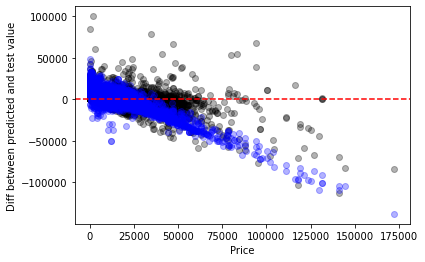

In [73]:
#plot
errors1 = y_predict_test - y_test
errors2 = y_pred_tree - y_test
plt.scatter(y_test, errors2, color='k',alpha =0.3)
plt.scatter(y_test, errors1, color='b',alpha=0.3)
plt.ylabel('Diff between predicted and test value')
plt.xlabel('Price')
#plt.xlim([xmin, xmax])
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [74]:
from sklearn.model_selection import GridSearchCV 

In [75]:
#number=np.linspace(1,50,50).astype('int')
#list(min_samples_split)

Pipeline creation - repeated $X$, $y$ data declaration and splits base on same random state split to make sure that operation on right data is secured.

In [76]:
features=num_features+cat_features
data_set=cars_mod[features]
X=data_set
y=cars_mod[target]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60222)

In [78]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer

In [79]:
numeric_transformer = Pipeline(steps=[
    ('log_transformer', PowerTransformer()),
    ('standardscaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('OHE', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', DecisionTreeRegressor())])

#print(final_pipeline.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'regressor', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__num', 'preprocessor__cat', 'preprocessor__num__memory', 'preprocessor__num__steps', 'preprocessor__num__verbose', 'preprocessor__num__log_transformer', 'preprocessor__num__standardscaler', 'preprocessor__num__log_transformer__copy', 'preprocessor__num__log_transformer__method', 'preprocessor__num__log_transformer__standardize', 'preprocessor__num__standardscaler__copy', 'preprocessor__num__standardscaler__with_mean', 'preprocessor__num__standardscaler__with_std', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__OHE', 'preprocessor__cat__OHE__categories', 'preprocessor__cat__OHE__drop', 'preprocessor__cat__OHE__dtype', 'preprocessor__cat__OHE__handle_unknown', 'preprocesso

In [80]:
params = {'regressor__max_depth': list(n_max_depth),
          'regressor__min_samples_split':list(n_min_samples_split)}
tree_gridsearch = GridSearchCV(final_pipeline, 
                                                params,
                                                scoring='neg_mean_squared_error',
                                                cv=14,
                                                verbose=5)

tree_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', tree_gridsearch.best_params_)
final_model=tree_gridsearch.best_estimator_

Fitting 14 folds for each of 833 candidates, totalling 11662 fits
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-187947568.811, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-223058287.485, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-192137870.724, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-191610943.021, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-188971345.744, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-178872550.673, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-188995098.230, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-176002965.593, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-165012689.643, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-187947534.788, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=2, score=-165336509.267, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=5, score=-262531194.120, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=5, score=-171511659.785, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=6 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=6, score=-187947568.811, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=6 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=6, score=-223058287.485, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=6 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=6, score=-192137870.724, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=6 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=6, score=-191610943.021, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=9, score=-188971345.744, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=9, score=-178872550.673, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=9, score=-188995098.230, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=9, score=-176002965.593, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=9, score=-165012689.643, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=9, score=-187947534.788, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=12, score=-193814138.403, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=12, score=-262531194.120, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=12, score=-171511659.785, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=13 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=13, score=-187947568.811, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=13 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=13, score=-223058287.485, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=13 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=13, score=-192137870.724, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=16, score=-188971345.744, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=16, score=-178872550.673, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=16, score=-188995098.230, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=16, score=-176002965.593, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=16, score=-165012689.643, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=16, score=-187947534.788, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=19, score=-165336509.267, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=19, score=-193814138.403, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=19, score=-262531194.120, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=19, score=-171511659.785, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=20 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=20, score=-187947568.811, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=20 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=20, score=-223058287.485, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=23, score=-192137870.724, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=23, score=-191610943.021, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=23, score=-188971345.744, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=23, score=-178872550.673, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=23, score=-188995098.230, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=23, score=-176002965.593, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=26, score=-187947534.788, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=26, score=-165336509.267, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=26, score=-193814138.403, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=26, score=-262531194.120, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=26, score=-171511659.785, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=27 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=27, score=-187947568.811, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=30, score=-192137870.724, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=30, score=-191610943.021, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=30, score=-188971345.744, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=30, score=-178872550.673, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=30, score=-188995098.230, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=30, score=-176002965.593, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=33, score=-165012689.643, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=33, score=-187947534.788, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=33, score=-165336509.267, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=33, score=-193814138.403, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=33, score=-262531194.120, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=33, score=-171511659.785, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=37, score=-223058287.485, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=37, score=-192137870.724, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=37, score=-191610943.021, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=37, score=-188971345.744, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=37, score=-178872550.673, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=37, score=-188995098.230, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=40, score=-165012689.643, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=40, score=-187947534.788, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=40, score=-165336509.267, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=40, score=-193814138.403, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=40, score=-262531194.120, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=40, score=-171511659.785, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=44, score=-187947568.811, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=44 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=44, score=-223058287.485, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=44 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=44, score=-192137870.724, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=44 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=44, score=-191610943.021, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=44 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=44, score=-188971345.744, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=44 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=44, score=-178872550.673, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=4.0, regressor__min_samples_split=47, score=-176002965.593, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=47, score=-165012689.643, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=47, score=-187947534.788, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=47, score=-165336509.267, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=47, score=-193814138.403, total=   0.2s
[CV] regressor__max_depth=4.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=4.0, regressor__min_samples_split=47, score=-262531194.120, total=   0.2s
[CV] regressor__max_depth=4.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=2, score=-169950868.905, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=2, score=-192697237.476, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=2, score=-166554510.812, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=2, score=-169985540.353, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=2, score=-184036753.187, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=2, score=-157559639.555, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=5, score=-174861893.156, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=5, score=-152951180.424, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=5, score=-148418380.421, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=5, score=-180153478.193, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=5, score=-146107940.307, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=5, score=-168757694.798, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=8, score=-236492258.865, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=8 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=8, score=-160527966.043, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=9, score=-169950868.905, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=9, score=-192697237.476, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=9, score=-166554510.812, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=9, score=-169985540.353, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=12, score=-157559639.555, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=12, score=-174861893.156, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=12, score=-152951180.424, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=12, score=-148418380.421, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=12, score=-180153478.193, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=12, score=-146107940.307, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=15, score=-168757694.798, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=15 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=15, score=-236492258.865, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=15 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=15, score=-160527966.043, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=16, score=-169950868.905, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=16, score=-192697237.476, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=16, score=-166554510.812, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=19, score=-169985540.353, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=19, score=-184036753.187, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=19, score=-157559639.555, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=19, score=-174861893.156, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=19, score=-152951180.424, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=19, score=-148418380.421, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=22, score=-146107940.307, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=22 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=22, score=-168757694.798, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=22 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=22, score=-236492258.865, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=22 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=22, score=-160527966.043, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=23, score=-169950868.905, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=23, score=-192669026.520, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=26, score=-167342530.710, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=26, score=-166358209.866, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=26, score=-184899275.691, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=26, score=-156849205.417, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=26, score=-171367101.655, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=26, score=-152940399.617, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=29, score=-180153478.193, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=29, score=-146089583.357, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=29, score=-168761158.985, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=29, score=-236541003.343, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=29, score=-160874495.567, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=30, score=-169950868.905, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=33, score=-167342530.710, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=33, score=-166358209.866, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=33, score=-184899275.691, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=33, score=-156849205.417, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=33, score=-171367101.655, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=33, score=-155729626.832, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=36, score=-183437961.809, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=36, score=-145789618.853, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=36, score=-168761158.985, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=36, score=-236541003.343, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=36, score=-160874495.567, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=37, score=-172252895.275, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=40, score=-192669026.520, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=40, score=-167342530.710, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=40, score=-166358209.866, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=40, score=-184899275.691, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=40, score=-156849205.417, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=40, score=-171367101.655, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=43, score=-153539387.950, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=43, score=-183437961.809, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=43, score=-145789618.853, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=43, score=-168761158.985, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=43, score=-236541003.343, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=43, score=-160874495.567, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=47, score=-172620635.201, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=47, score=-192689027.054, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=47, score=-167540935.474, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=47, score=-164764838.262, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=47, score=-184899275.691, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=47, score=-157603142.202, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=5.0, regressor__min_samples_split=50, score=-155254607.123, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=50, score=-153774628.226, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=50, score=-171855737.513, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=50, score=-145789618.853, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=50, score=-168331267.972, total=   0.2s
[CV] regressor__max_depth=5.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=5.0, regressor__min_samples_split=50, score=-236341545.170, total=   0.2s
[CV] regressor__max_depth=5.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=4, score=-136592168.160, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=5, score=-154511027.471, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=5, score=-166757311.902, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=5, score=-145659990.350, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=5, score=-159690175.932, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=5, score=-200164274.715, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=8, score=-161099444.521, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=8 ........
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=8, score=-159611210.887, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=8 ........
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=8, score=-138371736.107, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=8 ........
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=8, score=-138249964.065, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=8 ........
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=8, score=-179412295.176, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=8 ........
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=8, score=-139468824.150, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=11, score=-206432738.908, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=11 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=11, score=-136592168.160, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=12, score=-154511027.471, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=12, score=-166757311.902, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=12, score=-139162961.452, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=12, score=-152947746.166, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=15, score=-188697400.130, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=15 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=15, score=-160879688.628, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=15 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=15, score=-158820751.324, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=15 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=15, score=-138371736.107, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=15 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=15, score=-137376826.942, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=15 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=15, score=-171288219.615, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=18, score=-139468824.150, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=18 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=18, score=-153892630.381, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=18 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=18, score=-206432738.908, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=18 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=18, score=-136656572.868, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=19, score=-154318942.079, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=19, score=-166757311.902, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=22, score=-139162961.452, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=22 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=22, score=-154086829.098, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=22 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=22, score=-189259639.532, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=22 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=22, score=-160920662.987, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=22 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=22, score=-157888016.006, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=22 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=22, score=-138956808.147, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=25, score=-142463712.919, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=25 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=25, score=-171405861.233, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=25 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=25, score=-139403790.399, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=25 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=25, score=-153883185.078, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=25 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=25, score=-206557136.609, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=25 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=25, score=-137037260.236, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=29, score=-166759734.297, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=29, score=-139943049.717, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=29, score=-150448237.303, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=29, score=-190122162.036, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=29, score=-160210228.849, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=29, score=-157874768.446, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=32, score=-142463712.919, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=32 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=32, score=-178695182.874, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=32 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=32, score=-138882700.852, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=32 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=32, score=-153928288.286, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=32 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=32, score=-206557136.609, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=32 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=32, score=-137037260.236, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=36, score=-155591909.549, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=36, score=-165547424.261, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=36, score=-141394347.039, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=36, score=-150727721.309, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=36, score=-171727456.706, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=36, score=-159449856.563, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=39, score=-157067369.076, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=39 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=39, score=-141440416.714, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=39 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=39, score=-143293873.297, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=39 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=39, score=-178695182.874, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=39 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=39, score=-138715628.602, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=39 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=39, score=-154398964.003, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=42, score=-136870049.715, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=43, score=-158583321.034, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=43, score=-165743899.338, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=43, score=-141310305.536, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=43, score=-150727721.309, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=43, score=-164888107.782, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=46, score=-159173019.700, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=46 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=46, score=-153798144.654, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=46 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=46, score=-139994994.882, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=46 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=46, score=-142636829.465, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=46 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=46, score=-178793386.055, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=46 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=46, score=-138715628.602, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=6.0, regressor__min_samples_split=49, score=-206967333.968, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=49 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=49, score=-134908954.874, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=50, score=-158583321.034, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=50, score=-165625598.035, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=50, score=-141508710.301, total=   0.2s
[CV] regressor__max_depth=6.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=6.0, regressor__min_samples_split=50, score=-149134349.706, total=   0.2s
[CV] regressor__max_depth=6.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=4, score=-170824251.747, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=4 ........
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=4, score=-145252901.158, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=4 ........
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=4, score=-150012128.795, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=4 ........
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=4, score=-120319482.232, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=4 ........
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=4, score=-127253451.683, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=4 ........
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=4, score=-159044144.076, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=7, score=-136153716.646, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=7 ........
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=7, score=-134863238.928, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=7 ........
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=7, score=-188158971.606, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=7 ........
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=7, score=-127781761.158, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=8 ........
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=8, score=-138799387.023, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=8 ........
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=8, score=-153499825.933, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=11, score=-129325938.195, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=11 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=11, score=-150467764.106, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=11 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=11, score=-168700169.400, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=11 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=11, score=-145711000.045, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=11 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=11, score=-144914786.509, total=   0.3s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=11 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=11, score=-122154609.230, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=14, score=-123163647.809, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=14 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=14, score=-165040215.465, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=14 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=14, score=-136088868.650, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=14 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=14, score=-134855537.901, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=14 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=14, score=-185892912.637, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=14 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=14, score=-128011350.513, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=18, score=-138212265.006, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=18 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=18, score=-151512743.070, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=18 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=18, score=-121594274.878, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=18 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=18, score=-138276248.816, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=18 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=18, score=-175035731.700, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=18 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=18, score=-144113142.013, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=21, score=-142994480.049, total=   0.3s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=21 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=21, score=-122575792.773, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=21 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=21, score=-129385125.894, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=21 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=21, score=-155960298.615, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=21 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=21, score=-135813051.225, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=21 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=21, score=-135488771.045, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=24, score=-184977190.780, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=24 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=24, score=-127120686.633, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=25 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=25, score=-137148844.149, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=25 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=25, score=-152239937.189, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=25 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=25, score=-122247133.661, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=25 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=25, score=-132817815.387, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=28, score=-170132257.155, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=28 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=28, score=-143929405.878, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=28 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=28, score=-143260304.873, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=28 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=28, score=-122845666.103, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=28 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=28, score=-130606508.329, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=28 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=28, score=-163492964.713, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=31, score=-131224661.581, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=31 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=31, score=-135679676.747, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=31 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=31, score=-185769921.504, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=31 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=31, score=-128135474.461, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=32 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=32, score=-135914401.131, total=   0.3s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=32 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=32, score=-152239937.189, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=35, score=-124362384.529, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=35 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=35, score=-133014689.783, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=35 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=35, score=-144793001.306, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=35 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=35, score=-144988748.073, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=35 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=35, score=-144278723.713, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=35 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=35, score=-126038857.810, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=38, score=-132694370.577, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=38 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=38, score=-171246240.395, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=38 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=38, score=-130406242.534, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=38 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=38, score=-136389350.401, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=38 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=38, score=-188564347.752, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=38 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=38, score=-127079149.114, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=42, score=-141858877.253, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=42 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=42, score=-163110660.865, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=42 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=42, score=-124682554.442, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=42 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=42, score=-135121787.873, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=42 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=42, score=-152875555.899, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=42 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=42, score=-144678086.896, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=45, score=-140633598.522, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=45 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=45, score=-124441123.476, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=45 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=45, score=-133261917.369, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=45 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=45, score=-171577316.172, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=45 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=45, score=-125216455.541, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=45 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=45, score=-133925064.144, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=7.0, regressor__min_samples_split=48, score=-183563615.046, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=48 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=48, score=-125733804.510, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=49 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=49, score=-141858877.253, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=49 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=49, score=-161343264.094, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=49 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=49, score=-129064088.836, total=   0.2s
[CV] regressor__max_depth=7.0, regressor__min_samples_split=49 .......
[CV]  regressor__max_depth=7.0, regressor__min_samples_split=49, score=-133504181.107, total=   0.2s
[CV] regressor__max_depth=7.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=3, score=-172613506.833, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=3 ........
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=3, score=-133950524.043, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=3 ........
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=3, score=-131762072.310, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=3 ........
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=3, score=-108626985.877, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=3 ........
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=3, score=-122998844.772, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=3 ........
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=3, score=-145161305.034, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=6, score=-122517476.959, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=6 ........
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=6, score=-123469374.840, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=6 ........
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=6, score=-164127207.902, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=6 ........
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=6, score=-118654940.752, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=7 ........
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=7, score=-135966994.024, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=7 ........
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=7, score=-145562798.317, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=10, score=-120893590.354, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=10 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=10, score=-137902499.903, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=10 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=10, score=-157410601.199, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=10 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=10, score=-134678235.963, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=10 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=10, score=-125685808.722, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=10 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=10, score=-109357182.279, total=   0.2s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=13, score=-116779258.299, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=13 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=13, score=-157007291.470, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=13 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=13, score=-119346123.261, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=13 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=13, score=-123620256.389, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=13 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=13, score=-165722863.297, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=13 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=13, score=-117525676.990, total=   0.3s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=17, score=-128350889.516, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=17 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=17, score=-144045142.453, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=17 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=17, score=-113235124.152, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=17 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=17, score=-123233870.000, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=17 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=17, score=-150817183.290, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=17 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=17, score=-132955177.066, total=   0.3s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=20, score=-126490276.323, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=20 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=20, score=-109020945.104, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=20 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=20, score=-116092493.598, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=20 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=20, score=-148719465.845, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=20 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=20, score=-119863078.553, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=20 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=20, score=-128883305.291, total=   0.3s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=23, score=-163846966.300, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=23, score=-116987871.179, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=24 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=24, score=-126752086.255, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=24 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=24, score=-144809701.895, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=24 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=24, score=-110743793.954, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=24 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=24, score=-117560302.479, total=   0.2s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=27, score=-151365712.504, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=27 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=27, score=-139476101.686, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=27 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=27, score=-122891777.408, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=27 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=27, score=-111452761.584, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=27 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=27, score=-123301250.784, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=27 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=27, score=-148928180.828, total=   0.2s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=30, score=-123225529.236, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=30, score=-128988440.101, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=30, score=-165104086.147, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=30, score=-117246278.508, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=31 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=31, score=-124859220.288, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=31 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=31, score=-144845528.632, total=   0.2s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=34, score=-113379370.655, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=34 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=34, score=-117762587.163, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=34 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=34, score=-127916002.437, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=34 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=34, score=-141551979.366, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=34 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=34, score=-124247854.358, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=34 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=34, score=-113191140.239, total=   0.2s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=37, score=-125111433.251, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=37, score=-164571363.681, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=37, score=-122073931.018, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=37, score=-130542243.459, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=37, score=-168363798.608, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=37 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=37, score=-114970354.397, total=   0.2s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=41, score=-130751946.828, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=41 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=41, score=-156853059.282, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=41 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=41, score=-115625597.844, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=41 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=41, score=-119806300.438, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=41 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=41, score=-135370571.965, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=41 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=41, score=-141830080.377, total=   0.3s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=44, score=-122854078.835, total=   0.3s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=44 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=44, score=-111628481.405, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=44 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=44, score=-125584249.636, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=44 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=44, score=-166830066.265, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=44 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=44, score=-116881952.312, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=44 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=44, score=-131459652.585, total=   0.2s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=8.0, regressor__min_samples_split=47, score=-162945331.709, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=47, score=-115316595.849, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=48 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=48, score=-131131896.268, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=48 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=48, score=-153400213.532, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=48 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=48, score=-116135802.605, total=   0.2s
[CV] regressor__max_depth=8.0, regressor__min_samples_split=48 .......
[CV]  regressor__max_depth=8.0, regressor__min_samples_split=48, score=-120390581.172, total=   0.2s
[CV] regressor__max_depth=8.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=2, score=-168045668.629, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=2, score=-133332378.210, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=2, score=-118728345.586, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=2, score=-107229777.485, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=2, score=-114396209.441, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=2 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=2, score=-154181951.457, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=5, score=-117873054.578, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=5, score=-114716061.991, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=5, score=-147556416.670, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=5 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=5, score=-114850543.944, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=6 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=6, score=-130640959.872, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=6 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=6, score=-133092064.357, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=9, score=-117437365.871, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=9, score=-124834828.118, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=9, score=-149227566.359, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=9, score=-127772588.007, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=9, score=-114689263.990, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=9 ........
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=9, score=-108935815.346, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=12, score=-105188889.298, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=12, score=-147929300.523, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=12, score=-115706647.680, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=12, score=-113810295.760, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=12, score=-147977387.413, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=12 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=12, score=-111916069.149, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=16, score=-119407441.075, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=16, score=-134514538.238, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=16, score=-109428127.118, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=16, score=-118301470.610, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=16, score=-150008308.928, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=16 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=16, score=-125759171.600, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=19, score=-116685885.356, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=19, score=-112049580.619, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=19, score=-103667338.594, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=19, score=-147891228.168, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=19, score=-115083073.490, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=19 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=19, score=-121620360.270, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=22, score=-147843338.667, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=22 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=22, score=-108141126.163, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=23, score=-118553122.011, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=23, score=-135227046.150, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=23, score=-105455333.232, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=23 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=23, score=-106344609.999, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=26, score=-150385860.186, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=26, score=-127278835.230, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=26, score=-110286342.133, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=26, score=-107814242.928, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=26, score=-113318852.042, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=26 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=26, score=-139841368.868, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=29, score=-116197882.465, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=29, score=-121020770.936, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=29, score=-149473873.218, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=29 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=29, score=-110094100.787, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=30, score=-120494765.263, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=30 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=30, score=-134616656.602, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=33, score=-106187351.530, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=33, score=-104927120.252, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=33, score=-132963135.233, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=33, score=-128761509.381, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=33, score=-111937263.453, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=33 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=33, score=-110547974.294, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=36, score=-116349093.785, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=36, score=-154404043.140, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=36, score=-115693326.198, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=36, score=-122964038.172, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=36, score=-152525845.819, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=36 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=36, score=-108047334.396, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=40, score=-122854996.769, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=40, score=-149599852.559, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=40, score=-107428804.320, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=40, score=-108395976.416, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=40, score=-126083503.302, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=40 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=40, score=-129527489.588, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=43, score=-110636916.666, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=43, score=-111742939.790, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=43, score=-119637509.400, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=43, score=-146613866.351, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=43, score=-110952692.241, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=43 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=43, score=-120927908.871, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=46, score=-147538107.785, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=46 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=46, score=-107004834.856, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=47, score=-123492762.254, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=47, score=-148781217.144, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=47, score=-108988111.584, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=47 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=47, score=-110108982.608, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=9.0, regressor__min_samples_split=50, score=-128165818.640, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=50, score=-128730698.971, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=50, score=-110540582.243, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=50, score=-113021109.399, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=50, score=-118984496.329, total=   0.3s
[CV] regressor__max_depth=9.0, regressor__min_samples_split=50 .......
[CV]  regressor__max_depth=9.0, regressor__min_samples_split=50, score=-145223009.116, total=   0.3s
[CV] regressor__max_depth=9.0, regresso

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=4, score=-118572607.246, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=4, score=-122975228.360, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=4, score=-134976498.766, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=4, score=-106480033.860, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=5, score=-130751186.015, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=5, score=-125348926.962, total=   0.3s
[CV] regressor__max_depth=10.0, regress

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=8, score=-108369106.990, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=8, score=-120632453.036, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=8, score=-158466873.863, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=8, score=-124470584.662, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=8, score=-120185903.895, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=8, score=-107772086.234, total=   0.3s
[CV] regressor__max_depth=10.0, regress

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=11, score=-99609398.542, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=11, score=-135037699.369, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=11, score=-111998989.855, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=11, score=-105389877.652, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=11, score=-142984896.180, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=11, score=-105398697.414, total=   0.3s
[CV] regressor__max_depth=10.0, re

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=15, score=-116858754.056, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=15, score=-128204690.324, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=15, score=-100555295.139, total=   0.4s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=15, score=-112518792.502, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=15, score=-158203867.725, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=15, score=-123781078.945, total=   0.3s
[CV] regressor__max_depth=10.0, r

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=18, score=-110221426.054, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=18, score=-106040573.090, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=18, score=-95818740.789, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=18, score=-145084948.605, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=18, score=-110991307.046, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=18, score=-113426260.411, total=   0.3s
[CV] regressor__max_depth=10.0, re

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=21, score=-141986593.922, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=21, score=-103330843.719, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=22, score=-118692107.491, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=22, score=-126202958.309, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=22, score=-98862799.409, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=22, score=-102859327.805, total=   0.3s
[CV] regressor__max_depth=10.0, re

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=25, score=-140378387.964, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=25, score=-123523158.796, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=25, score=-105797656.441, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=25, score=-107083377.354, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=25, score=-106599878.416, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=25, score=-143560405.785, total=   0.3s
[CV] regressor__max_depth=10.0, r

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=28, score=-113635279.457, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=28, score=-113716248.743, total=   0.4s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=28, score=-143254093.228, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=28, score=-105585332.392, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=29, score=-116573590.083, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=29, score=-126341363.622, total=   0.3s
[CV] regressor__max_depth=10.0, r

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=32, score=-99988078.533, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=32, score=-99968815.285, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=32, score=-128722840.598, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=32, score=-124814568.556, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=32, score=-106209231.220, total=   0.4s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=32, score=-107863136.267, total=   0.3s
[CV] regressor__max_depth=10.0, reg

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=35, score=-109093704.150, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=35, score=-152279937.907, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=35, score=-112887298.604, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=35, score=-115578058.825, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=35, score=-147694186.502, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=35, score=-101975261.890, total=   0.3s
[CV] regressor__max_depth=10.0, r

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=39, score=-116235391.306, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=39, score=-140654871.242, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=39, score=-102474611.126, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=39, score=-104885068.577, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=39, score=-121634768.118, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=39, score=-125223428.182, total=   0.3s
[CV] regressor__max_depth=10.0, r

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=42, score=-105317497.549, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=42, score=-108589934.730, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=42, score=-113584281.126, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=42, score=-142397858.298, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=42, score=-112434667.790, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=42, score=-114204781.025, total=   0.3s
[CV] regressor__max_depth=10.0, r

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=45, score=-141624359.294, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=45, score=-102550789.968, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=46, score=-119079205.094, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=46, score=-139664094.849, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=46, score=-107203201.359, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=46, score=-106047102.957, total=   0.3s
[CV] regressor__max_depth=10.0, r

[CV]  regressor__max_depth=10.0, regressor__min_samples_split=49, score=-116385930.969, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=49, score=-125042046.778, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=49, score=-105199803.153, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=49, score=-109919262.844, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=49, score=-112092901.570, total=   0.3s
[CV] regressor__max_depth=10.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=10.0, regressor__min_samples_split=49, score=-142006376.891, total=   0.3s
[CV] regressor__max_depth=10.0, r

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=3, score=-120055982.731, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=3, score=-118087638.337, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=3, score=-129800700.424, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=3, score=-106293088.805, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=4, score=-123349178.040, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=4, score=-128296393.500, total=   0.4s
[CV] regressor__max_depth=11.0, regress

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=7, score=-105428223.642, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=7, score=-117057338.652, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=7, score=-148811706.211, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=7, score=-116590906.673, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=7, score=-121428764.695, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=7, score=-98809906.775, total=   0.4s
[CV] regressor__max_depth=11.0, regresso

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=10, score=-93137687.185, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=10, score=-139951676.647, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=10, score=-110271348.168, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=10, score=-97481893.794, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=10, score=-137075464.914, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=10, score=-104268145.001, total=   0.4s
[CV] regressor__max_depth=11.0, reg

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=14, score=-109995405.629, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=14, score=-130242203.601, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=14, score=-101766021.221, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=14, score=-109876259.235, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=14, score=-147919150.606, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=14, score=-128592103.707, total=   0.4s
[CV] regressor__max_depth=11.0, r

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=17, score=-105532155.025, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=17, score=-103101359.987, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=17, score=-93692039.466, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=17, score=-138474300.500, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=17, score=-109317695.602, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=17, score=-106949704.396, total=   0.4s
[CV] regressor__max_depth=11.0, re

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=20, score=-137794765.180, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=20, score=-103691711.407, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=21, score=-110860790.586, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=21, score=-122527991.586, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=21, score=-95791180.009, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=21, score=-100207113.868, total=   0.4s
[CV] regressor__max_depth=11.0, re

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=24, score=-138449862.288, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=24, score=-110695633.169, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=24, score=-101025302.754, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=24, score=-104553499.898, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=24, score=-103500448.671, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=24, score=-131261921.981, total=   0.4s
[CV] regressor__max_depth=11.0, r

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=27, score=-112782499.505, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=27, score=-107720032.701, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=27, score=-139768363.671, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=27, score=-105418414.458, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=28, score=-109543990.436, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=28, score=-126860197.499, total=   0.4s
[CV] regressor__max_depth=11.0, r

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=31, score=-96199880.387, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=31, score=-96834419.400, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=31, score=-140272727.899, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=31, score=-118214125.166, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=31, score=-101537851.735, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=31, score=-112191638.866, total=   0.4s
[CV] regressor__max_depth=11.0, reg

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=34, score=-105604317.960, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=34, score=-149883132.257, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=34, score=-111932328.322, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=34, score=-109647427.902, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=34, score=-140895408.155, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=34, score=-102402066.211, total=   0.4s
[CV] regressor__max_depth=11.0, r

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=38, score=-107888629.409, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=38, score=-137656388.056, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=38, score=-100865013.744, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=38, score=-100780182.664, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=38, score=-113934938.169, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=38, score=-117236544.162, total=   0.4s
[CV] regressor__max_depth=11.0, r

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=41, score=-99618846.989, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=41, score=-106565117.713, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=41, score=-110629753.688, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=41, score=-148483043.587, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=41, score=-109440109.258, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=41, score=-110326191.924, total=   0.3s
[CV] regressor__max_depth=11.0, re

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=44, score=-137737230.966, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=44, score=-101927324.679, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=45, score=-116049746.211, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=45, score=-137633544.972, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=45, score=-103403618.735, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=45, score=-103866739.519, total=   0.3s
[CV] regressor__max_depth=11.0, r

[CV]  regressor__max_depth=11.0, regressor__min_samples_split=48, score=-124418232.792, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=48, score=-117219220.253, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=48, score=-97375198.196, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=48, score=-108134411.057, total=   0.4s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=48, score=-108654433.761, total=   0.3s
[CV] regressor__max_depth=11.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=11.0, regressor__min_samples_split=48, score=-139432337.190, total=   0.3s
[CV] regressor__max_depth=11.0, re

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=2, score=-127270085.489, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=2, score=-123061385.005, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=2, score=-125759438.963, total=   0.5s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=2, score=-110284656.397, total=   0.5s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=3, score=-121872959.632, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=3, score=-130097431.204, total=   0.4s
[CV] regressor__max_depth=12.0, regress

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=6, score=-99518141.452, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=6, score=-115490336.719, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=6, score=-148609711.948, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=6, score=-120721551.616, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=6, score=-120138692.856, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=6, score=-99405745.379, total=   0.4s
[CV] regressor__max_depth=12.0, regressor

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=9, score=-92453948.761, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=9, score=-135519339.492, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=9, score=-110501884.158, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=9, score=-99513940.761, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=9, score=-132590091.433, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=9, score=-106664326.217, total=   0.4s
[CV] regressor__max_depth=12.0, regressor

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=13, score=-99620076.234, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=13, score=-125068947.058, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=13, score=-96937138.276, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=13, score=-103232891.076, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=13, score=-155441619.490, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=13, score=-125209026.354, total=   0.4s
[CV] regressor__max_depth=12.0, reg

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=16, score=-112365256.222, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=16, score=-105080524.736, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=16, score=-92309566.675, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=16, score=-133040199.810, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=16, score=-105351335.835, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=16, score=-107641234.896, total=   0.4s
[CV] regressor__max_depth=12.0, re

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=19, score=-134771906.401, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=19, score=-104765782.487, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=20, score=-104193998.165, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=20, score=-127556168.302, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=20, score=-93331728.626, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=20, score=-96746890.262, total=   0.4s
[CV] regressor__max_depth=12.0, reg

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=23, score=-136966422.525, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=23, score=-109943351.537, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=23, score=-98296260.120, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=23, score=-97625907.601, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=23, score=-102901318.707, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=23, score=-137282237.853, total=   0.4s
[CV] regressor__max_depth=12.0, reg

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=26, score=-108587494.532, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=26, score=-106655794.002, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=26, score=-136267141.326, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=26, score=-103712065.891, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=27, score=-103735151.222, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=27, score=-118708324.665, total=   0.4s
[CV] regressor__max_depth=12.0, r

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=30, score=-97068950.862, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=30, score=-92835276.104, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=30, score=-138650188.745, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=30, score=-112505751.418, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=30, score=-100446715.831, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=30, score=-108955055.381, total=   0.5s
[CV] regressor__max_depth=12.0, reg

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=33, score=-104430096.532, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=33, score=-138126306.036, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=33, score=-110881824.039, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=33, score=-111396945.483, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=33, score=-136705008.270, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=33, score=-102322163.658, total=   0.4s
[CV] regressor__max_depth=12.0, r

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=37, score=-104766008.619, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=37, score=-131487237.078, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=37, score=-100907550.926, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=37, score=-94581509.792, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=37, score=-120202911.828, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=37, score=-112356617.282, total=   0.4s
[CV] regressor__max_depth=12.0, re

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=40, score=-98980622.104, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=40, score=-104003474.573, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=40, score=-109653497.951, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=40, score=-147061903.427, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=40, score=-107204442.613, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=40, score=-107568412.374, total=   0.4s
[CV] regressor__max_depth=12.0, re

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=43, score=-137399574.251, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=43, score=-100954298.408, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=44, score=-112793720.356, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=44, score=-133973865.789, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=44, score=-103811216.545, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=44, score=-99576375.129, total=   0.4s
[CV] regressor__max_depth=12.0, re

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=47, score=-116540353.518, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=47, score=-114114512.001, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=47, score=-96965482.366, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=47, score=-106296828.810, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=47, score=-108039843.983, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=47, score=-141553882.112, total=   0.4s
[CV] regressor__max_depth=12.0, re

[CV]  regressor__max_depth=12.0, regressor__min_samples_split=50, score=-100948376.700, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=50, score=-106652941.727, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=50, score=-136365715.478, total=   0.4s
[CV] regressor__max_depth=12.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=12.0, regressor__min_samples_split=50, score=-104899111.714, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=2, score=-128864626.790, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=2, score=-132951965.541, total=   0.5s
[CV] regressor__max_depth=13.0, reg

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=5, score=-100100937.309, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=5, score=-111936443.359, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=5, score=-152332053.771, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=5, score=-113447023.157, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=5, score=-116839162.137, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=5, score=-102105052.113, total=   0.5s
[CV] regressor__max_depth=13.0, regress

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=8, score=-88871406.669, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=8, score=-145742158.090, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=8, score=-121337733.351, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=8, score=-97206976.595, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=8, score=-131479218.282, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=8, score=-106615088.408, total=   0.5s
[CV] regressor__max_depth=13.0, regressor

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=12, score=-105295515.480, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=12, score=-123449535.066, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=12, score=-93503950.204, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=12, score=-105333802.716, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=12, score=-154491742.879, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=12, score=-115194250.580, total=   0.5s
[CV] regressor__max_depth=13.0, re

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=15, score=-110468597.038, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=15, score=-104349164.035, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=15, score=-92222516.226, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=15, score=-126298274.701, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=15, score=-107591644.196, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=15, score=-102314069.109, total=   0.4s
[CV] regressor__max_depth=13.0, re

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=18, score=-131037939.329, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=18, score=-101255555.734, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=19, score=-107716845.849, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=19, score=-121176042.009, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=19, score=-91704721.149, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=19, score=-94440053.770, total=   0.4s
[CV] regressor__max_depth=13.0, reg

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=22, score=-136719760.684, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=22, score=-121414707.820, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=22, score=-98967364.514, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=22, score=-102599759.779, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=22, score=-102992189.820, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=22, score=-129857766.678, total=   0.4s
[CV] regressor__max_depth=13.0, re

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=25, score=-116891260.576, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=25, score=-106719526.084, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=25, score=-133914693.011, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=25, score=-100752195.776, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=26, score=-103794006.301, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=26, score=-120864303.898, total=   0.4s
[CV] regressor__max_depth=13.0, r

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=29, score=-94645236.314, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=29, score=-91261312.866, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=29, score=-130295825.030, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=29, score=-107432687.680, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=29, score=-100735724.581, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=29, score=-105598054.202, total=   0.4s
[CV] regressor__max_depth=13.0, reg

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=32, score=-104448696.844, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=32, score=-136897966.038, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=32, score=-114670213.943, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=32, score=-110383376.444, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=32, score=-134475141.650, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=32, score=-99342744.867, total=   0.4s
[CV] regressor__max_depth=13.0, re

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=36, score=-105288629.974, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=36, score=-130843733.577, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=36, score=-97411727.575, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=36, score=-93309225.586, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=36, score=-119635944.737, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=36, score=-112615107.857, total=   0.4s
[CV] regressor__max_depth=13.0, reg

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=39, score=-100527743.896, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=39, score=-104048259.881, total=   0.5s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=39, score=-109637699.625, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=39, score=-138571735.636, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=39, score=-109126661.466, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=39, score=-107572045.604, total=   0.4s
[CV] regressor__max_depth=13.0, r

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=42, score=-135348332.767, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=42, score=-102381497.381, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=43, score=-112987388.892, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=43, score=-131653223.708, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=43, score=-102682566.427, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=43, score=-98920243.859, total=   0.4s
[CV] regressor__max_depth=13.0, re

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=46, score=-122233093.643, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=46, score=-109964643.723, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=46, score=-97868277.478, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=46, score=-107230930.200, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=46, score=-109508896.968, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=46, score=-148454813.021, total=   0.4s
[CV] regressor__max_depth=13.0, re

[CV]  regressor__max_depth=13.0, regressor__min_samples_split=49, score=-102784860.936, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=49, score=-106875805.083, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=49, score=-133802054.875, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=49, score=-102504992.178, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=50, score=-112913697.893, total=   0.4s
[CV] regressor__max_depth=13.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=13.0, regressor__min_samples_split=50, score=-131039490.589, total=   0.4s
[CV] regressor__max_depth=13.0, r

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=4, score=-100441043.122, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=4, score=-108545504.575, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=4, score=-164855614.787, total=   0.6s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=4, score=-110210378.578, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=4, score=-118082288.286, total=   0.6s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=4, score=-118883123.288, total=   0.5s
[CV] regressor__max_depth=14.0, regress

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=7, score=-104513603.022, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=7, score=-144813487.211, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=7, score=-117720845.666, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=7, score=-96016324.470, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=7, score=-126607624.252, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=7, score=-108978845.436, total=   0.5s
[CV] regressor__max_depth=14.0, regresso

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=11, score=-105694443.241, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=11, score=-128021868.036, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=11, score=-103811554.440, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=11, score=-109833889.286, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=11, score=-155451430.159, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=11, score=-109732925.382, total=   0.5s
[CV] regressor__max_depth=14.0, r

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=14, score=-110749261.131, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=14, score=-98228836.427, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=14, score=-88801089.929, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=14, score=-133955045.678, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=14, score=-107305471.154, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=14, score=-99566862.225, total=   0.5s
[CV] regressor__max_depth=14.0, regr

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=17, score=-130524294.247, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=17, score=-99471877.760, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=18, score=-106502644.775, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=18, score=-125887528.326, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=18, score=-91878732.647, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=18, score=-93630511.336, total=   0.5s
[CV] regressor__max_depth=14.0, regr

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=21, score=-136708904.195, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=21, score=-103521329.700, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=21, score=-101119226.039, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=21, score=-95023319.678, total=   0.6s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=21, score=-98382373.718, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=21, score=-139397209.038, total=   0.5s
[CV] regressor__max_depth=14.0, reg

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=24, score=-115648779.582, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=24, score=-105550054.891, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=24, score=-130854042.035, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=24, score=-100520394.692, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=25, score=-102223857.247, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=25, score=-116120605.086, total=   0.5s
[CV] regressor__max_depth=14.0, r

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=28, score=-94738527.860, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=28, score=-90795446.757, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=28, score=-135764533.538, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=28, score=-108623611.687, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=28, score=-98141193.607, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=28, score=-104469242.861, total=   0.5s
[CV] regressor__max_depth=14.0, regr

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=31, score=-102844259.269, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=31, score=-138294051.228, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=31, score=-109922738.818, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=31, score=-105408949.013, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=31, score=-132475292.004, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=31, score=-101281457.796, total=   0.5s
[CV] regressor__max_depth=14.0, r

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=35, score=-106497625.343, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=35, score=-128746541.337, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=35, score=-99325139.464, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=35, score=-92419972.518, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=35, score=-118463879.945, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=35, score=-107683121.385, total=   0.5s
[CV] regressor__max_depth=14.0, reg

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=38, score=-100074682.048, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=38, score=-102349864.131, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=38, score=-107181305.826, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=38, score=-137238793.269, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=38, score=-110266002.881, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=38, score=-108798615.108, total=   0.4s
[CV] regressor__max_depth=14.0, r

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=41, score=-133195158.796, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=41, score=-103913191.074, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=42, score=-112694559.385, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=42, score=-132317667.937, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=42, score=-102120407.756, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=42, score=-97056332.866, total=   0.5s
[CV] regressor__max_depth=14.0, re

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=45, score=-114639952.885, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=45, score=-113196570.754, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=45, score=-96836676.183, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=45, score=-102853332.672, total=   0.5s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=45, score=-107641394.814, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=45, score=-147394414.791, total=   0.4s
[CV] regressor__max_depth=14.0, re

[CV]  regressor__max_depth=14.0, regressor__min_samples_split=48, score=-101594265.864, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=48, score=-105145512.405, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=48, score=-131205210.625, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=48, score=-101711985.337, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=49, score=-112443342.019, total=   0.4s
[CV] regressor__max_depth=14.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=14.0, regressor__min_samples_split=49, score=-130208455.878, total=   0.4s
[CV] regressor__max_depth=14.0, r

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=3, score=-100702873.079, total=   0.6s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=3, score=-108246355.618, total=   0.6s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=3, score=-140766365.048, total=   0.6s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=3, score=-125987677.697, total=   0.6s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=3, score=-129446934.595, total=   0.6s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=3, score=-122318933.459, total=   0.6s
[CV] regressor__max_depth=15.0, regress

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=6, score=-95880089.358, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=6, score=-139141590.923, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=6, score=-112809292.623, total=   0.6s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=6, score=-97243133.292, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=6, score=-129061422.772, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=6, score=-110448840.864, total=   0.5s
[CV] regressor__max_depth=15.0, regressor

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=10, score=-105056644.040, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=10, score=-131161188.699, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=10, score=-104674736.900, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=10, score=-108126531.850, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=10, score=-155399541.172, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=10, score=-122333719.102, total=   0.5s
[CV] regressor__max_depth=15.0, r

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=13, score=-107657652.808, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=13, score=-97450543.824, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=13, score=-87983197.247, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=13, score=-135805309.878, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=13, score=-108778157.477, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=13, score=-92803144.487, total=   0.5s
[CV] regressor__max_depth=15.0, regr

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=16, score=-131279390.881, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=16, score=-99680348.735, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=17, score=-100486776.713, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=17, score=-128379678.017, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=17, score=-92104010.154, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=17, score=-93538977.278, total=   0.5s
[CV] regressor__max_depth=15.0, regr

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=20, score=-135777239.697, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=20, score=-111456344.966, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=20, score=-104195306.756, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=20, score=-98594153.573, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=20, score=-91476933.934, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=20, score=-140173360.610, total=   0.5s
[CV] regressor__max_depth=15.0, reg

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=23, score=-115644002.127, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=23, score=-104044179.401, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=23, score=-132233489.566, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=23, score=-100052429.804, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=24, score=-107060093.738, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=24, score=-121297992.244, total=   0.5s
[CV] regressor__max_depth=15.0, r

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=27, score=-90664485.838, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=27, score=-89024116.379, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=27, score=-127792597.519, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=27, score=-106894075.396, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=27, score=-98618316.106, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=27, score=-103381559.698, total=   0.5s
[CV] regressor__max_depth=15.0, regr

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=30, score=-101855838.353, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=30, score=-132494994.327, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=30, score=-111281267.982, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=30, score=-106318597.438, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=30, score=-132141397.682, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=30, score=-102748167.517, total=   0.5s
[CV] regressor__max_depth=15.0, r

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=34, score=-106507196.731, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=34, score=-131509661.832, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=34, score=-95164027.365, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=34, score=-90617128.483, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=34, score=-117940513.550, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=34, score=-112623645.169, total=   0.5s
[CV] regressor__max_depth=15.0, reg

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=37, score=-99449211.309, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=37, score=-102219178.161, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=37, score=-107605150.373, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=37, score=-136370090.320, total=   0.4s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=37, score=-109835952.313, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=37, score=-107670622.405, total=   0.5s
[CV] regressor__max_depth=15.0, re

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=40, score=-132515171.304, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=40, score=-102462089.447, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=41, score=-111587024.126, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=41, score=-137530773.358, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=41, score=-99104369.089, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=41, score=-95953294.866, total=   0.5s
[CV] regressor__max_depth=15.0, reg

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=44, score=-121144233.650, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=44, score=-113403294.249, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=44, score=-99318278.363, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=44, score=-101692298.030, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=44, score=-107229520.634, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=44, score=-140084141.513, total=   0.5s
[CV] regressor__max_depth=15.0, re

[CV]  regressor__max_depth=15.0, regressor__min_samples_split=47, score=-101528700.758, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=47, score=-104664585.025, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=47, score=-131229928.282, total=   0.4s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=47, score=-102810995.758, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=48, score=-111861729.300, total=   0.5s
[CV] regressor__max_depth=15.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=15.0, regressor__min_samples_split=48, score=-130774047.321, total=   0.5s
[CV] regressor__max_depth=15.0, r

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=2, score=-106236529.862, total=   0.7s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=2, score=-113709949.452, total=   0.7s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=2, score=-137080175.370, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=2, score=-115371795.296, total=   0.7s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=2, score=-125076992.049, total=   0.7s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=2, score=-123829435.790, total=   0.7s
[CV] regressor__max_depth=16.0, regress

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=5, score=-86174271.296, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=5, score=-141678550.215, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=5, score=-119863651.632, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=5, score=-97314826.387, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=5, score=-128984411.872, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=5, score=-111886422.249, total=   0.6s
[CV] regressor__max_depth=16.0, regressor

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=9, score=-102749753.575, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=9, score=-129019112.739, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=9, score=-101255623.686, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=9, score=-108871578.549, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=9, score=-144902917.645, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=9, score=-113142978.885, total=   0.6s
[CV] regressor__max_depth=16.0, regress

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=12, score=-109416640.223, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=12, score=-102243496.209, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=12, score=-88215253.724, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=12, score=-132468007.266, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=12, score=-109904007.566, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=12, score=-92478565.517, total=   0.6s
[CV] regressor__max_depth=16.0, reg

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=15, score=-135735105.094, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=15, score=-99823949.346, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=16, score=-105033665.026, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=16, score=-128647131.492, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=16, score=-92340328.196, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=16, score=-102479854.568, total=   0.5s
[CV] regressor__max_depth=16.0, reg

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=19, score=-135812644.892, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=19, score=-106345749.382, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=19, score=-102610009.720, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=19, score=-99869398.590, total=   0.6s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=19, score=-89823110.558, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=19, score=-128185342.933, total=   0.5s
[CV] regressor__max_depth=16.0, reg

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=22, score=-112282962.594, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=22, score=-103712181.522, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=22, score=-132840112.793, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=22, score=-99931766.964, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=23, score=-98716111.741, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=23, score=-124275423.086, total=   0.5s
[CV] regressor__max_depth=16.0, reg

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=26, score=-89672365.855, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=26, score=-89242324.457, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=26, score=-128175195.420, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=26, score=-110860304.388, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=26, score=-98113301.445, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=26, score=-104043444.886, total=   0.5s
[CV] regressor__max_depth=16.0, regr

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=29, score=-102527985.703, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=29, score=-131919170.610, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=29, score=-110982106.960, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=29, score=-104510461.987, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=29, score=-132206257.533, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=29, score=-100855008.307, total=   0.5s
[CV] regressor__max_depth=16.0, r

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=33, score=-95457538.353, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=33, score=-127818059.524, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=33, score=-91450007.265, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=33, score=-91401534.416, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=33, score=-111078301.855, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=33, score=-112663963.753, total=   0.5s
[CV] regressor__max_depth=16.0, regr

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=36, score=-99007572.414, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=36, score=-98795846.453, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=36, score=-103525291.872, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=36, score=-135388018.650, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=36, score=-108733799.733, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=36, score=-106611682.503, total=   0.5s
[CV] regressor__max_depth=16.0, reg

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=39, score=-134397760.802, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=39, score=-99277989.689, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=40, score=-107412374.064, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=40, score=-131684042.559, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=40, score=-97539317.785, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=40, score=-96955446.376, total=   0.5s
[CV] regressor__max_depth=16.0, regr

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=43, score=-113678166.620, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=43, score=-109705840.465, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=43, score=-97583531.166, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=43, score=-101125120.650, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=43, score=-107040841.268, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=43, score=-138154921.586, total=   0.5s
[CV] regressor__max_depth=16.0, re

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=46, score=-102596816.792, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=46, score=-104195961.538, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=46, score=-131676144.841, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=46, score=-99740775.245, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=47, score=-111177730.684, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=47, score=-132201789.351, total=   0.5s
[CV] regressor__max_depth=16.0, re

[CV]  regressor__max_depth=16.0, regressor__min_samples_split=50, score=-102059655.388, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=50, score=-99525571.539, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=50, score=-115247942.423, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=50, score=-113826406.142, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=50, score=-98031904.168, total=   0.5s
[CV] regressor__max_depth=16.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=16.0, regressor__min_samples_split=50, score=-104002609.172, total=   0.5s
[CV] regressor__max_depth=16.0, reg

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=4, score=-94649892.127, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=4, score=-137685132.103, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=4, score=-114948217.110, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=4, score=-112645657.754, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=4, score=-127963494.382, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=4 .......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=4, score=-106225561.403, total=   0.6s
[CV] regressor__max_depth=17.0, regresso

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=8, score=-112600970.741, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=8, score=-135527310.623, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=8, score=-98713000.329, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=8, score=-107462804.136, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=8, score=-154921841.628, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=8, score=-124845475.438, total=   0.6s
[CV] regressor__max_depth=17.0, regresso

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=11, score=-107364908.207, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=11, score=-104236863.585, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=11, score=-90427954.496, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=11, score=-126847667.432, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=11, score=-108296101.465, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=11, score=-89279066.313, total=   0.6s
[CV] regressor__max_depth=17.0, reg

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=14, score=-134839754.341, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=14, score=-101068844.763, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=15, score=-99817091.439, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=15, score=-125822845.522, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=15, score=-95057132.636, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=15, score=-100209901.902, total=   0.6s
[CV] regressor__max_depth=17.0, reg

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=18, score=-133636813.231, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=18, score=-122115651.156, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=18, score=-99613602.081, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=18, score=-93773431.028, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=18, score=-92941152.917, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=18, score=-138577089.476, total=   0.6s
[CV] regressor__max_depth=17.0, regr

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=21, score=-108109791.700, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=21, score=-105096250.495, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=21, score=-132343682.361, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=21, score=-99954235.379, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=22, score=-100077532.993, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=22, score=-124926104.892, total=   0.6s
[CV] regressor__max_depth=17.0, re

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=25, score=-89107627.784, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=25, score=-87419493.012, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=25, score=-129574119.395, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=25, score=-113069164.343, total=   0.6s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=25, score=-96712813.655, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=25, score=-96562129.429, total=   0.6s
[CV] regressor__max_depth=17.0, regre

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=28, score=-103631001.564, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=28, score=-131077637.882, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=28, score=-113009523.540, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=28, score=-100723469.739, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=28, score=-130747025.788, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=28 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=28, score=-101405883.295, total=   0.5s
[CV] regressor__max_depth=17.0, r

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=32, score=-97827014.436, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=32, score=-115255580.456, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=32, score=-90474242.205, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=32, score=-88981407.577, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=32, score=-110704967.393, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=32, score=-110144145.396, total=   0.5s
[CV] regressor__max_depth=17.0, regr

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=35, score=-98501546.682, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=35, score=-100737538.308, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=35, score=-103745210.144, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=35, score=-136054213.025, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=35, score=-110532713.224, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=35, score=-106737496.193, total=   0.5s
[CV] regressor__max_depth=17.0, re

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=38, score=-135349960.509, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=38, score=-99292336.064, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=39, score=-104888710.954, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=39, score=-132209672.574, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=39, score=-96560676.464, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=39, score=-95255063.256, total=   0.5s
[CV] regressor__max_depth=17.0, regr

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=42, score=-119454860.647, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=42, score=-109683826.369, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=42, score=-97594579.385, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=42, score=-100980044.892, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=42, score=-107527603.110, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=42, score=-136568528.871, total=   0.5s
[CV] regressor__max_depth=17.0, re

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=45, score=-104450886.136, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=45, score=-102859563.531, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=45, score=-130646586.565, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=45, score=-99129162.529, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=46, score=-111202572.992, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=46, score=-131957929.617, total=   0.5s
[CV] regressor__max_depth=17.0, re

[CV]  regressor__max_depth=17.0, regressor__min_samples_split=49, score=-104506002.216, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=49, score=-97269944.138, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=49, score=-113924531.276, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=49, score=-115319407.816, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=49, score=-97764060.315, total=   0.5s
[CV] regressor__max_depth=17.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=17.0, regressor__min_samples_split=49, score=-103018417.896, total=   0.5s
[CV] regressor__max_depth=17.0, reg

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=3, score=-115540537.159, total=   0.7s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=3, score=-138835757.707, total=   0.7s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=3, score=-123068865.960, total=   0.7s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=3, score=-117654654.325, total=   0.7s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=3, score=-125081752.281, total=   0.7s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=3 .......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=3, score=-108893098.691, total=   0.7s
[CV] regressor__max_depth=18.0, regress

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=7, score=-110247483.261, total=   0.7s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=7, score=-132071998.954, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=7, score=-100462823.249, total=   0.7s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=7, score=-108984121.352, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=7, score=-150318823.612, total=   0.7s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=7 .......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=7, score=-130408166.112, total=   0.7s
[CV] regressor__max_depth=18.0, regress

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=10, score=-106504116.145, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=10, score=-98755430.290, total=   0.7s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=10, score=-96472326.791, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=10, score=-144669874.534, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=10, score=-112072399.546, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=10 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=10, score=-89299819.997, total=   0.6s
[CV] regressor__max_depth=18.0, regr

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=13, score=-135014782.600, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=13, score=-100724790.065, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=14, score=-99260171.379, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=14, score=-131877930.529, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=14, score=-96613822.997, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=14 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=14, score=-99454687.665, total=   0.6s
[CV] regressor__max_depth=18.0, regr

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=17, score=-134208865.735, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=17, score=-114502485.490, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=17, score=-101177354.485, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=17, score=-99121672.581, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=17, score=-93407033.764, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=17 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=17, score=-133602092.725, total=   0.6s
[CV] regressor__max_depth=18.0, reg

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=20, score=-109271175.800, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=20, score=-101709499.114, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=20, score=-130695826.508, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=20, score=-100690935.100, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=21, score=-102731523.830, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=21 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=21, score=-124422301.888, total=   0.6s
[CV] regressor__max_depth=18.0, r

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=24, score=-88611018.407, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=24, score=-87748558.374, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=24, score=-131951161.431, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=24, score=-106738375.225, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=24, score=-95738031.310, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=24 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=24, score=-101240794.853, total=   0.6s
[CV] regressor__max_depth=18.0, regr

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=27, score=-102953344.553, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=27, score=-139341642.903, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=27, score=-109536963.654, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=27, score=-100868064.547, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=27, score=-130538775.822, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=27 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=27, score=-97943448.211, total=   0.6s
[CV] regressor__max_depth=18.0, re

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=31, score=-95040813.770, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=31, score=-120593271.893, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=31, score=-90764437.726, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=31, score=-89656783.351, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=31, score=-135725547.010, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=31 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=31, score=-115320932.593, total=   0.6s
[CV] regressor__max_depth=18.0, regr

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=34, score=-96997883.509, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=34, score=-100402323.607, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=34, score=-102856611.362, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=34, score=-134819749.434, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=34, score=-108428993.881, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=34 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=34, score=-102970955.685, total=   0.6s
[CV] regressor__max_depth=18.0, re

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=37, score=-136189962.527, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=37, score=-96027130.869, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=38, score=-100273021.693, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=38, score=-135861211.277, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=38, score=-98749390.692, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=38 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=38, score=-93460205.785, total=   0.5s
[CV] regressor__max_depth=18.0, regr

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=41, score=-111365628.984, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=41, score=-110234489.102, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=41, score=-97112391.977, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=41, score=-101518563.696, total=   0.6s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=41, score=-107672148.393, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=41 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=41, score=-135692471.053, total=   0.5s
[CV] regressor__max_depth=18.0, re

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=44, score=-100336087.278, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=44, score=-105883358.386, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=44, score=-130775533.968, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=44, score=-98286023.186, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=45, score=-110240507.501, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=45 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=45, score=-131470322.858, total=   0.5s
[CV] regressor__max_depth=18.0, re

[CV]  regressor__max_depth=18.0, regressor__min_samples_split=48, score=-96870176.563, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=48, score=-98075073.257, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=48, score=-113120548.344, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=48, score=-115438930.025, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=48, score=-94992490.270, total=   0.5s
[CV] regressor__max_depth=18.0, regressor__min_samples_split=48 ......
[CV]  regressor__max_depth=18.0, regressor__min_samples_split=48, score=-103686418.980, total=   0.5s
[CV] regressor__max_depth=18.0, regr

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=2, score=-108383769.378, total=   0.8s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=2, score=-140821907.768, total=   0.8s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=2, score=-125320010.414, total=   0.8s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=2, score=-124133842.484, total=   0.8s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=2, score=-138585503.159, total=   0.8s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=2 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=2, score=-113556321.881, total=   0.8s
[CV] regressor__max_depth=19.0, regress

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=6, score=-123086622.117, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=6, score=-139329176.610, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=6, score=-105449994.021, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=6, score=-110559947.904, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=6, score=-146467588.487, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=6 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=6, score=-120665127.209, total=   0.7s
[CV] regressor__max_depth=19.0, regress

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=9, score=-108759412.523, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=9, score=-108235310.619, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=9, score=-108042247.148, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=9, score=-145251342.129, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=9, score=-108379341.668, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=9 .......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=9, score=-95836519.417, total=   0.7s
[CV] regressor__max_depth=19.0, regresso

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=12, score=-136687268.015, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=12, score=-101948795.147, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=13, score=-103617545.765, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=13, score=-129246079.066, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=13, score=-98630387.733, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=13 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=13, score=-98300462.748, total=   0.7s
[CV] regressor__max_depth=19.0, reg

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=16, score=-147530167.000, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=16, score=-117028683.536, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=16, score=-108615471.410, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=16, score=-102436779.895, total=   0.7s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=16, score=-93614128.595, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=16 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=16, score=-133275528.060, total=   0.6s
[CV] regressor__max_depth=19.0, re

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=19, score=-109777927.937, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=19, score=-101785731.696, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=19, score=-136177755.051, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=19, score=-98370212.590, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=20, score=-100961145.483, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=20 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=20, score=-125047671.509, total=   0.6s
[CV] regressor__max_depth=19.0, re

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=23, score=-90627033.962, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=23, score=-87131670.779, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=23, score=-129631192.040, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=23, score=-124531556.501, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=23, score=-94133002.343, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=23 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=23, score=-101037147.800, total=   0.6s
[CV] regressor__max_depth=19.0, regr

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=26, score=-101704240.798, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=26, score=-135292760.595, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=26, score=-112161319.477, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=26, score=-104348426.185, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=26, score=-131346670.122, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=26 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=26, score=-99114830.683, total=   0.6s
[CV] regressor__max_depth=19.0, re

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=30, score=-98744987.538, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=30, score=-115260515.906, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=30, score=-92430285.594, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=30, score=-88455745.541, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=30, score=-135338587.259, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=30 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=30, score=-114431594.651, total=   0.6s
[CV] regressor__max_depth=19.0, regr

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=33, score=-96397551.280, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=33, score=-101895376.530, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=33, score=-102581283.560, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=33, score=-142734888.025, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=33, score=-111181068.477, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=33 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=33, score=-102946372.705, total=   0.6s
[CV] regressor__max_depth=19.0, re

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=36, score=-136264557.903, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=36, score=-96265001.856, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=37, score=-101911915.518, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=37, score=-130519865.385, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=37, score=-98800536.285, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=37 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=37, score=-91126219.294, total=   0.5s
[CV] regressor__max_depth=19.0, regr

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=40, score=-116325777.204, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=40, score=-111326873.111, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=40, score=-97064061.695, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=40, score=-100629196.797, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=40, score=-107204063.034, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=40 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=40, score=-143653666.970, total=   0.5s
[CV] regressor__max_depth=19.0, re

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=43, score=-101794081.110, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=43, score=-106436717.776, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=43, score=-133700472.537, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=43, score=-97938322.906, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=44, score=-111040714.622, total=   0.6s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=44 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=44, score=-131947025.473, total=   0.5s
[CV] regressor__max_depth=19.0, re

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=47, score=-97936484.590, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=47, score=-98202774.722, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=47, score=-120799366.940, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=47, score=-117156731.152, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=47, score=-93868597.084, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=47 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=47, score=-104247214.930, total=   0.6s
[CV] regressor__max_depth=19.0, regr

[CV]  regressor__max_depth=19.0, regressor__min_samples_split=50, score=-106367999.610, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=50, score=-126919306.805, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=50, score=-100203759.088, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=50, score=-103435070.893, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=50, score=-131234233.684, total=   0.5s
[CV] regressor__max_depth=19.0, regressor__min_samples_split=50 ......
[CV]  regressor__max_depth=19.0, regressor__min_samples_split=50, score=-101011537.102, total=   0.5s
[CV] regressor__max_depth=20.0, r

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=5, score=-126928657.509, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=5, score=-135105242.856, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=5, score=-103301468.418, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=5, score=-108640290.037, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=5, score=-155264784.758, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=5 .......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=5, score=-126807387.957, total=   0.7s
[CV] regressor__max_depth=20.0, regress

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=8, score=-114914976.184, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=8, score=-106539882.269, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=8, score=-109958663.826, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=8, score=-135698373.975, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=8, score=-112234700.742, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=8 .......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=8, score=-95361710.842, total=   0.7s
[CV] regressor__max_depth=20.0, regresso

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=11, score=-136362332.608, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=11 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=11, score=-100600801.593, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=12, score=-110608966.641, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=12, score=-130023514.890, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=12, score=-98031645.722, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=12 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=12, score=-99877335.508, total=   0.7s
[CV] regressor__max_depth=20.0, reg

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=15, score=-142147791.731, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=15, score=-124456779.001, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=15, score=-107815451.325, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=15, score=-103732761.230, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=15, score=-90403843.631, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=15 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=15, score=-132792985.817, total=   0.6s
[CV] regressor__max_depth=20.0, re

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=18, score=-109181517.872, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=18, score=-100415828.975, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=18, score=-134408543.033, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=18 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=18, score=-101599686.275, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=19, score=-110830186.112, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=19 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=19, score=-125494013.620, total=   0.6s
[CV] regressor__max_depth=20.0, r

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=22, score=-92343307.066, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=22, score=-90312080.855, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=22, score=-124545497.674, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=22, score=-104283261.896, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=22, score=-94599784.830, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=22 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=22, score=-96914891.596, total=   0.6s
[CV] regressor__max_depth=20.0, regre

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=25, score=-102198274.668, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=25, score=-127939833.653, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=25, score=-115118580.005, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=25, score=-100617710.544, total=   0.7s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=25, score=-132304414.888, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=25 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=25, score=-97573005.505, total=   0.6s
[CV] regressor__max_depth=20.0, re

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=29, score=-101635587.067, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=29, score=-120677045.751, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=29, score=-94960548.303, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=29, score=-88152015.066, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=29, score=-128010170.048, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=29 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=29, score=-108814805.224, total=   0.6s
[CV] regressor__max_depth=20.0, reg

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=32, score=-96829088.321, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=32, score=-103053505.417, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=32, score=-102395523.204, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=32, score=-135802258.927, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=32, score=-108573037.925, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=32 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=32, score=-105691218.668, total=   0.6s
[CV] regressor__max_depth=20.0, re

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=35, score=-137166837.570, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=35 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=35, score=-96192657.603, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=36, score=-101019226.461, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=36, score=-129632808.951, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=36, score=-96459014.967, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=36 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=36, score=-91914736.157, total=   0.6s
[CV] regressor__max_depth=20.0, regr

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=39, score=-110145301.471, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=39, score=-110710305.962, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=39, score=-97884509.433, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=39, score=-101578299.806, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=39, score=-106592121.853, total=   0.5s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=39 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=39, score=-144359151.663, total=   0.5s
[CV] regressor__max_depth=20.0, re

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=42, score=-103647386.498, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=42, score=-105765847.134, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=42, score=-134469614.428, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=42 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=42, score=-98304946.503, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=43, score=-110098929.768, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=43 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=43, score=-130516324.448, total=   0.5s
[CV] regressor__max_depth=20.0, re

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=46, score=-99864441.895, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=46, score=-97823497.488, total=   0.5s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=46, score=-120150735.942, total=   0.5s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=46, score=-112478574.818, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=46, score=-94307592.678, total=   0.5s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=46 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=46, score=-103493394.692, total=   0.6s
[CV] regressor__max_depth=20.0, regr

[CV]  regressor__max_depth=20.0, regressor__min_samples_split=49, score=-105766961.155, total=   0.5s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=49, score=-125783447.677, total=   0.5s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=49, score=-103142666.553, total=   0.5s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=49, score=-103501373.357, total=   0.6s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=49, score=-132035598.742, total=   0.5s
[CV] regressor__max_depth=20.0, regressor__min_samples_split=49 ......
[CV]  regressor__max_depth=20.0, regressor__min_samples_split=49, score=-101446160.572, total=   0.6s
[CV] regressor__max_depth=20.0, r

[Parallel(n_jobs=1)]: Done 11662 out of 11662 | elapsed: 77.3min finished



Best hyperparameter: {'regressor__max_depth': 20.0, 'regressor__min_samples_split': 32}


In [118]:
new_predictions = final_model.predict(X_test)
new_mse2 = mean_squared_error(y_test, new_predictions)
print(f'RMSE: {np.sqrt(new_mse2)}')

RMSE: 10135.103164781713


In [82]:
cars_mod['Price'].mean()

16986.91708791495

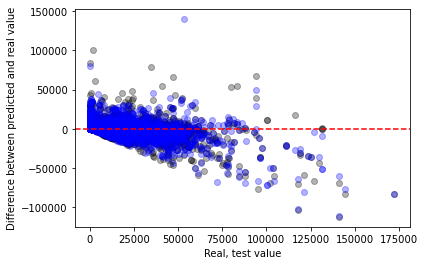

In [83]:
#plot
errors1 = y_predict_test - y_test
errors2 = y_pred_tree - y_test
errors3 = new_predictions - y_test
plt.scatter(y_test, errors2, color='k',alpha =0.3)
#plt.scatter(y_test, errors1, color='c',alpha=0.3)
plt.scatter(y_test, errors3, color='b',alpha=0.3)
plt.ylabel('Difference between predicted and real value')
plt.xlabel('Real, test value')
plt.axhline(0, color='red', linestyle='--')
plt.show()

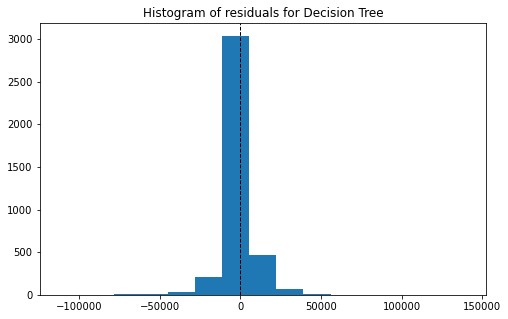

In [100]:
plt.figure(figsize=(8, 5))
plt.hist(errors3, bins=15)
plt.axvline(errors3.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Histogram of residuals for Decision Tree')

plt.show()

In [84]:
import random

In [85]:
n=10
x_ran=[]
i=0
while i<n:
    x=random.randint(0, X_test.shape[0])
    x_ran.append(x)
    i=i+1

In [94]:
x_ran

[2170, 2363, 1503, 1401, 1762, 2173, 898, 1768, 3320, 717]

In [97]:
r_pred=[]
r_test=[]
r_err=[]
for i in x_ran:
    a=X_test.iloc[i,:]
    new_pred=final_model.predict(X_test)[i]
    r_pred.append(new_pred)
    r_test.append(y_test.iloc[i])
    r_err.append(y_test.iloc[i]-new_pred)

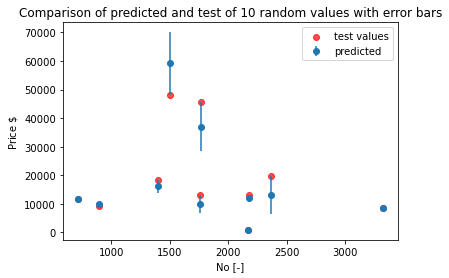

In [119]:
plt.errorbar(x_ran,r_pred, yerr=r_err,fmt='o', label='predicted')
plt.scatter(x_ran,r_test, color='red', label='test values', alpha=0.7)
plt.legend()
plt.title('Comparison of predicted and test of 10 random values with error bars')
plt.ylabel('Price $\$$')
plt.xlabel('No [-]')
plt.show()


Summary:
1. Linear regression model was used as "dummy model" and base result for future comparison. Received value


In [106]:
print(f'RMSE for LinearRegression = {np.round(err,2)}')

RMSE for LinearRegression = 15944.7


2. DecisionTreeRegressor allowed (standard scaler) with grid search of optimal received parameters allowed to decrease this value to:


In [108]:
print(f'RMSE for DecisionTreeRegressor = {np.round(err2,2)}')

RMSE for DecisionTreeRegressor = 10476.01


3. Last approach with the same model, optimal parameters, included categorical data applied as One Hot encoder and log scaler to minimize skewness and transformation of data to make them close to a Gaussian distribution allowed 
reduce RMSE to 10135.1

Team:
M.Sroka;
A.Dębiec;
R.Kucharski;
2022_02_17